In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_excel(r"C:\Users\kishk\Downloads\Data_Train.xlsx")

In [3]:
dataset

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0               Null    3897  
1                Null   7662  
2                Null  13882  
3                Null   6218  
4                Null  13302  
...               ...    ...  
10678            Null   4107  
10679            Null   4145  
10680            Null   7229  
10681            Null  12648  
10682            Null  11753  

[10683 rows x 11 columns]

In [4]:
dataset.shape

(10683, 11)

In [5]:
dataset.describe().T

count         mean          std     min     25%     50%      75%  \
Price  10683.0  9087.064121  4611.359167  1759.0  5277.0  8372.0  12373.0   

           max  
Price  79512.0

In [6]:
dataset.describe(include = 'O').T

count unique              top  freq
Airline          10683     12      Jet Airways  3849
Date_of_Journey  10683     44       18/05/2019   504
Source           10683      5            Delhi  4537
Destination      10683      6           Cochin  4537
Route            10682    128  DEL → BOM → COK  2376
Dep_Time         10683    222            18:55   233
Arrival_Time     10683   1343            19:00   423
Duration         10683    368           2h 50m   550
Total_Stops      10682      5           1 stop  5625
Additional_Info  10683     10             Null  8347

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
dataset.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
dataset.ndim

2

In [10]:
dataset.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
dataset.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
dataset[dataset.Route.isna()]

Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN            Null   7480

In [13]:
dataset.dropna(inplace = True)

In [14]:
dataset.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
dataset[dataset.duplicated()]

Airline Date_of_Journey    Source Destination  \
683    Jet Airways       1/06/2019     Delhi      Cochin   
1061     Air India      21/05/2019     Delhi      Cochin   
1348     Air India      18/05/2019     Delhi      Cochin   
1418   Jet Airways       6/06/2019     Delhi      Cochin   
1674        IndiGo      24/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10594  Jet Airways      27/06/2019     Delhi      Cochin   
10616  Jet Airways       1/06/2019     Delhi      Cochin   
10634  Jet Airways       6/06/2019     Delhi      Cochin   
10672  Jet Airways      27/06/2019     Delhi      Cochin   
10673  Jet Airways      27/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
683    DEL → NAG → BOM → COK    14:35  04:25 02 Jun  13h 50m     2 stops   
1061   DEL → GOI → BOM → COK    22:00  19:15 22 May  21h 15m     2 stops   
1348   DEL → HYD → BOM → COK    17:15  19:15 19 May      26h     2 stops   
1418   DEL → JAI → BOM → COK    05:30  04:25 07 Jun  22h 55m     2 stops   
1674               BLR → DEL    18:25         21:20   2h 55m    non-stop   
...                      ...      ...           ...      ...         ...   
10594  DEL → AMD → BOM → COK    23:05  12:35 28 Jun  13h 30m     2 stops   
10616  DEL → JAI → BOM → COK    09:40  12:35 02 Jun  26h 55m     2 stops   
10634  DEL → JAI → BOM → COK    09:40  12:35 07 Jun  26h 55m     2 stops   
10672  DEL → AMD → BOM → COK    23:05  19:00 28 Jun  19h 55m     2 stops   
10673  DEL → AMD → BOM → COK    13:25  04:25 28 May      15h     2 stops   

                   Additional_Info  Price  
683                           Null  13376  
1061                          Null  10231  
1348                          Null  12392  
1418   In-flight meal not included  10368  
1674                          Null   7303  
...                            ...    ...  
10594                         Null  12819  
10616                         Null  13014  
10634  In-flight meal not included  11733  
10672  In-flight meal not included  11150  
10673                         Null  16704  

[220 rows x 11 columns]

In [16]:
dataset.drop_duplicates(inplace = True)

In [17]:
dataset

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0               Null    3897  
1                Null   7662  
2                Null  13882  
3                Null   6218  
4                Null  13302  
...               ...    ...  
10678            Null   4107  
10679            Null   4145  
10680            Null   7229  
10681            Null  12648  
10682            Null  11753  

[10462 rows x 11 columns]

In [18]:
for col in dataset.columns:
    print("COLUMN NAME --",col)
    print()
    print( dataset[col].unique())
    print(75*'*')
    print()

COLUMN NAME -- Airline

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
***************************************************************************

COLUMN NAME -- Date_of_Journey

['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
***************************************************************************

COLUMN NAME -- Source

['Banglo

In [19]:
dataset

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0               Null    3897  
1                Null   7662  
2                Null  13882  
3                Null   6218  
4                Null  13302  
...               ...    ...  
10678            Null   4107  
10679            Null   4145  
10680            Null   7229  
10681            Null  12648  
10682            Null  11753  

[10462 rows x 11 columns]

## Airline

In [20]:
dataset['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [21]:
dataset['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [22]:
dataset.loc[dataset['Airline'] == 'Vistara Premium economy', 'Airline' ] = 'Vistara'
dataset.loc[dataset['Airline'] == 'Jet Airways Business', 'Airline'] = 'Jet Airways'
dataset.loc[dataset['Airline'] == 'Multiple carriers Premium economy', 'Airline'] = 'Multiple carriers'

In [23]:
dataset

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0               Null    3897  
1                Null   7662  
2                Null  13882  
3                Null   6218  
4                Null  13302  
...               ...    ...  
10678            Null   4107  
10679            Null   4145  
10680            Null   7229  
10681            Null  12648  
10682            Null  11753  

[10462 rows x 11 columns]

In [24]:
dataset['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [25]:
dataset['Airline'].value_counts()

Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

## Date_of_Journey

In [26]:
dataset['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

## Source

In [27]:
dataset['Source'].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

## Destination

In [28]:
dataset['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [29]:
dataset.loc[dataset['Destination'] == 'New Delhi', 'Destination' ] = 'Delhi'

In [30]:
dataset['Destination'].value_counts()

Cochin       4345
Banglore     2860
Delhi        2179
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

## Drop ['Additional_Info'] 78 % of values are null

In [31]:
dataset['Additional_Info'].value_counts()/len(dataset)*100

Null                            78.225961
In-flight meal not included     18.409482
No check-in baggage included     3.039572
1 Long layover                   0.181610
Change airports                  0.066909
Business class                   0.038234
Null                             0.009558
1 Short layover                  0.009558
Red-eye flight                   0.009558
2 Long layover                   0.009558
Name: Additional_Info, dtype: float64

In [32]:
del dataset['Additional_Info']

In [33]:
dataset

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore       Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore       Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore       Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

       Price  
0       3897  
1       7662  
2      13882  
3       6218  
4      13302  
...      ...  
10678   4107  
10679   4145  
10680   7229  
10681  12648  
10682  11753  

[10462 rows x 10 columns]

In [34]:
dataset['Date_of_Journey'].values

array(['24/03/2019', '1/05/2019', '9/06/2019', ..., '27/04/2019',
       '01/03/2019', '9/05/2019'], dtype=object)

In [35]:
import re
a = dataset['Date_of_Journey'].values
l = []
for i in a:
    if len(i) == 10:
        pattern = r'(\d{2}).(\d{2}).(\d{4})'
        for j in re.finditer(pattern , i):
            l.append(j.group())
    else:
        pattern = r'(\d{1}).(\d{2}).(\d{4})'
        for j in re.finditer(pattern , i):
            l.append('0'+j.group())

In [36]:
dataset['Date_of_Journey'] = l

In [37]:
dataset

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore       Delhi   
1        Air India      01/05/2019   Kolkata    Banglore   
2      Jet Airways      09/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore       Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      09/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore       Delhi   
10682    Air India      09/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

       Price  
0       3897  
1       7662  
2      13882  
3       6218  
4      13302  
...      ...  
10678   4107  
10679   4145  
10680   7229  
10681  12648  
10682  11753  

[10462 rows x 10 columns]

In [38]:
import re
date = []
month = []
year = []
data = dataset['Date_of_Journey'].values
for i in data:
    pattern = r'(\d{2}).(\d{2}).(\d{4})'
    for j in re.finditer(pattern, i):
        date.append(j.group(1))
        month.append(j.group(2))
        year.append(j.group(3))

In [39]:
dataset['DoJ_Date'] = date
dataset['DoJ_Month'] = month
dataset['DoJ_Year'] = year

In [40]:
dataset

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore       Delhi   
1        Air India      01/05/2019   Kolkata    Banglore   
2      Jet Airways      09/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore       Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      09/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore       Delhi   
10682    Air India      09/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

       Price DoJ_Date DoJ_Month DoJ_Year  
0       3897       24        03     2019  
1       7662       01        05     2019  
2      13882       09        06     2019  
3       6218       12        05     2019  
4      13302       01        03     2019  
...      ...      ...       ...      ...  
10678   4107       09        04     2019  
10679   4145       27        04     2019  
10680   7229       27        04     2019  
10681  12648       01        03     2019  
10682  11753       09        05     2019  

[10462 rows x 13 columns]

In [41]:
dataset['DoJ_Date'].value_counts()

09    1375
06    1268
27    1092
21    1085
01    1058
24    1022
15     967
12     946
03     835
18     814
Name: DoJ_Date, dtype: int64

## Total_Stops

In [42]:
dataset['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [43]:
dataset.loc[dataset['Total_Stops'] == 'non-stop', 'Total_Stops'] = 0
dataset.loc[dataset['Total_Stops'] == '1 stop', 'Total_Stops'] = 1
dataset.loc[dataset['Total_Stops'] == '2 stops', 'Total_Stops'] = 2
dataset.loc[dataset['Total_Stops'] == '3 stops', 'Total_Stops'] = 3
dataset.loc[dataset['Total_Stops'] == '4 stops', 'Total_Stops'] = 4

In [44]:
dataset['Total_Stops'].value_counts()

1    5625
0    3475
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64

In [45]:
a = dataset['Duration'].values
h = []
m = []
pattern = r'(\d+)(?:h\s+(\d+)m)?|\s*(\d+)m'
for i in a:
    for j in re.finditer(pattern, i):
        h.append(j.group(1) or 0)
        m.append(j.group(2) or 0)

In [46]:
dataset['Duration_Hours'] = h
dataset['Duration_Mins'] = m

In [47]:
dataset

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore       Delhi   
1        Air India      01/05/2019   Kolkata    Banglore   
2      Jet Airways      09/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore       Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      09/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore       Delhi   
10682    Air India      09/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m           0   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m           2   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h           2   
3            CCU → NAG → BLR    18:05         23:30   5h 25m           1   
4            BLR → NAG → DEL    16:50         21:35   4h 45m           1   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m           0   
10679              CCU → BLR    20:45         23:20   2h 35m           0   
10680              BLR → DEL    08:20         11:20       3h           0   
10681              BLR → DEL    11:30         14:10   2h 40m           0   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m           2   

       Price DoJ_Date DoJ_Month DoJ_Year Duration_Hours Duration_Mins  
0       3897       24        03     2019              2            50  
1       7662       01        05     2019              7            25  
2      13882       09        06     2019             19             0  
3       6218       12        05     2019              5            25  
4      13302       01        03     2019              4            45  
...      ...      ...       ...      ...            ...           ...  
10678   4107       09        04     2019              2            30  
10679   4145       27        04     2019              2            35  
10680   7229       27        04     2019              3             0  
10681  12648       01        03     2019              2            40  
10682  11753       09        05     2019              8            20  

[10462 rows x 15 columns]

In [48]:
dataset['Route'].value_counts().tail(50)

BLR → IDR → DEL                      5
BLR → BBI → DEL                      5
BLR → BOM → IDR → DEL                5
DEL → BBI → COK                      5
BLR → VGA → HYD → DEL                4
CCU → DEL → VGA → BLR                4
BOM → AMD → ISK → HYD                4
BLR → BOM → AMD → DEL                4
CCU → DEL → COK → TRV → BLR          4
CCU → BOM → PNQ → BLR                4
BOM → MAA → HYD                      3
BLR → BOM → UDR → DEL                3
BLR → NAG → DEL                      3
BLR → GAU → DEL                      3
BOM → JDH → DEL → HYD                3
BLR → LKO → DEL                      3
BOM → BLR → HYD                      3
BLR → VGA → VTZ → DEL                2
BOM → IDR → DEL → HYD                2
BLR → TRV → COK → DEL                2
BOM → BDQ → DEL → HYD                2
BLR → STV → DEL                      2
DEL → DED → BOM → COK                2
CCU → BOM → TRV → BLR                2
BLR → BOM → IDR → GWL → DEL          2
CCU → BBI → IXR → DEL → B

In [49]:
dataset['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10462, dtype: object

In [50]:
dataset.drop(columns =['Date_of_Journey', 'Duration'], axis = 1, inplace = True)

In [51]:
dataset.dtypes

Airline           object
Source            object
Destination       object
Route             object
Dep_Time          object
Arrival_Time      object
Total_Stops       object
Price              int64
DoJ_Date          object
DoJ_Month         object
DoJ_Year          object
Duration_Hours    object
Duration_Mins     object
dtype: object

In [52]:
dataset['Duration_Hours']  = dataset.Duration_Hours.astype(int)
dataset['Total_Stops']  = dataset.Total_Stops.astype(int)
dataset['DoJ_Date']  = dataset.DoJ_Date.astype(int)
dataset['DoJ_Month']  = dataset.DoJ_Month.astype(int)
dataset['Duration_Mins']  = dataset.Duration_Mins.astype(int)

In [53]:
dataset.dtypes

Airline           object
Source            object
Destination       object
Route             object
Dep_Time          object
Arrival_Time      object
Total_Stops        int32
Price              int64
DoJ_Date           int32
DoJ_Month          int32
DoJ_Year          object
Duration_Hours     int32
Duration_Mins      int32
dtype: object

# Univariate Analysis

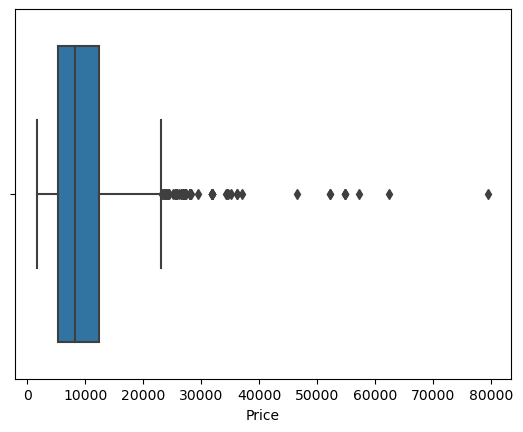

In [54]:
sns.boxplot(x = dataset['Price'])
plt.show()

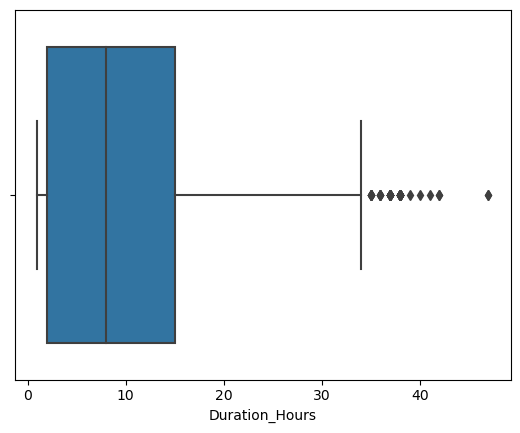

In [55]:
sns.boxplot(x = dataset['Duration_Hours'])
plt.show()

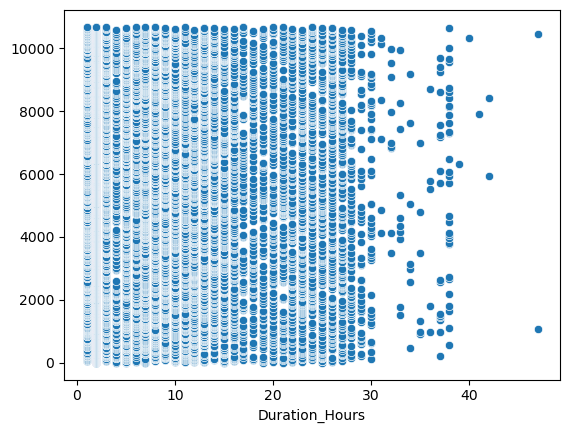

In [56]:
sns.scatterplot(x = dataset['Duration_Hours'], y = dataset['Duration_Hours'].index )
plt.show()

In [57]:
dataset

Airline    Source Destination                  Route Dep_Time  \
0           IndiGo  Banglore       Delhi              BLR → DEL    22:20   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4           IndiGo  Banglore       Delhi        BLR → NAG → DEL    16:50   
...            ...       ...         ...                    ...      ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR    19:55   
10679    Air India   Kolkata    Banglore              CCU → BLR    20:45   
10680  Jet Airways  Banglore       Delhi              BLR → DEL    08:20   
10681      Vistara  Banglore       Delhi              BLR → DEL    11:30   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK    10:55   

       Arrival_Time  Total_Stops  Price  DoJ_Date  DoJ_Month DoJ_Year  \
0      01:10 22 Mar            0   3897        24          3     2019   
1             13:15            2   7662         1          5     2019   
2      04:25 10 Jun            2  13882         9          6     2019   
3             23:30            1   6218        12          5     2019   
4             21:35            1  13302         1          3     2019   
...             ...          ...    ...       ...        ...      ...   
10678         22:25            0   4107         9          4     2019   
10679         23:20            0   4145        27          4     2019   
10680         11:20            0   7229        27          4     2019   
10681         14:10            0  12648         1          3     2019   
10682         19:15            2  11753         9          5     2019   

       Duration_Hours  Duration_Mins  
0                   2             50  
1                   7             25  
2                  19              0  
3                   5             25  
4                   4             45  
...               ...            ...  
10678               2             30  
10679               2             35  
10680               3              0  
10681               2             40  
10682               8             20  

[10462 rows x 13 columns]

In [58]:
dataset['DoJ_Year']  = dataset.DoJ_Year.astype(int)

In [59]:
dataset.dtypes

Airline           object
Source            object
Destination       object
Route             object
Dep_Time          object
Arrival_Time      object
Total_Stops        int32
Price              int64
DoJ_Date           int32
DoJ_Month          int32
DoJ_Year           int32
Duration_Hours     int32
Duration_Mins      int32
dtype: object

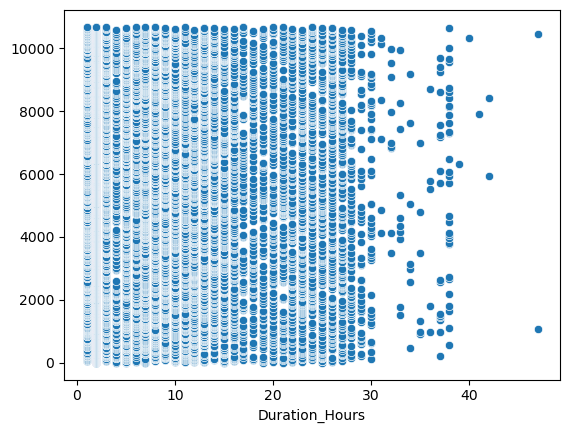

In [60]:
sns.scatterplot(x = dataset['Duration_Hours'], y = dataset['Duration_Hours'].index )
plt.show()

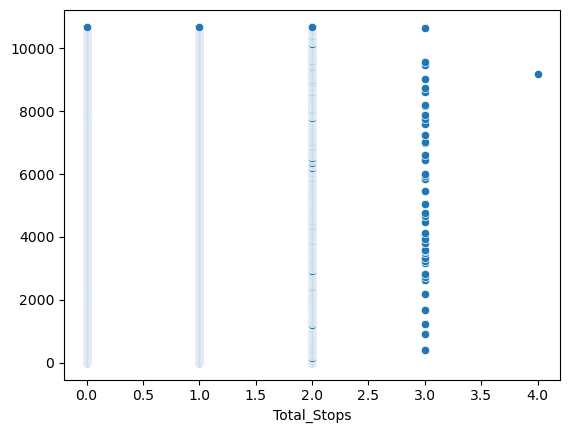

In [61]:
sns.scatterplot(x = dataset['Total_Stops'], y = dataset['Total_Stops'].index )
plt.show()

<Axes: xlabel='Price', ylabel='Density'>

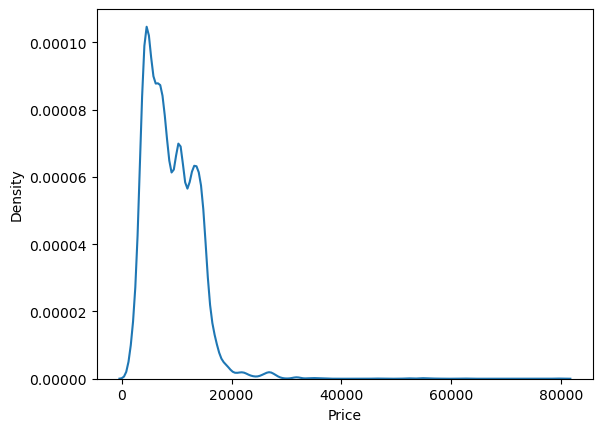

In [62]:
sns.kdeplot(dataset['Price'])

<Axes: xlabel='Duration_Hours', ylabel='Density'>

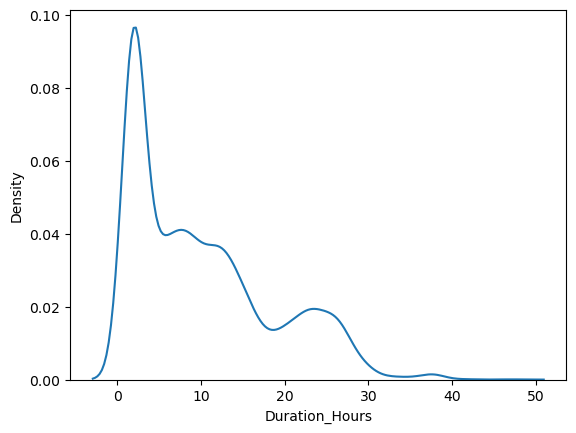

In [63]:
sns.kdeplot(dataset['Duration_Hours'])

In [64]:
dataset

Airline    Source Destination                  Route Dep_Time  \
0           IndiGo  Banglore       Delhi              BLR → DEL    22:20   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4           IndiGo  Banglore       Delhi        BLR → NAG → DEL    16:50   
...            ...       ...         ...                    ...      ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR    19:55   
10679    Air India   Kolkata    Banglore              CCU → BLR    20:45   
10680  Jet Airways  Banglore       Delhi              BLR → DEL    08:20   
10681      Vistara  Banglore       Delhi              BLR → DEL    11:30   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK    10:55   

       Arrival_Time  Total_Stops  Price  DoJ_Date  DoJ_Month  DoJ_Year  \
0      01:10 22 Mar            0   3897        24          3      2019   
1             13:15            2   7662         1          5      2019   
2      04:25 10 Jun            2  13882         9          6      2019   
3             23:30            1   6218        12          5      2019   
4             21:35            1  13302         1          3      2019   
...             ...          ...    ...       ...        ...       ...   
10678         22:25            0   4107         9          4      2019   
10679         23:20            0   4145        27          4      2019   
10680         11:20            0   7229        27          4      2019   
10681         14:10            0  12648         1          3      2019   
10682         19:15            2  11753         9          5      2019   

       Duration_Hours  Duration_Mins  
0                   2             50  
1                   7             25  
2                  19              0  
3                   5             25  
4                   4             45  
...               ...            ...  
10678               2             30  
10679               2             35  
10680               3              0  
10681               2             40  
10682               8             20  

[10462 rows x 13 columns]

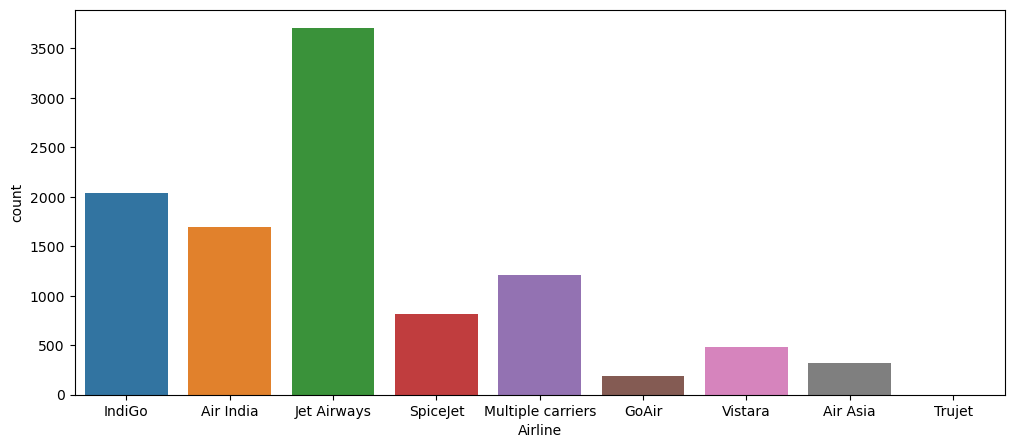

In [65]:
plt.figure(figsize = (12,5))
sns.countplot(x = dataset['Airline'])
plt.show()

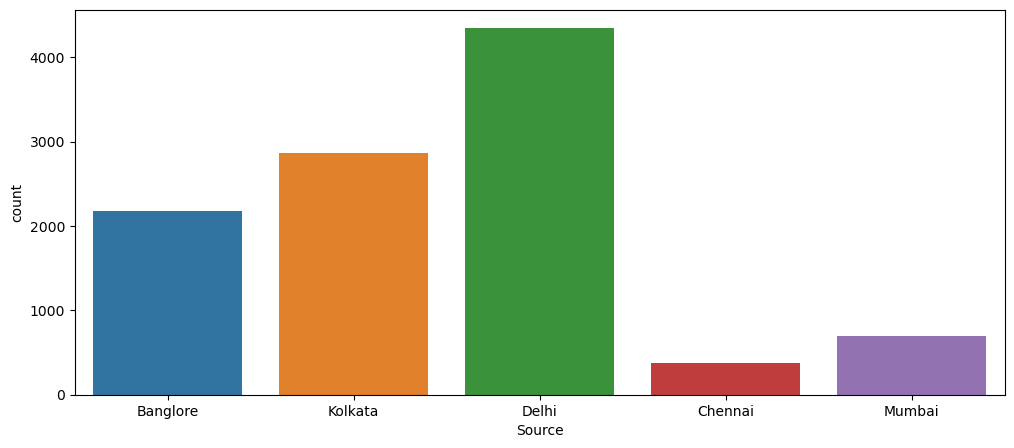

In [66]:
plt.figure(figsize = (12,5))
sns.countplot(x = dataset['Source'])
plt.show()

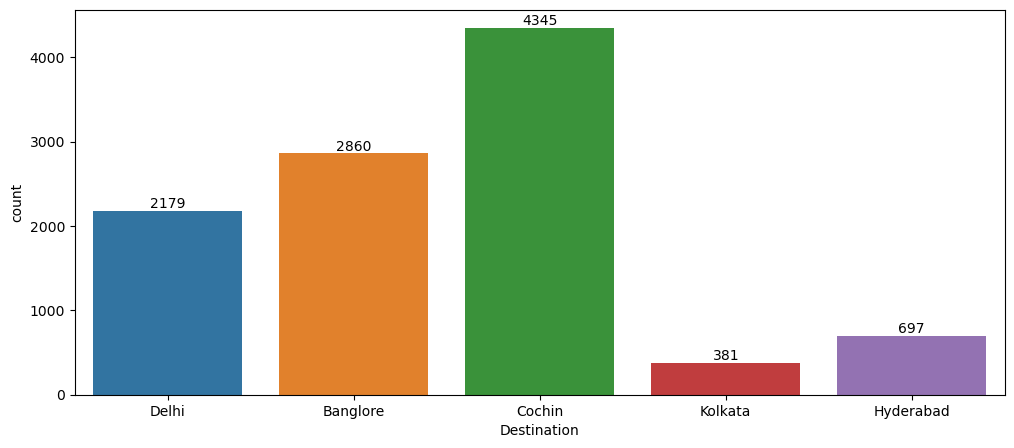

In [67]:
plt.figure(figsize = (12,5))
a = sns.countplot(x = dataset['Destination'])
for i in a.containers:
    a.bar_label(i)
plt.show()

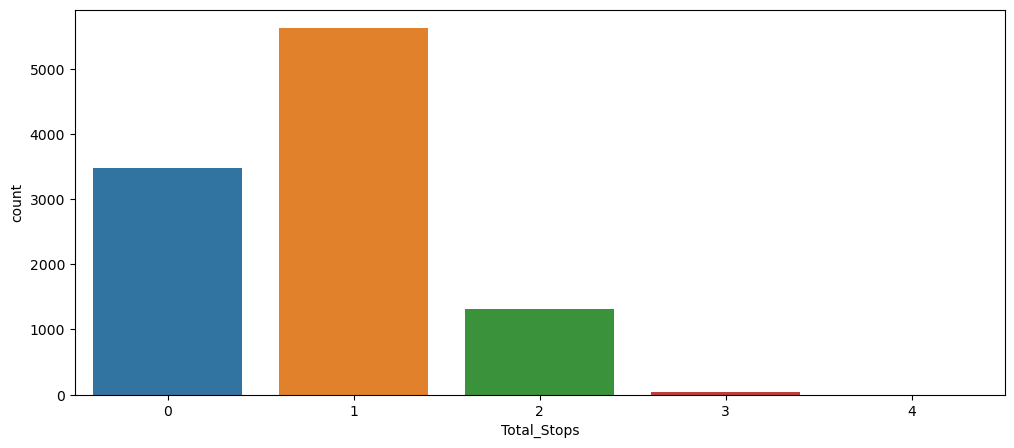

In [68]:
plt.figure(figsize = (12,5))
sns.countplot(x = dataset['Total_Stops'])
plt.show()

In [69]:
x = dataset[['Source', 'Destination']].value_counts()

In [70]:
freq  = pd.DataFrame(x)
freq.reset_index(inplace = True)
freq.rename({0:'Total_Trips'}, axis = 1, inplace = True)

In [71]:
freq

Source Destination  Total_Trips
0     Delhi      Cochin         4345
1   Kolkata    Banglore         2860
2  Banglore       Delhi         2179
3    Mumbai   Hyderabad          697
4   Chennai     Kolkata          381

In [72]:
y = dataset[['Airline', 'Source', 'Destination']].value_counts()
z = pd.DataFrame(y)

In [73]:
z.reset_index(inplace = True)
z.rename({0:'Total_Trips'}, axis = 1, inplace = True)

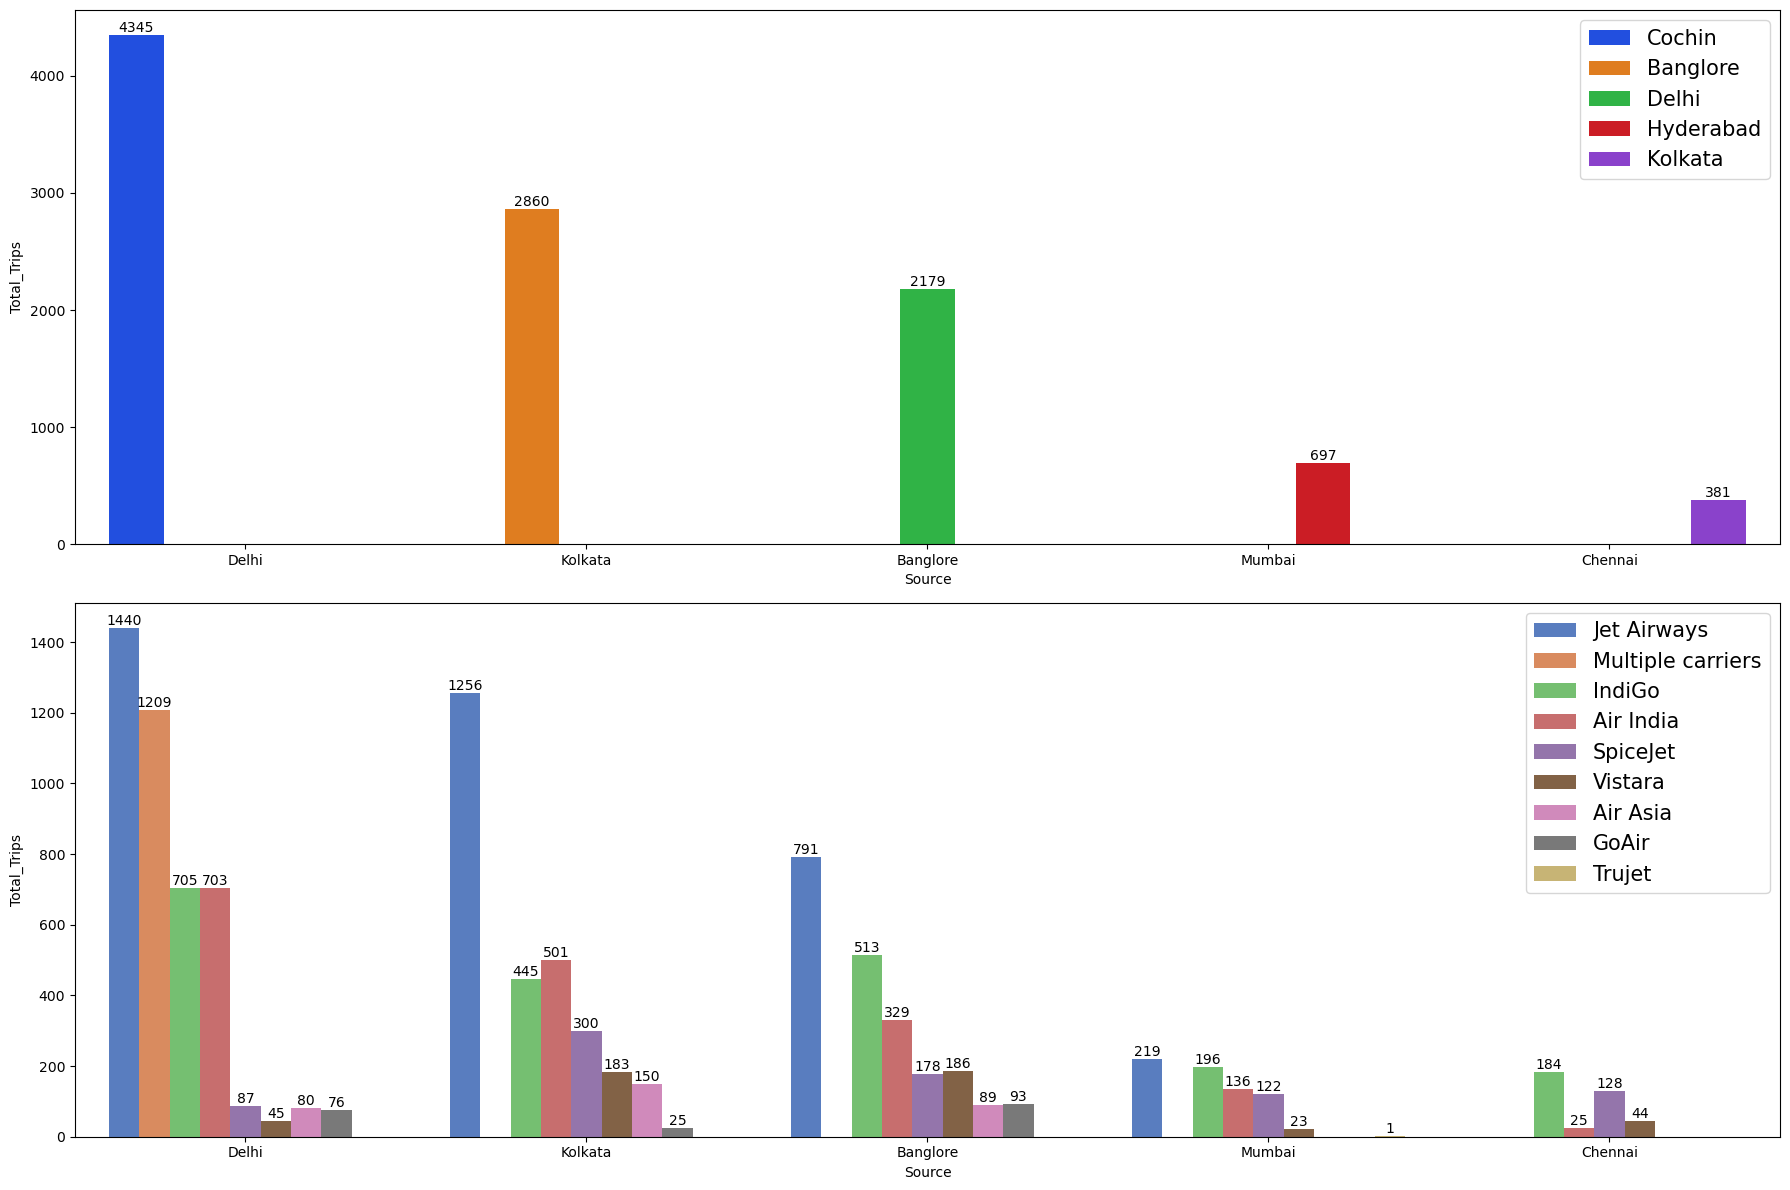

In [74]:
f, a = plt.subplots(2,1, figsize = (18,12))
sns.barplot(x = 'Source', y = 'Total_Trips', hue = 'Destination',palette = 'bright', data = freq, ax = a[0])
for i in a[0].containers:
    a[0].bar_label(i)
sns.barplot(x = 'Source', y = 'Total_Trips', hue = 'Airline',palette = 'muted', data = z, ax = a[1])
for i in a[1].containers:
    a[1].bar_label(i)
a[0].legend(loc = 'upper right', fontsize = 15)
a[1].legend(loc = 'upper right', fontsize = 15)
plt.tight_layout()
plt.show()

### Almost In all the routes Jet Airways are the highest trips are taken except in Chennai - Kolkata, here Jet Airways are not taken even 1 trip.


### Almost in all the routes GoAir are with the least trips 

### Almost in all the routes IndiGo are available with the decent trips in all routes

In [75]:
dataset[dataset['Airline'] == 'Trujet']

Airline  Source Destination            Route Dep_Time Arrival_Time  \
2878  Trujet  Mumbai   Hyderabad  BOM → NDC → HYD    13:05        16:20   

      Total_Stops  Price  DoJ_Date  DoJ_Month  DoJ_Year  Duration_Hours  \
2878            1   4140         6          3      2019               3   

      Duration_Mins  
2878             15

### Trip with Trujet is only available on the Mumbai - Hyderabad route  - only 1 trip

### Trips with multiple carriers are only available on the Delhi to Cochin route   - 1209 trips

#### Highest Trips :- Delhi - Cochin  i,e 4345
        
* In this route Jet Airways are 1440, Multiple Carriers are 1209 these are the top 2 contributions
* In this route Vistara, GoAir, AirAsia, SpiceJet and respective trips are 45, 76, 80, 87  these are least contributions

#### Lowest Trips :-  Chennai - Kolkata  i,e 381

* In this route IndiGo are 184 which is highest
* In this route AirIndia are 25 only which is least one
* Only 4 types of planes are available in this trip

In [127]:
dataset['Duration_Hours']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_Hours, Length: 10462, dtype: int32

In [128]:
dataset['Duration_Mins']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_Mins, Length: 10462, dtype: int32

In [129]:
dataset['Duration_Time'] = dataset['Duration_Hours'].astype(str) + '.' + dataset['Duration_Mins'].astype(str)

In [130]:
dataset

Airline    Source Destination                  Route Dep_Time  \
0           IndiGo  Banglore       Delhi              BLR → DEL    22:20   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4           IndiGo  Banglore       Delhi        BLR → NAG → DEL    16:50   
...            ...       ...         ...                    ...      ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR    19:55   
10679    Air India   Kolkata    Banglore              CCU → BLR    20:45   
10680  Jet Airways  Banglore       Delhi              BLR → DEL    08:20   
10681      Vistara  Banglore       Delhi              BLR → DEL    11:30   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK    10:55   

       Arrival_Time  Total_Stops  Price  DoJ_Date  DoJ_Month  DoJ_Year  \
0      01:10 22 Mar            0   3897        24          3      2019   
1             13:15            2   7662         1          5      2019   
2      04:25 10 Jun            2  13882         9          6      2019   
3             23:30            1   6218        12          5      2019   
4             21:35            1  13302         1          3      2019   
...             ...          ...    ...       ...        ...       ...   
10678         22:25            0   4107         9          4      2019   
10679         23:20            0   4145        27          4      2019   
10680         11:20            0   7229        27          4      2019   
10681         14:10            0  12648         1          3      2019   
10682         19:15            2  11753         9          5      2019   

       Duration_Hours  Duration_Mins Duration_Time  
0                   2             50          2.50  
1                   7             25          7.25  
2                  19              0          19.0  
3                   5             25          5.25  
4                   4             45          4.45  
...               ...            ...           ...  
10678               2             30          2.30  
10679               2             35          2.35  
10680               3              0           3.0  
10681               2             40          2.40  
10682               8             20          8.20  

[10462 rows x 14 columns]

In [188]:
ind = dataset['Total_Stops'].value_counts().index

In [191]:
ind

Int64Index([1, 0, 2, 3, 4], dtype='int64')

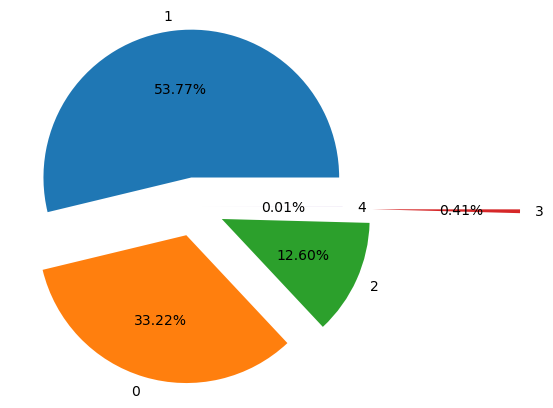

In [208]:
plt.pie(dataset['Total_Stops'].value_counts(), labels = ind, autopct='%.2f%%', explode = [0.2,0.2,0.2,1.2,0])
plt.show()

In [213]:
dataset[dataset['Source'] == 'Chennai'][['Total_Stops']].value_counts()

Total_Stops
0              381
dtype: int64

In [134]:
dataset['Duration_Time'] = dataset['Duration_Time'].astype(float)

In [136]:
copy = dataset[(dataset['Source' ] == 'Delhi') & (dataset['Destination'] == 'Cochin')]

In [164]:
dataset['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [165]:
dataset['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [156]:
copy['Total_Stops'].unique()

array([2, 1, 0, 3])

In [181]:
s_d = {'Delhi':'Cochin','Kolkata':'Bangalore','Banglore':'Delhi','Mumbai':'Hyderabad', 'Chennai':'Kolkata'}

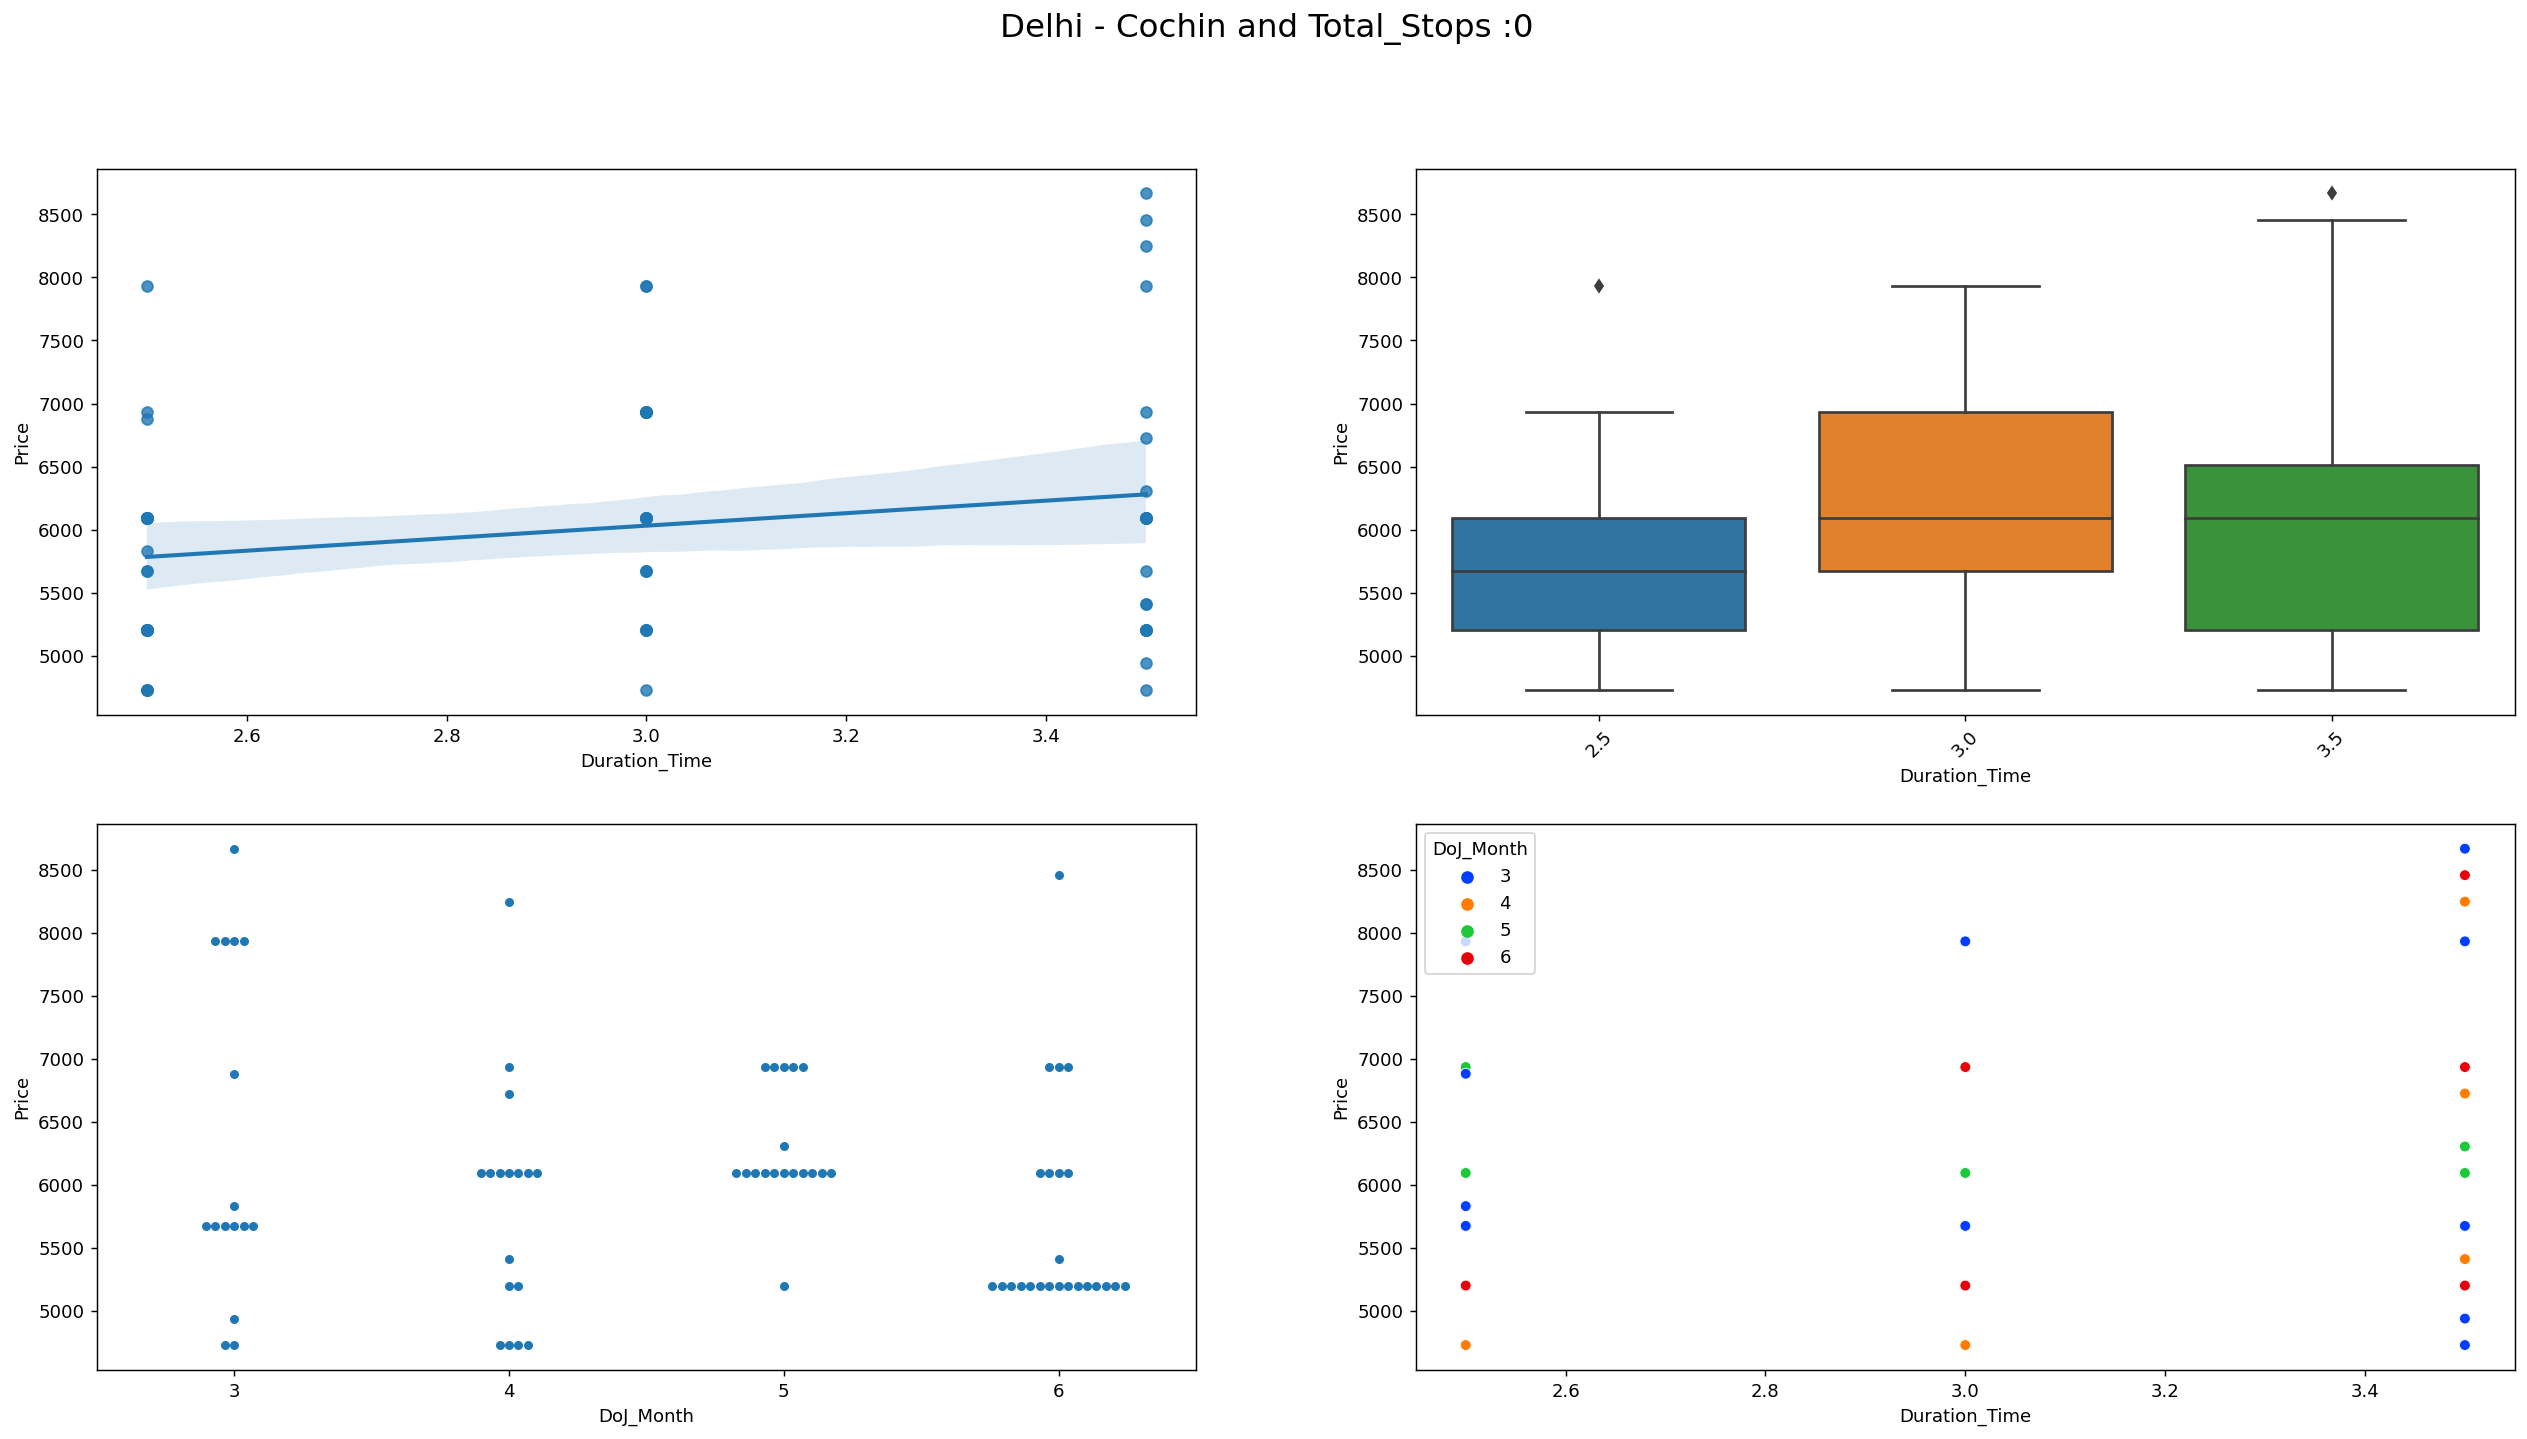

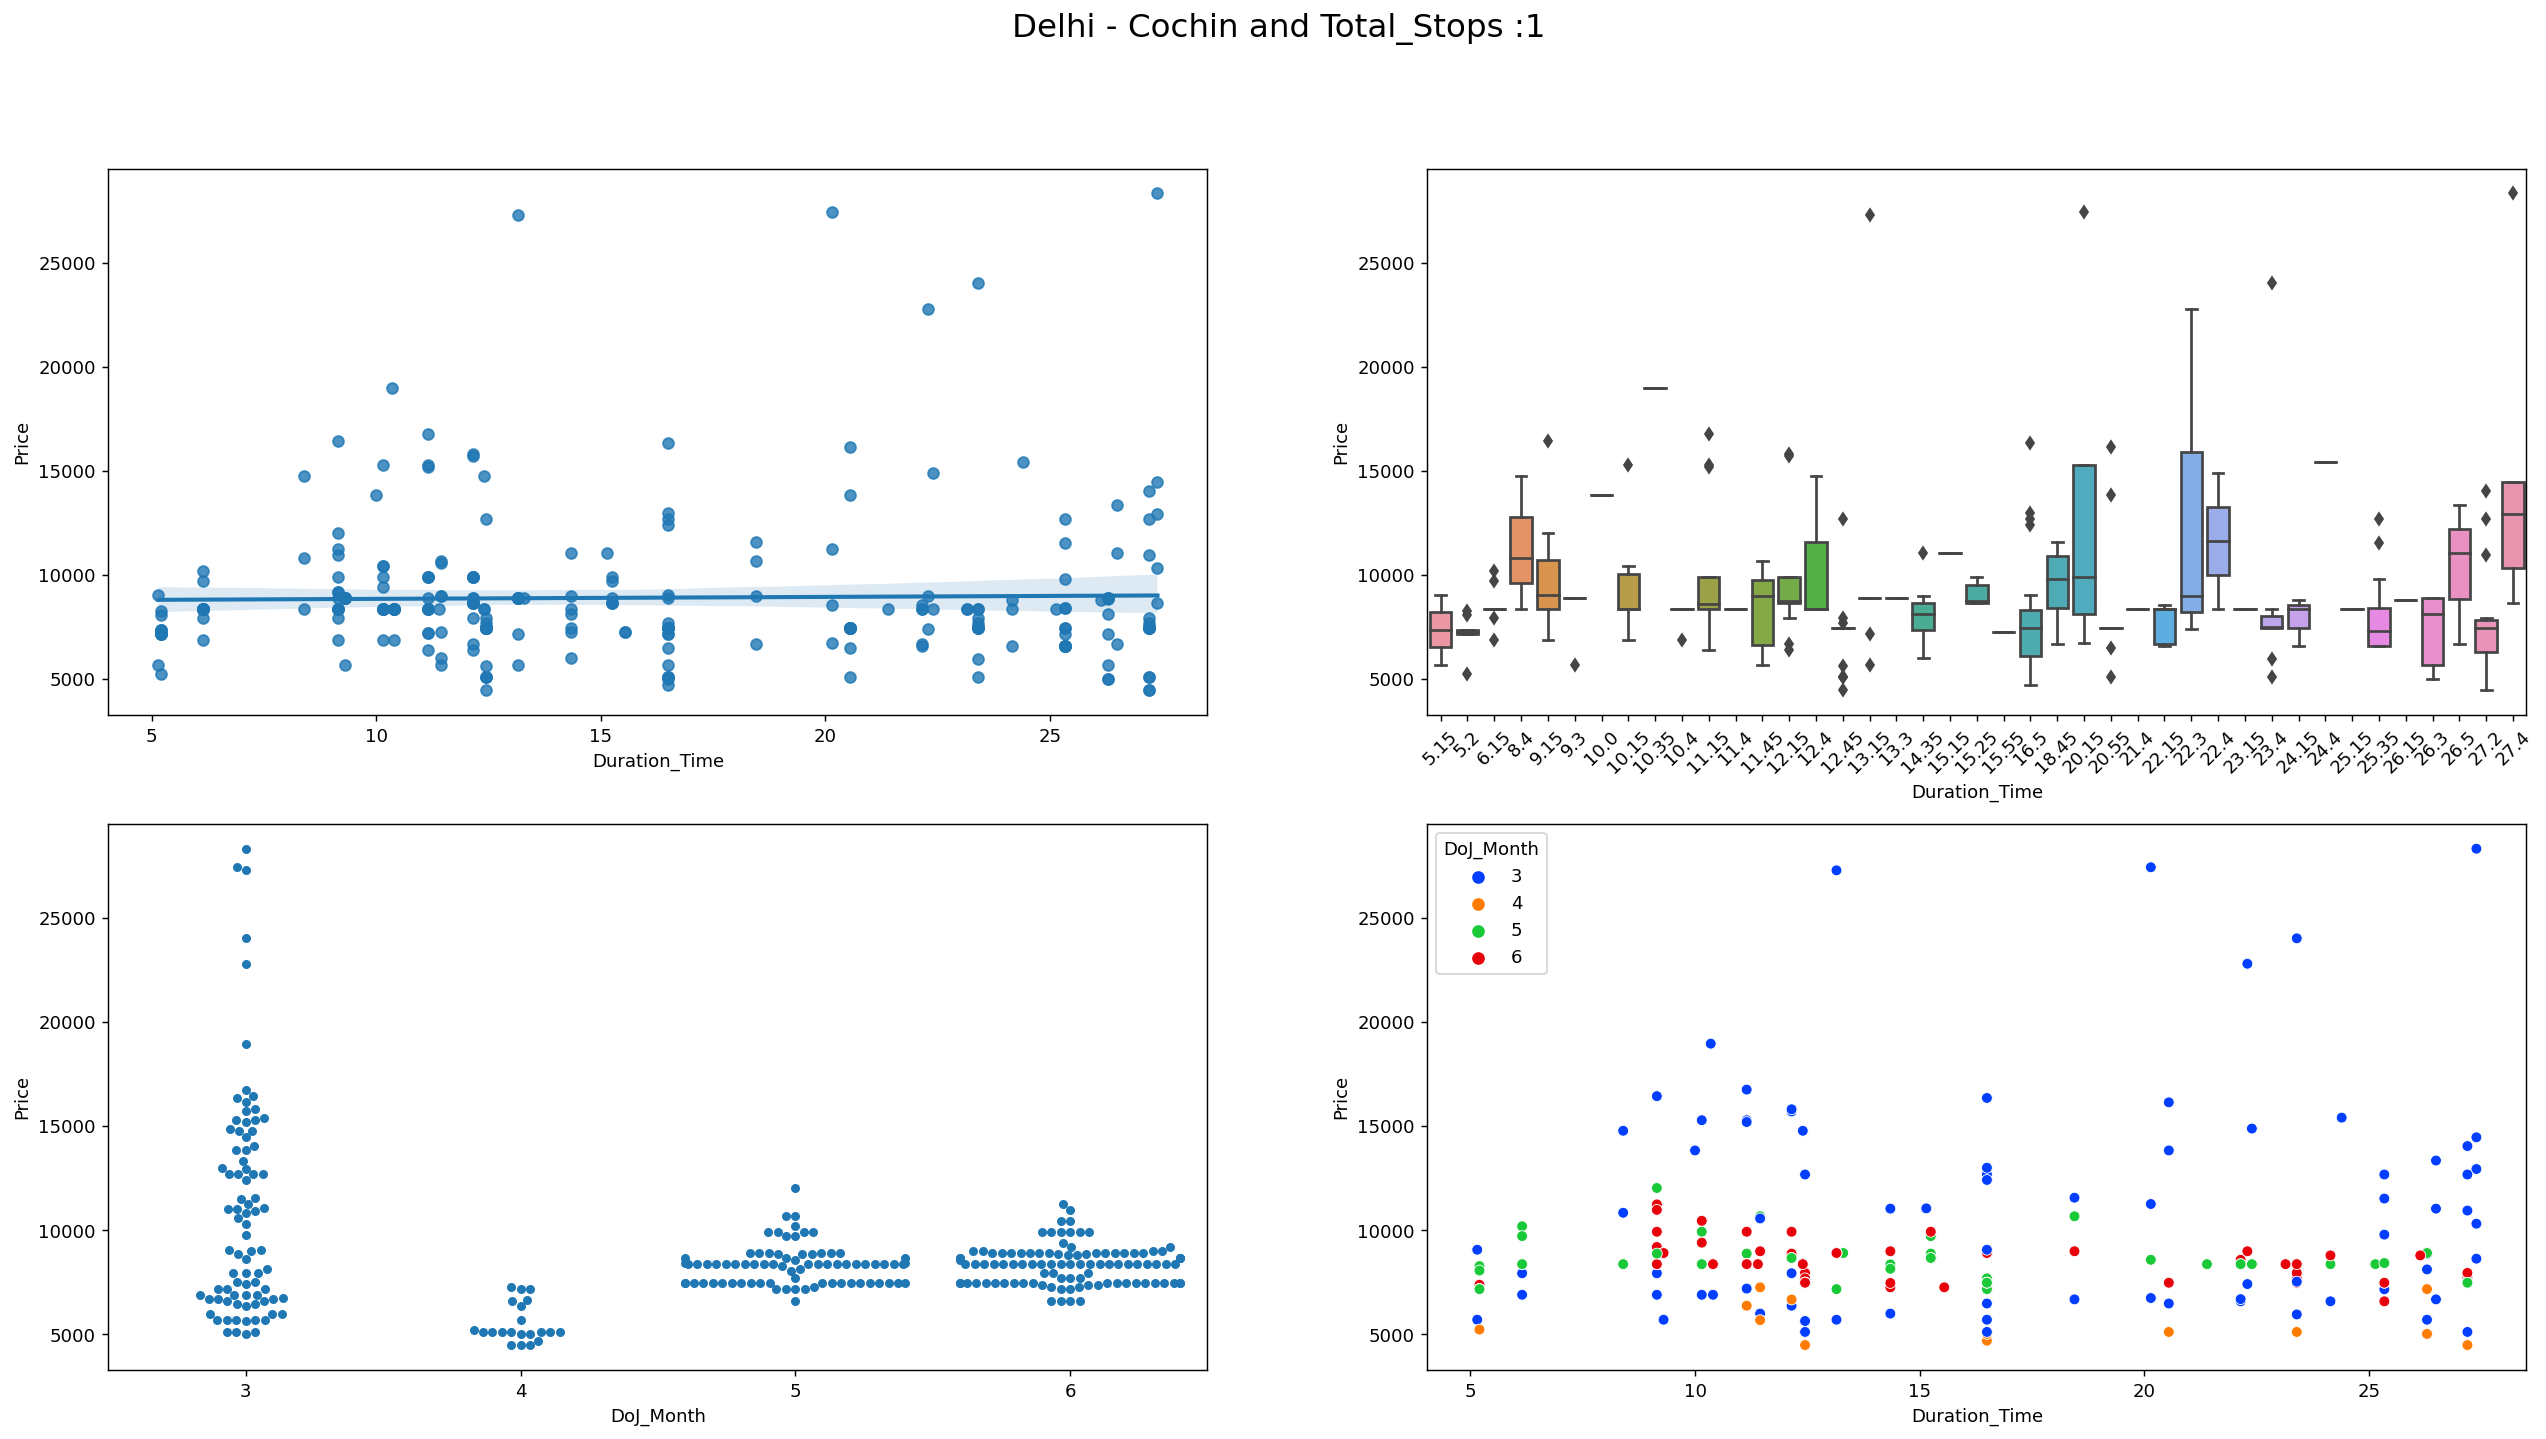

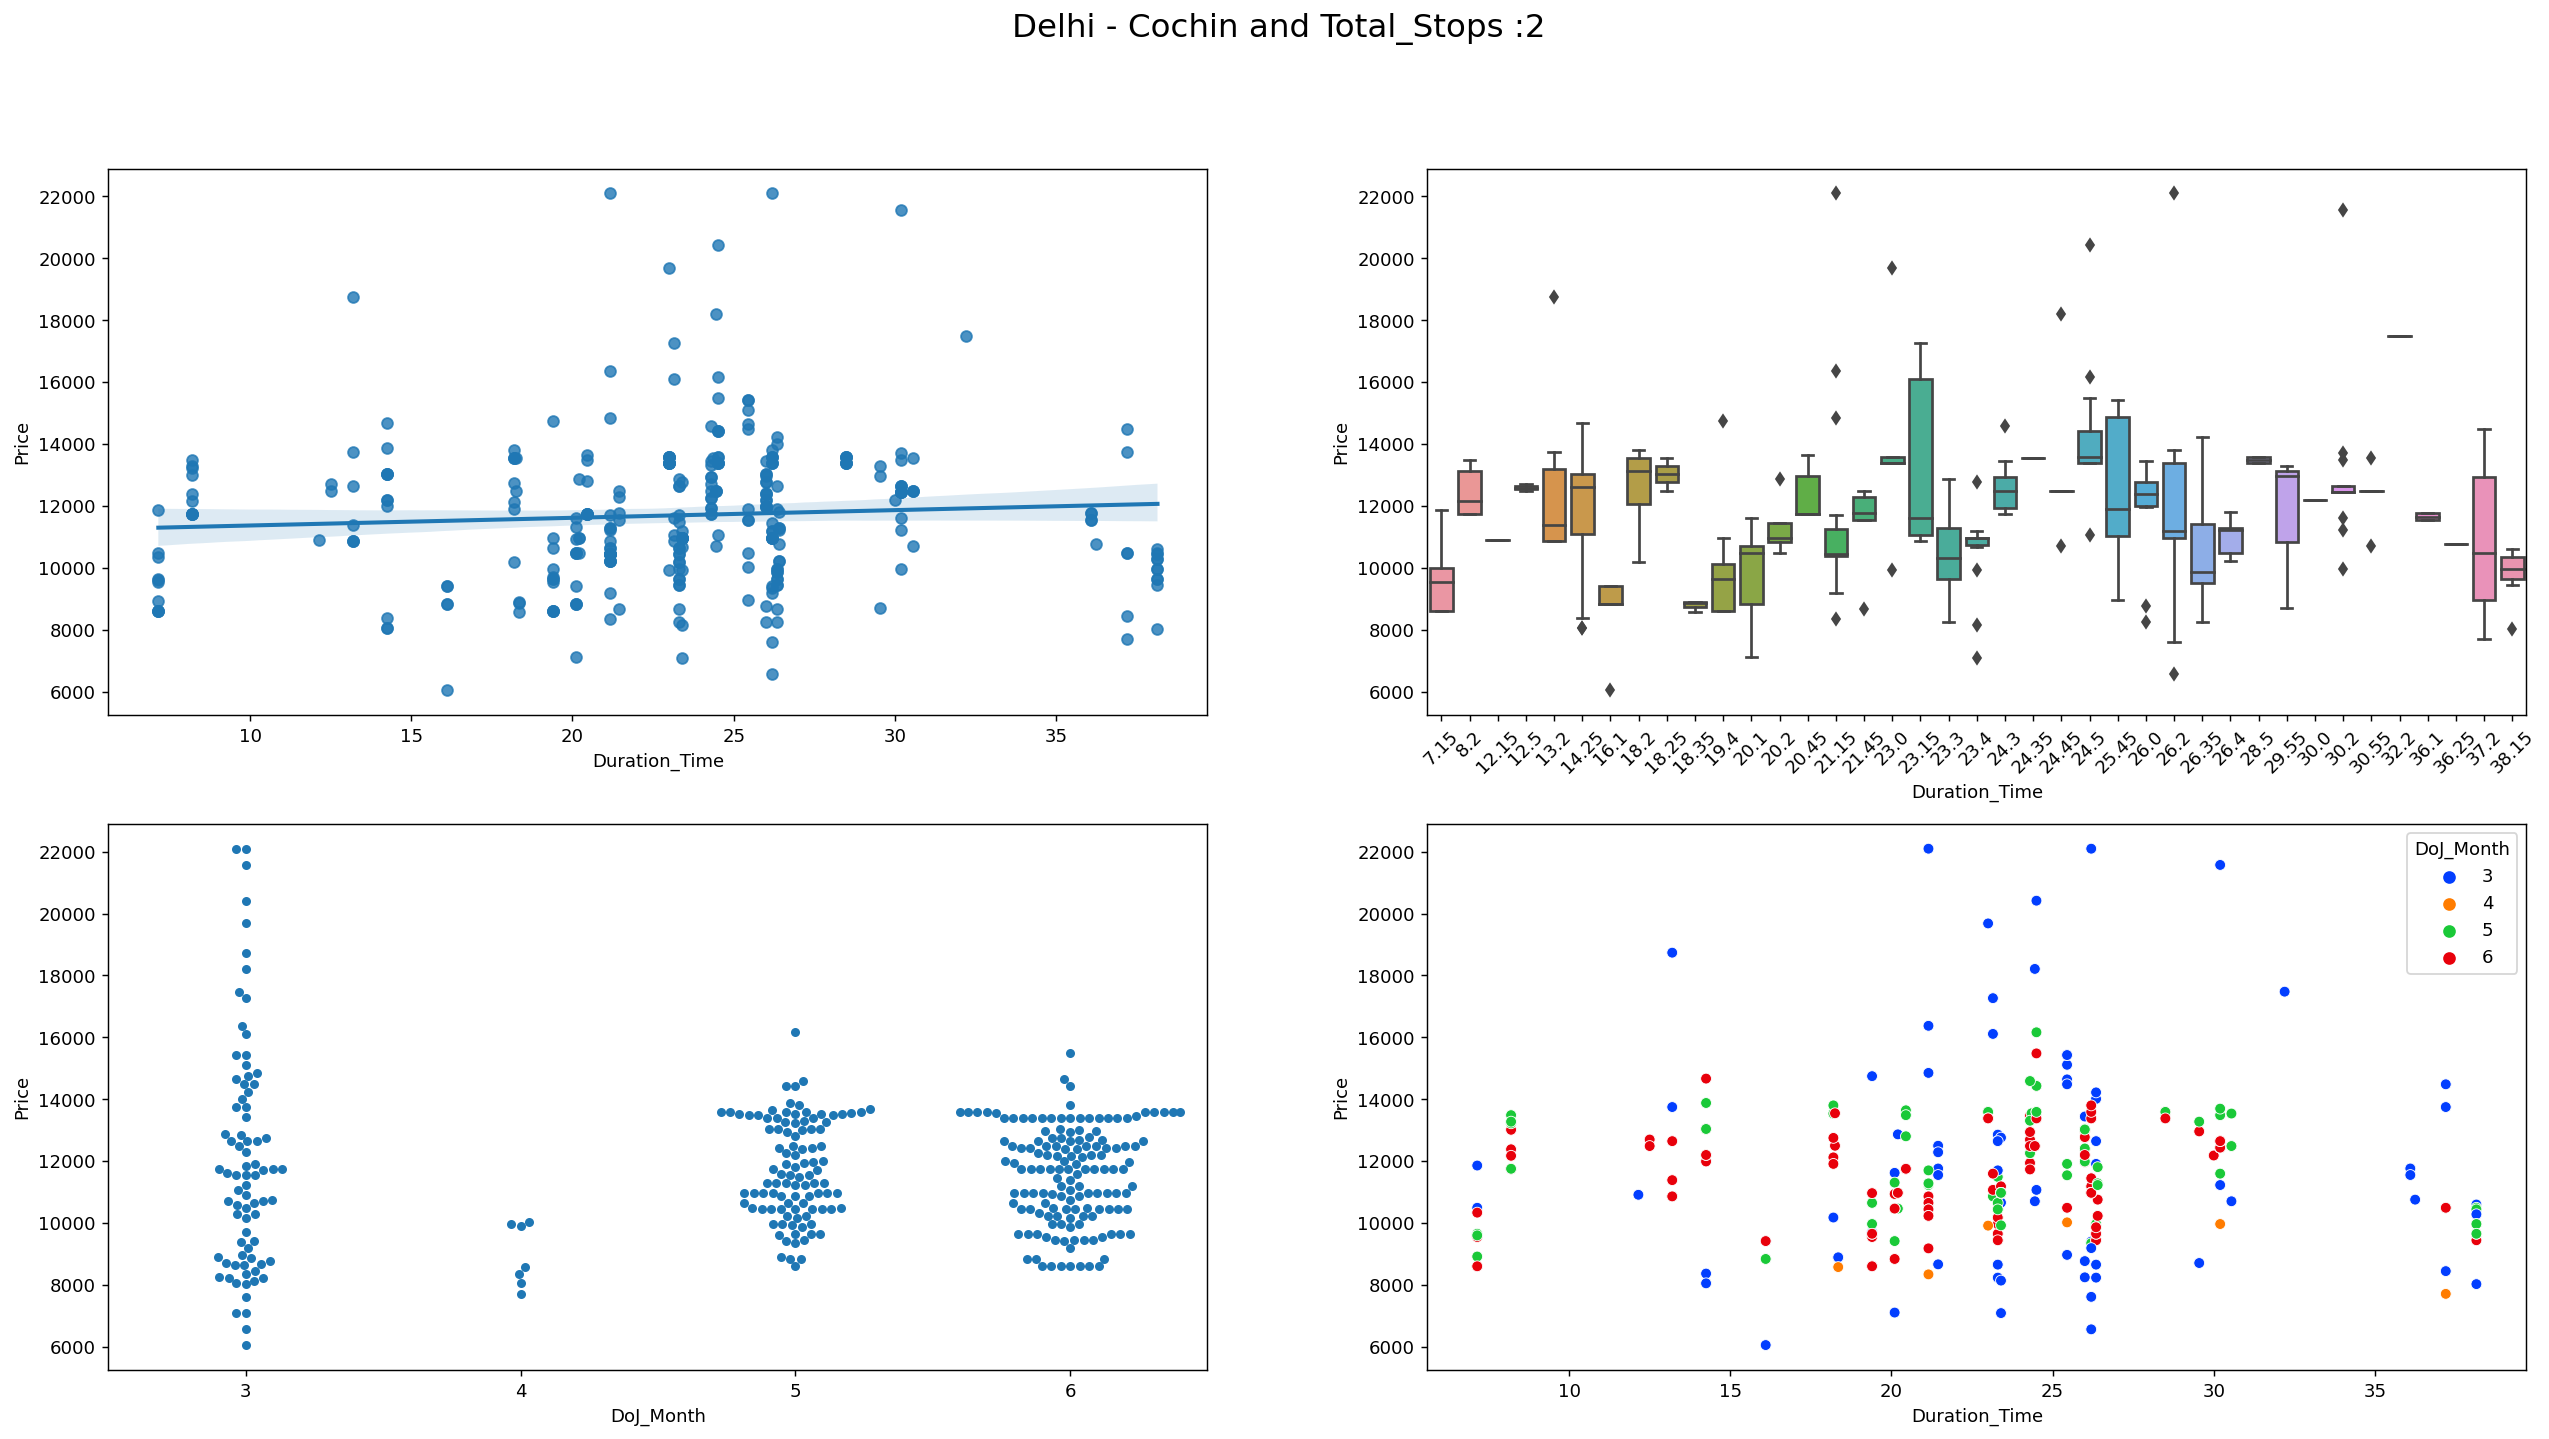

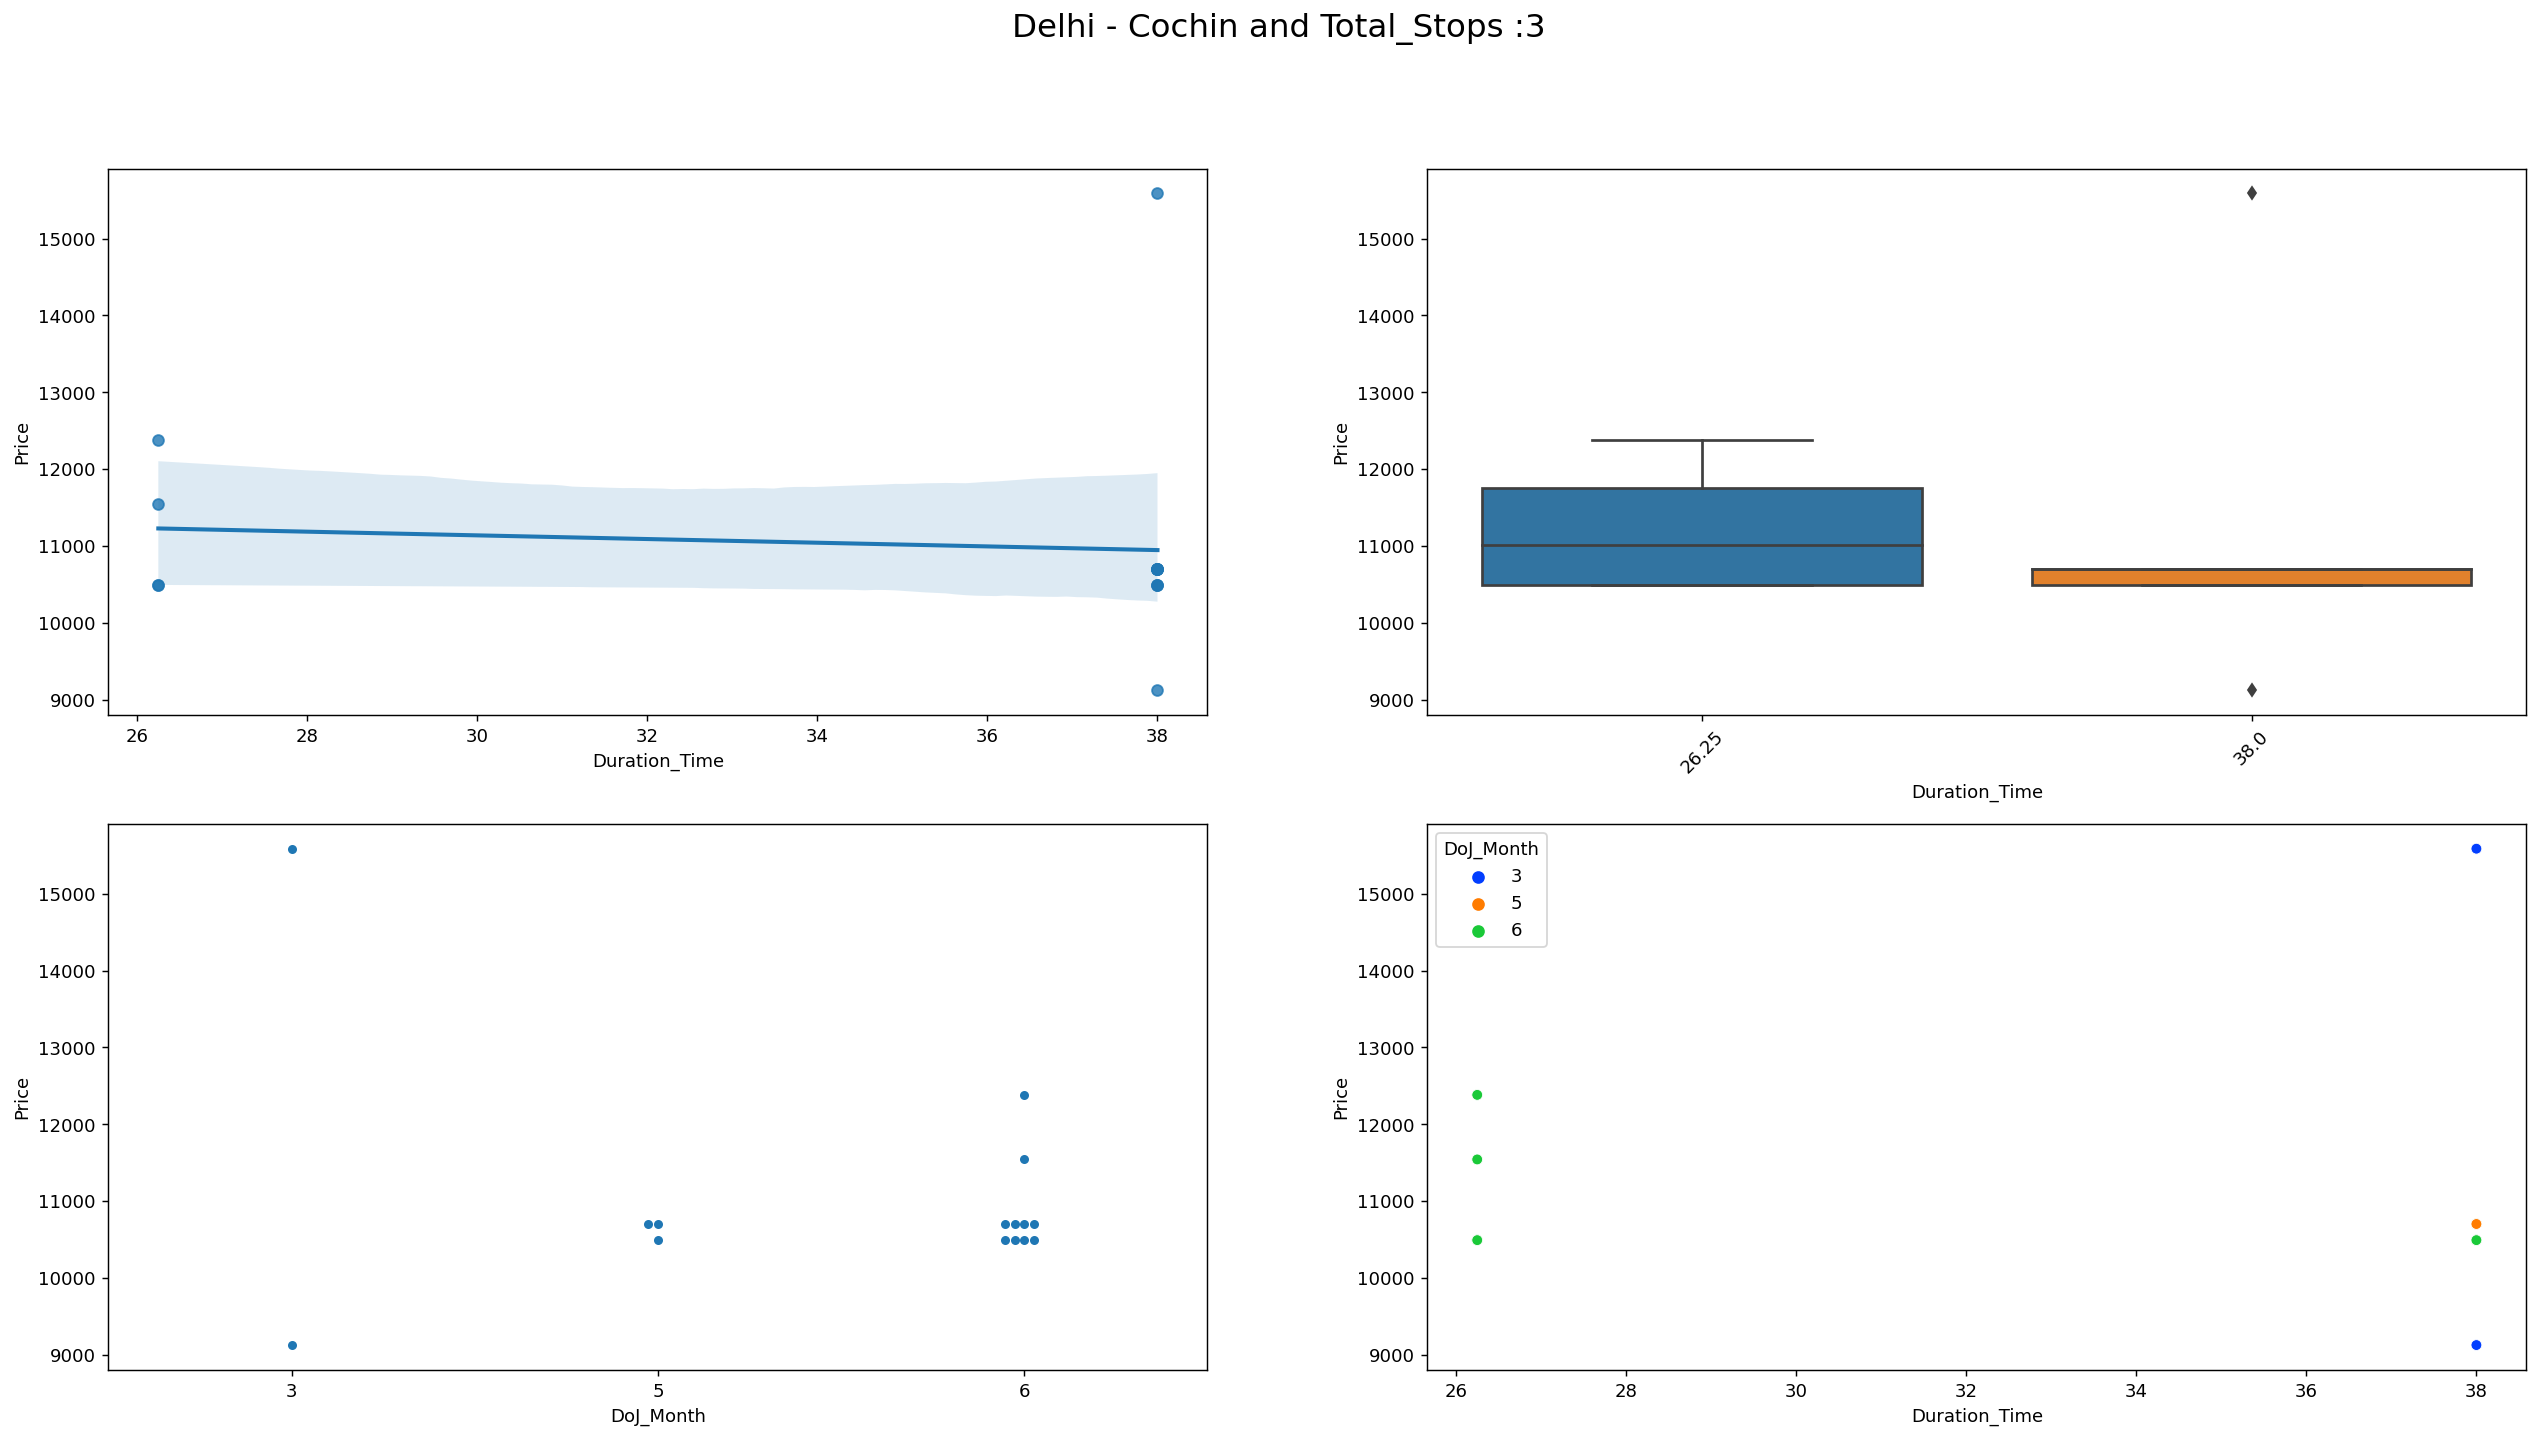

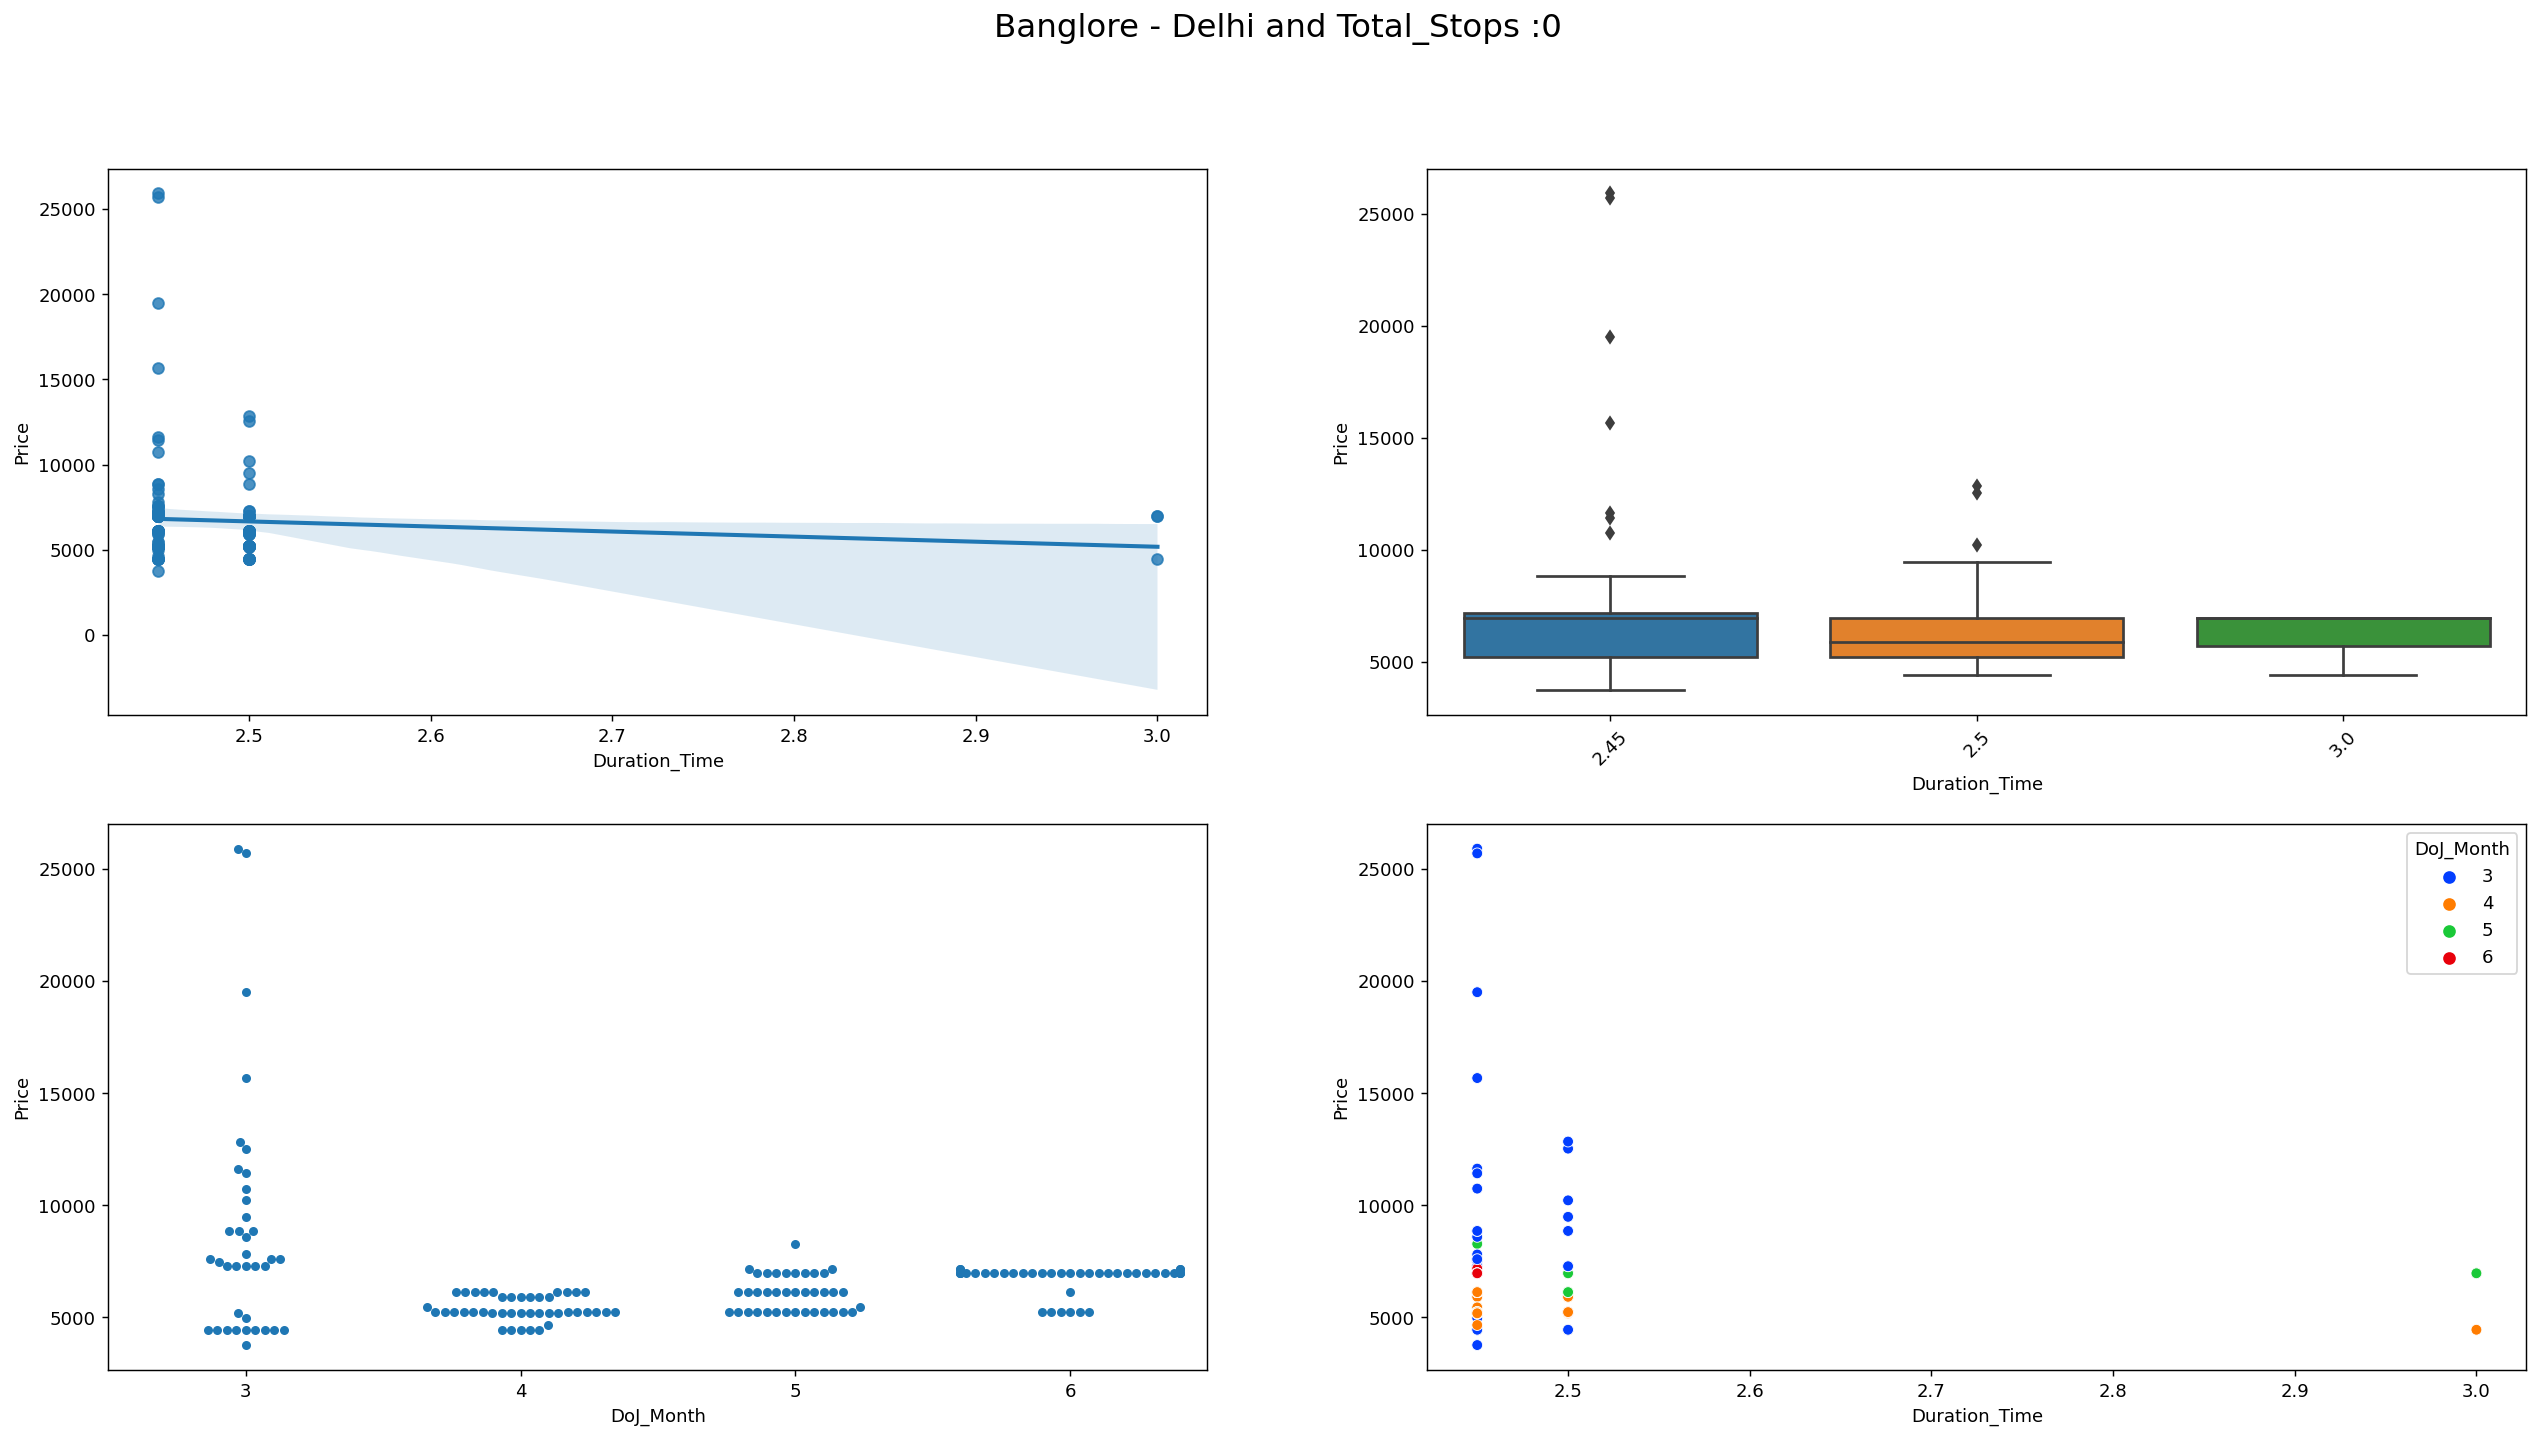

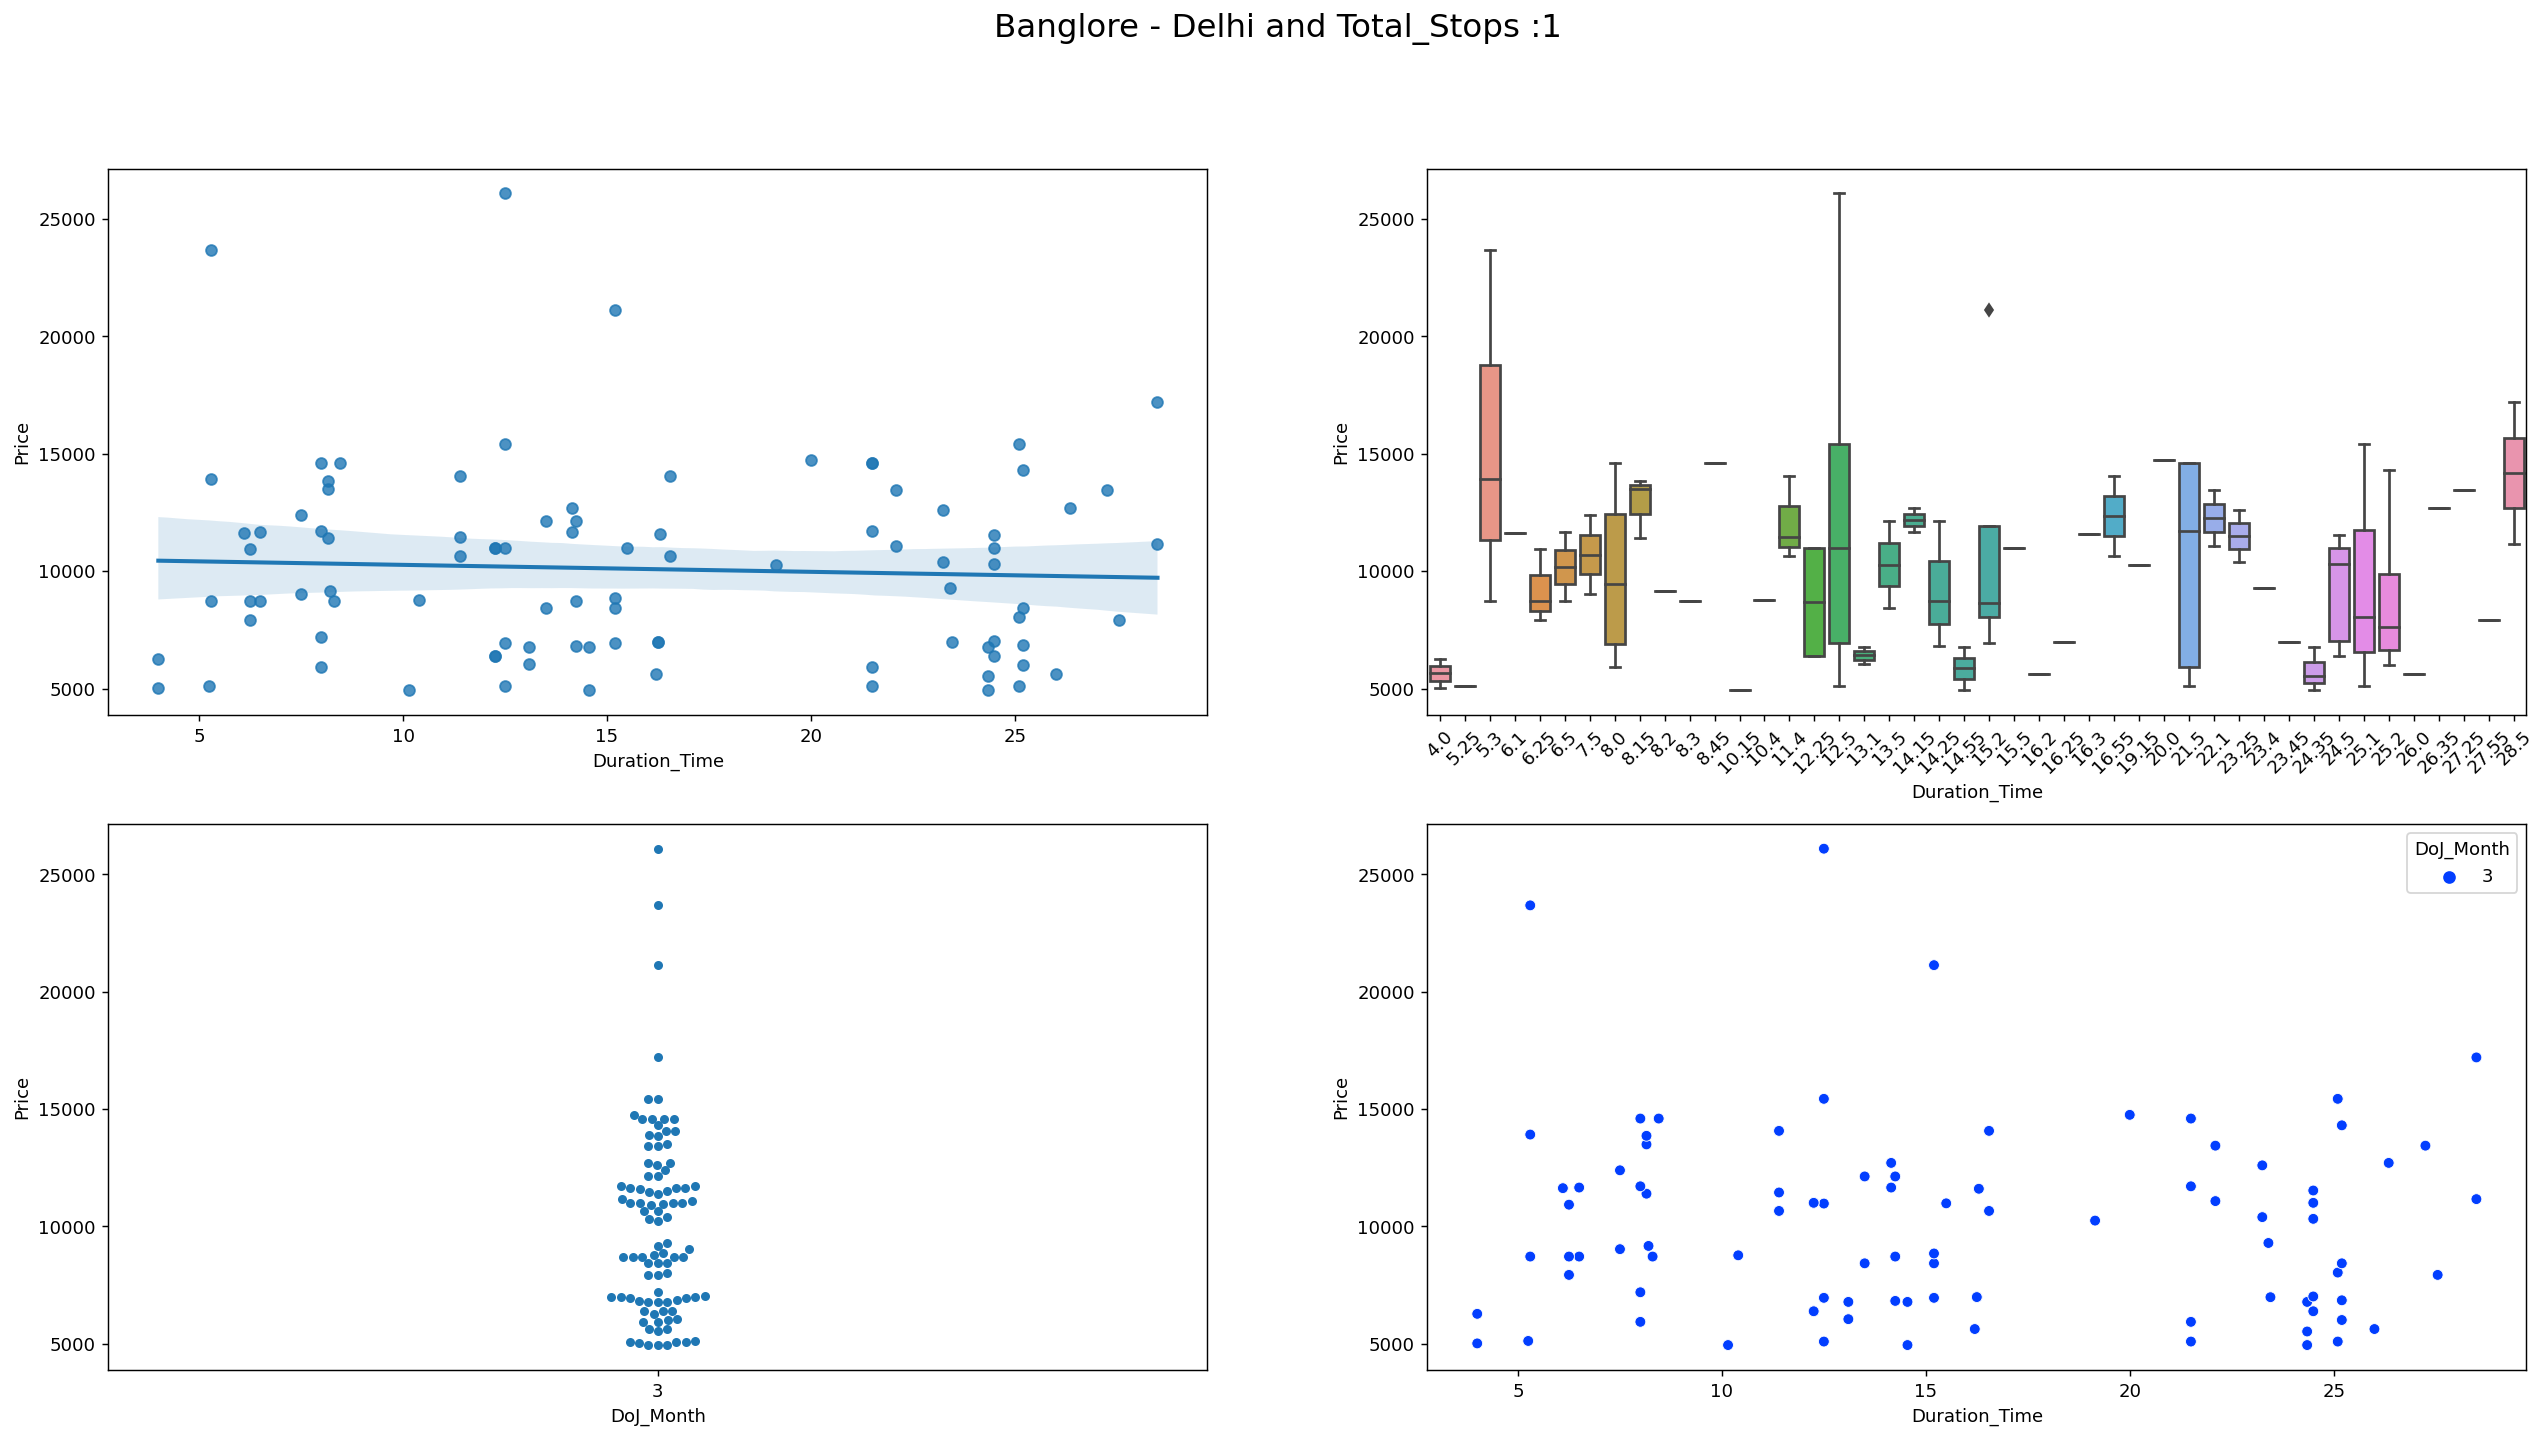

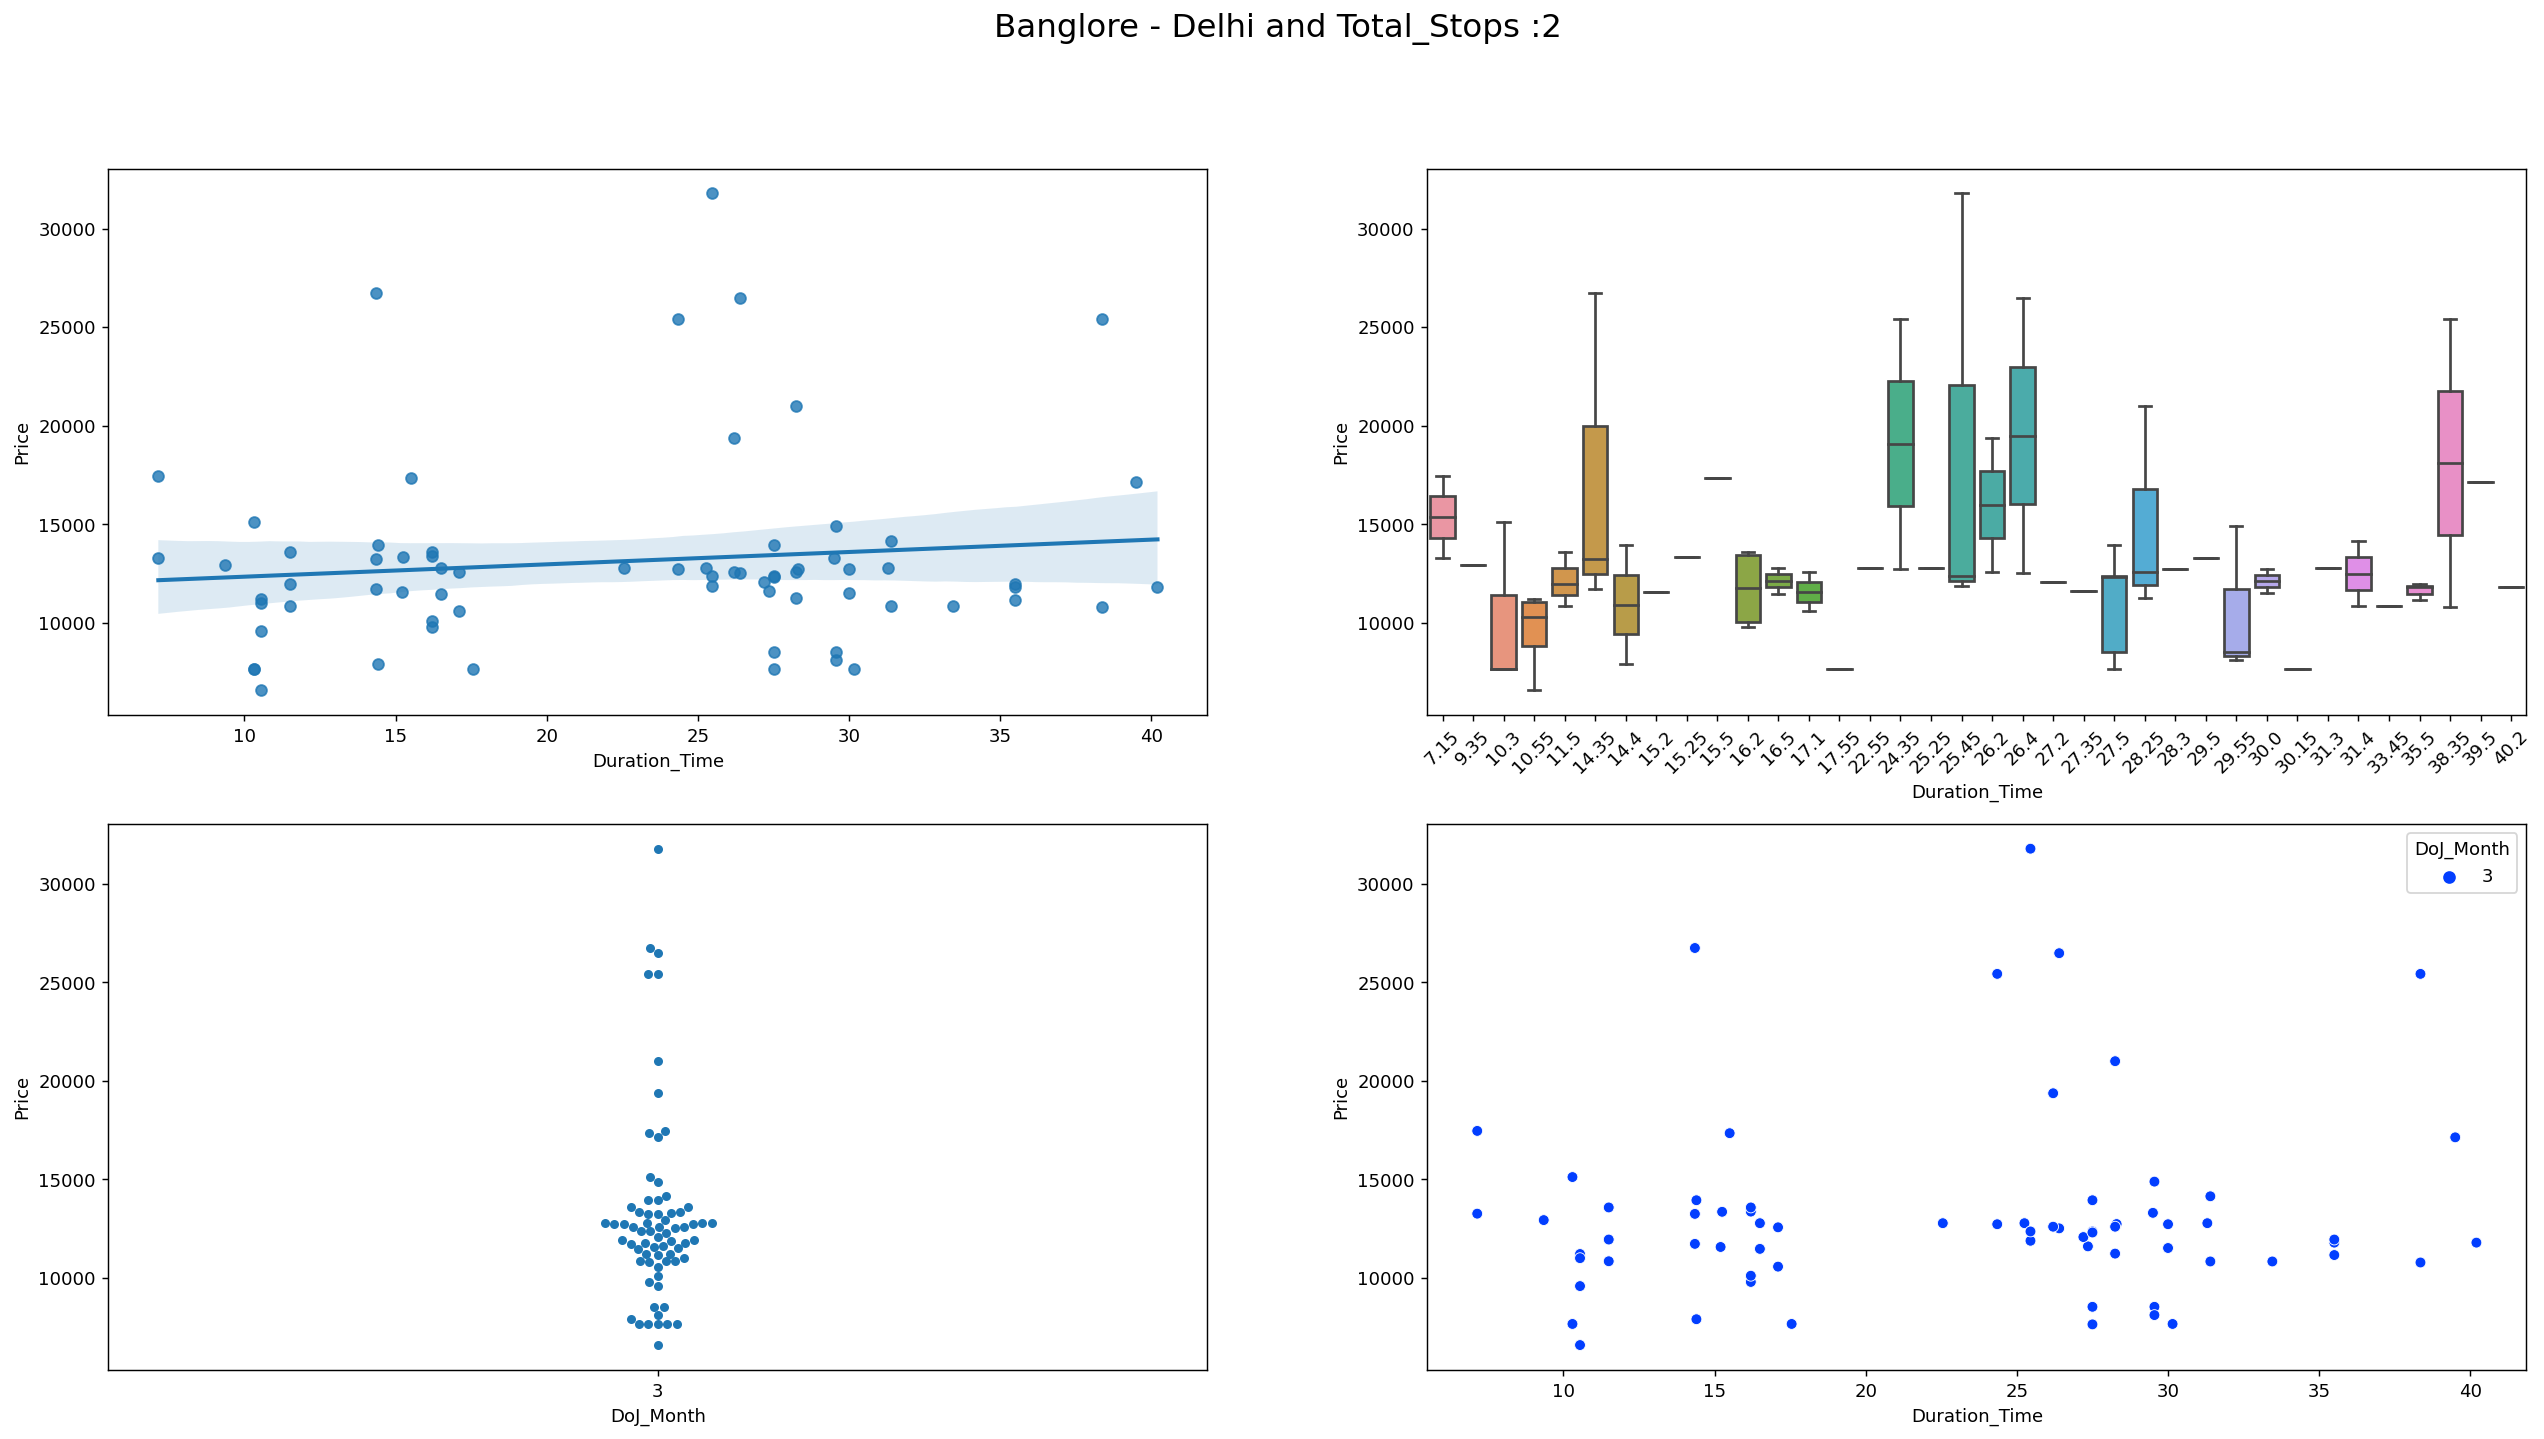

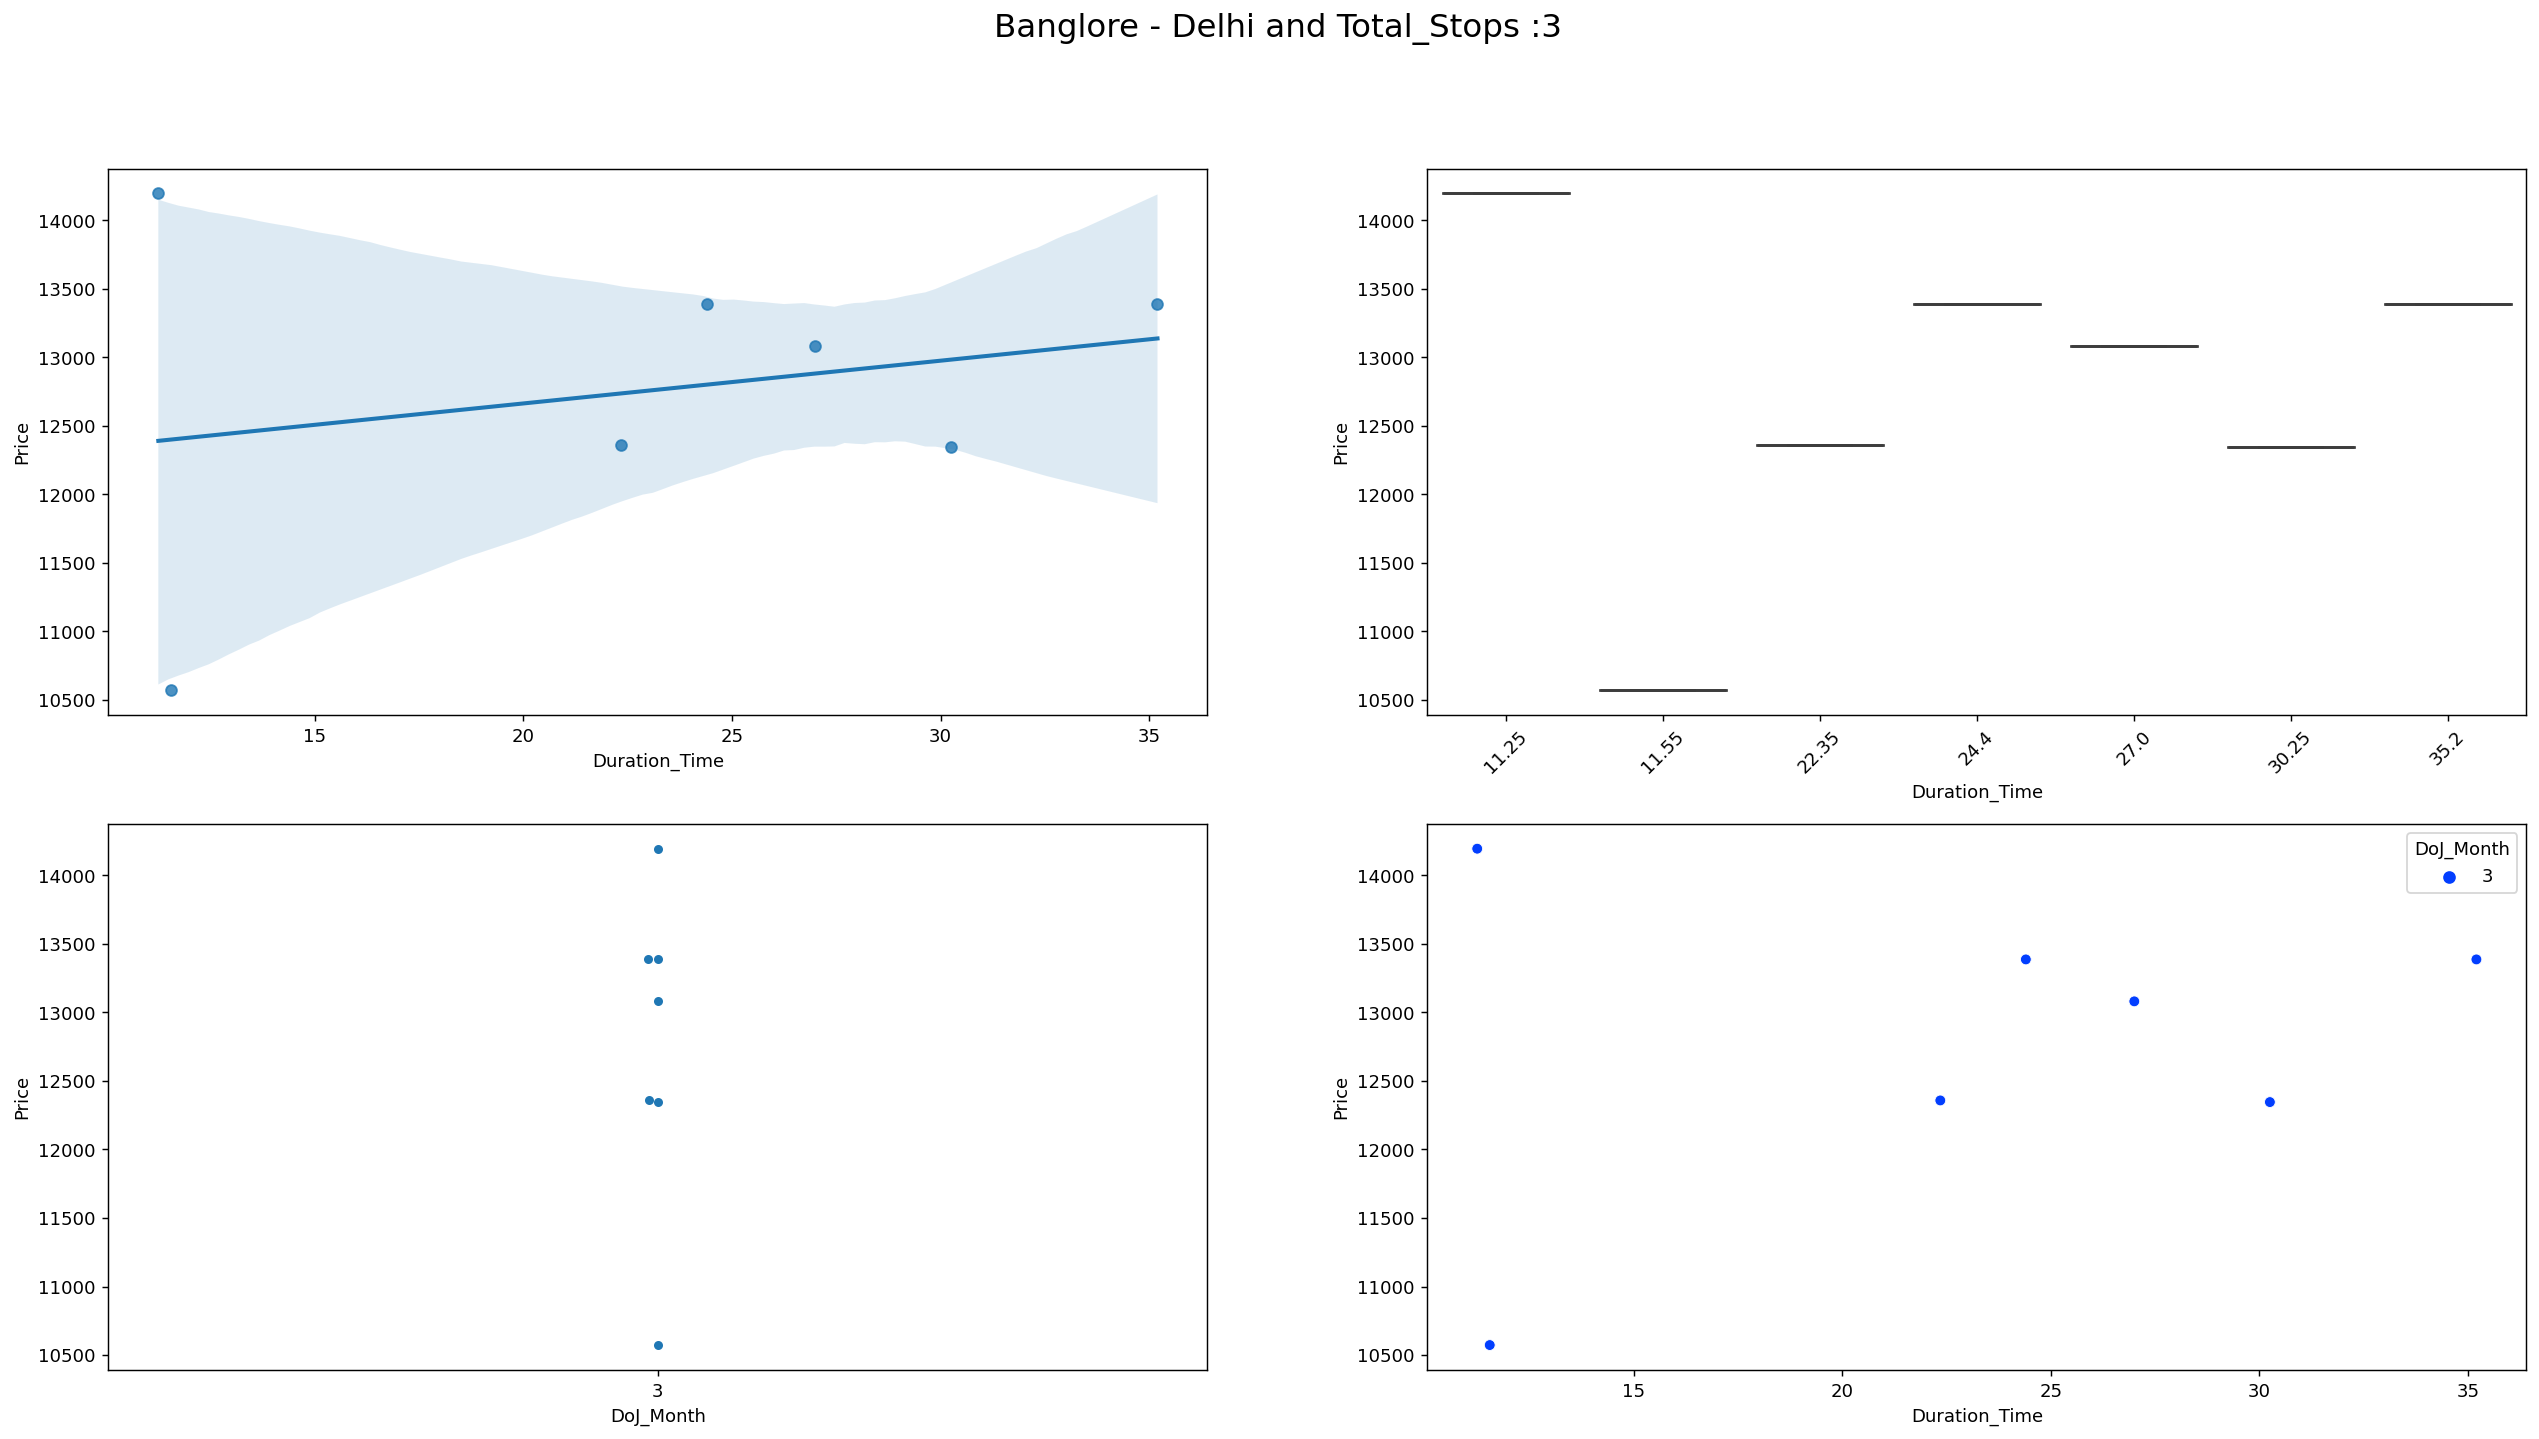

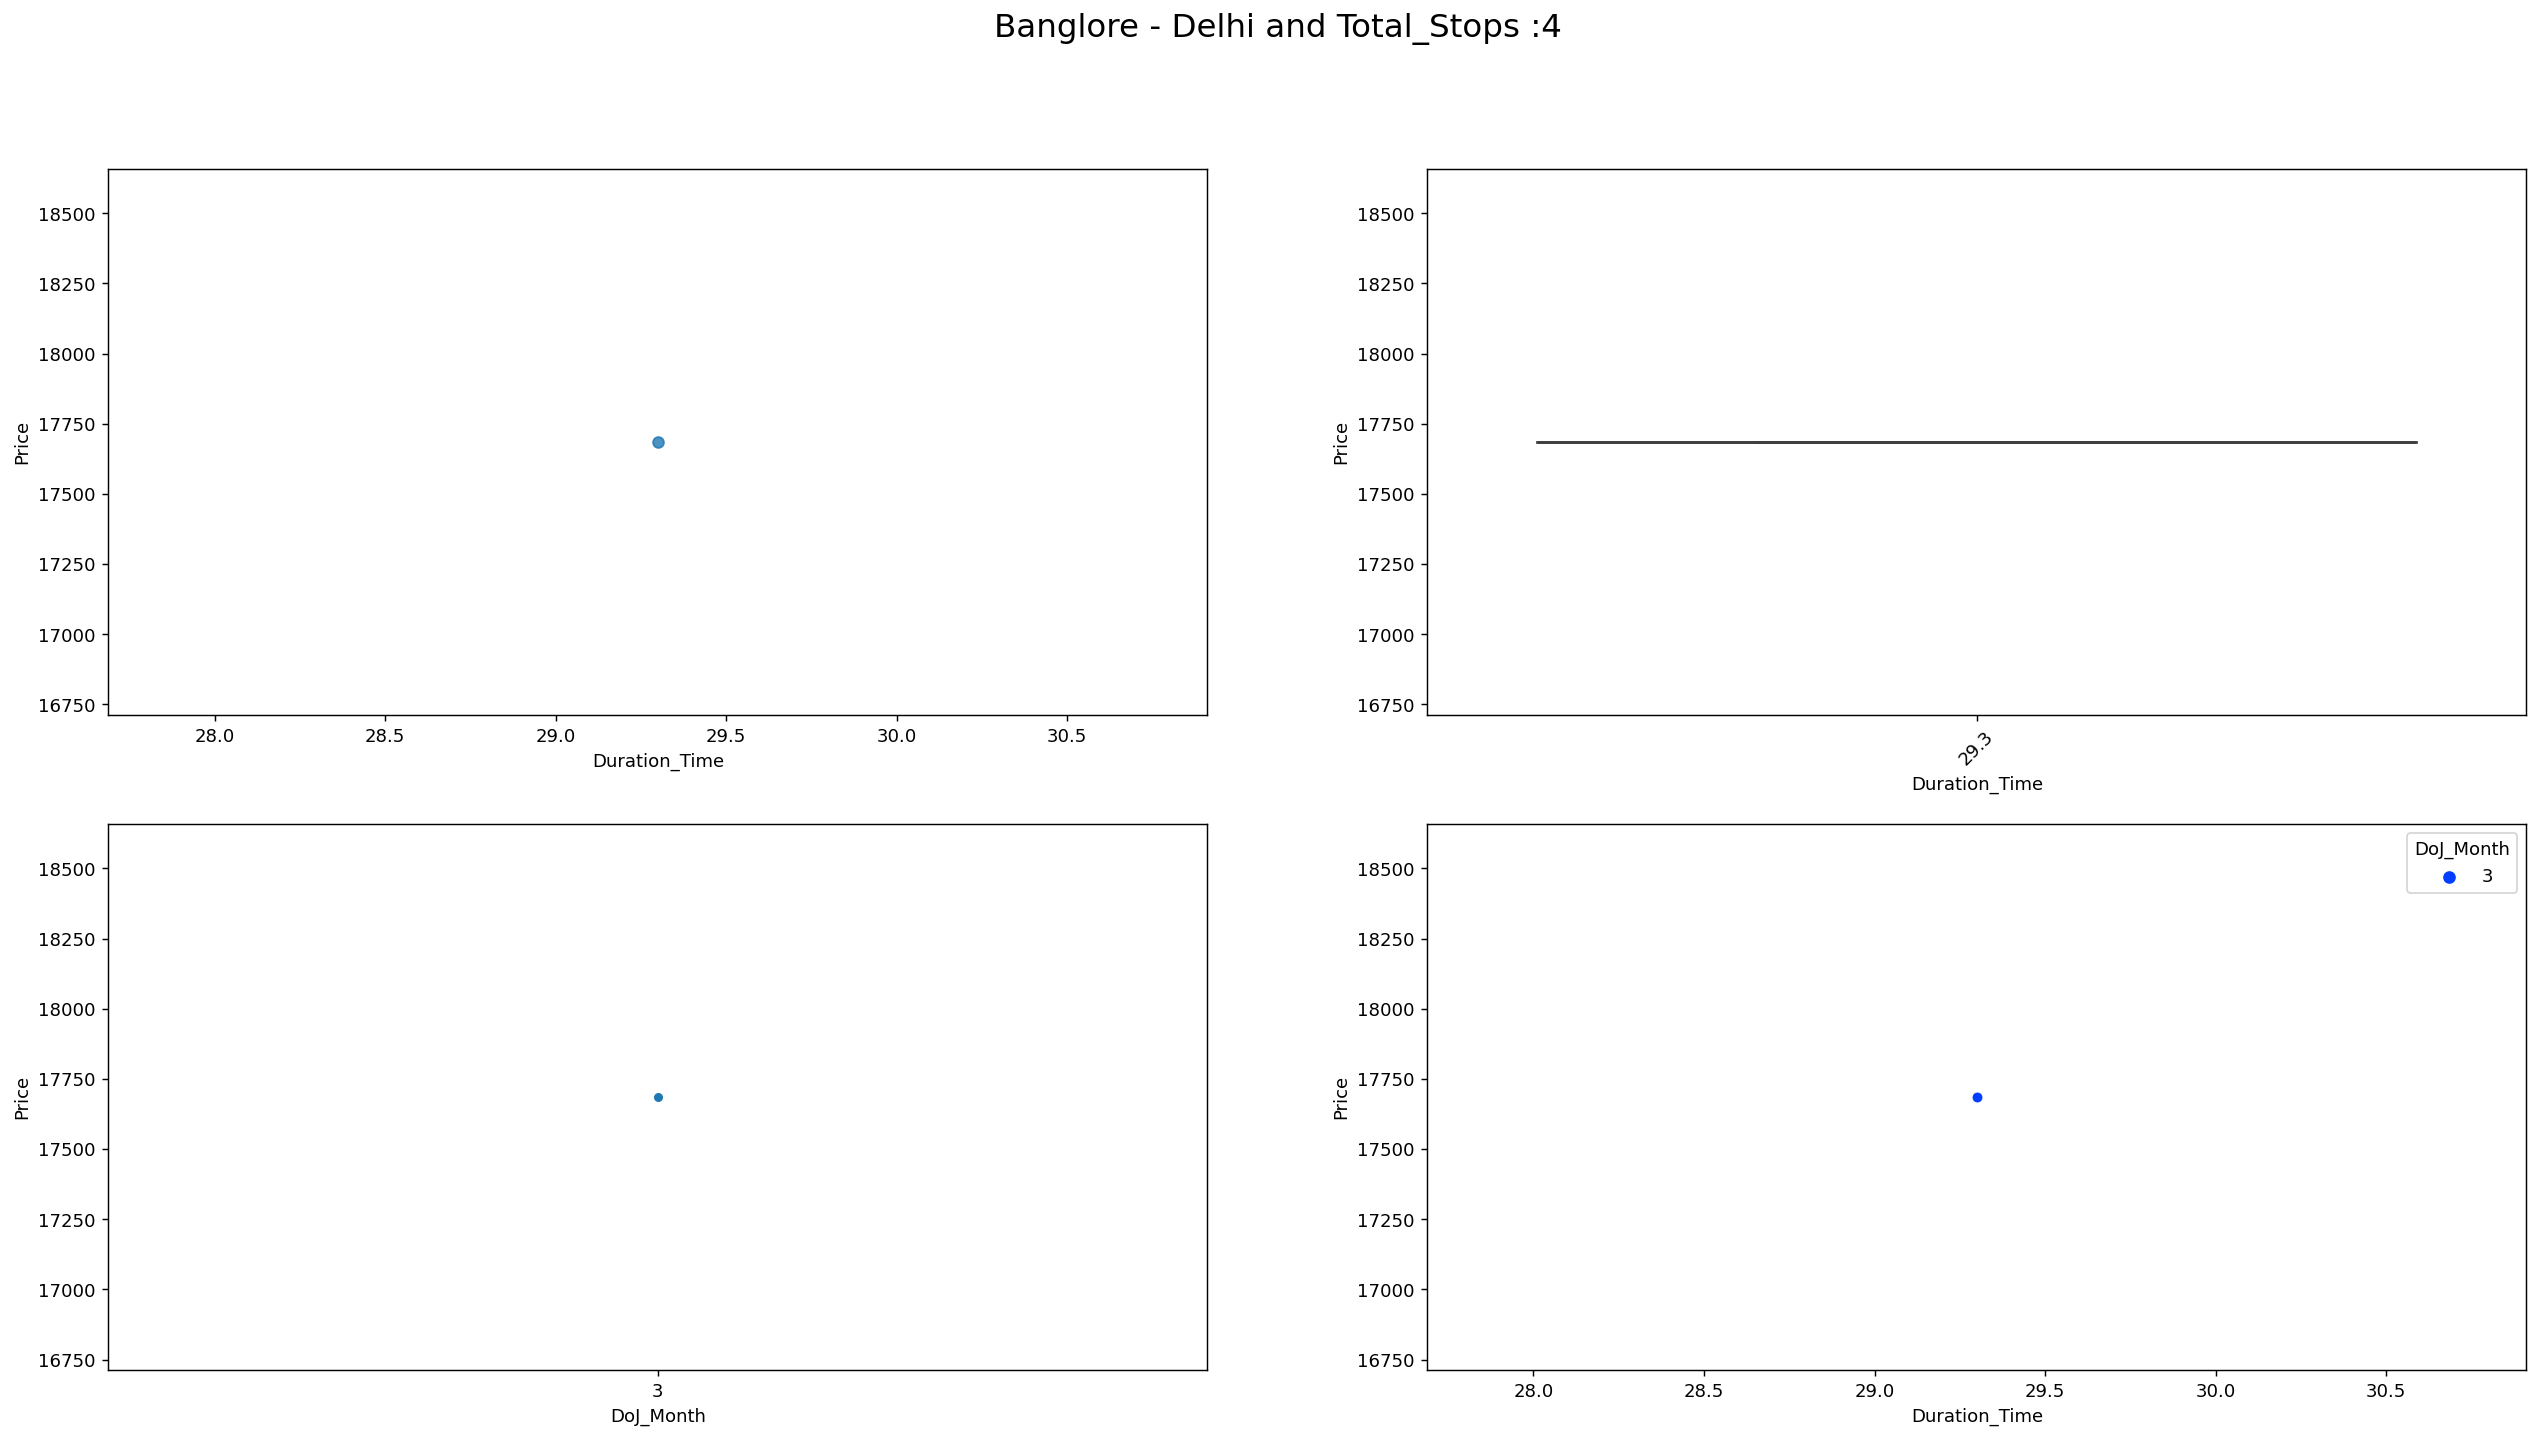

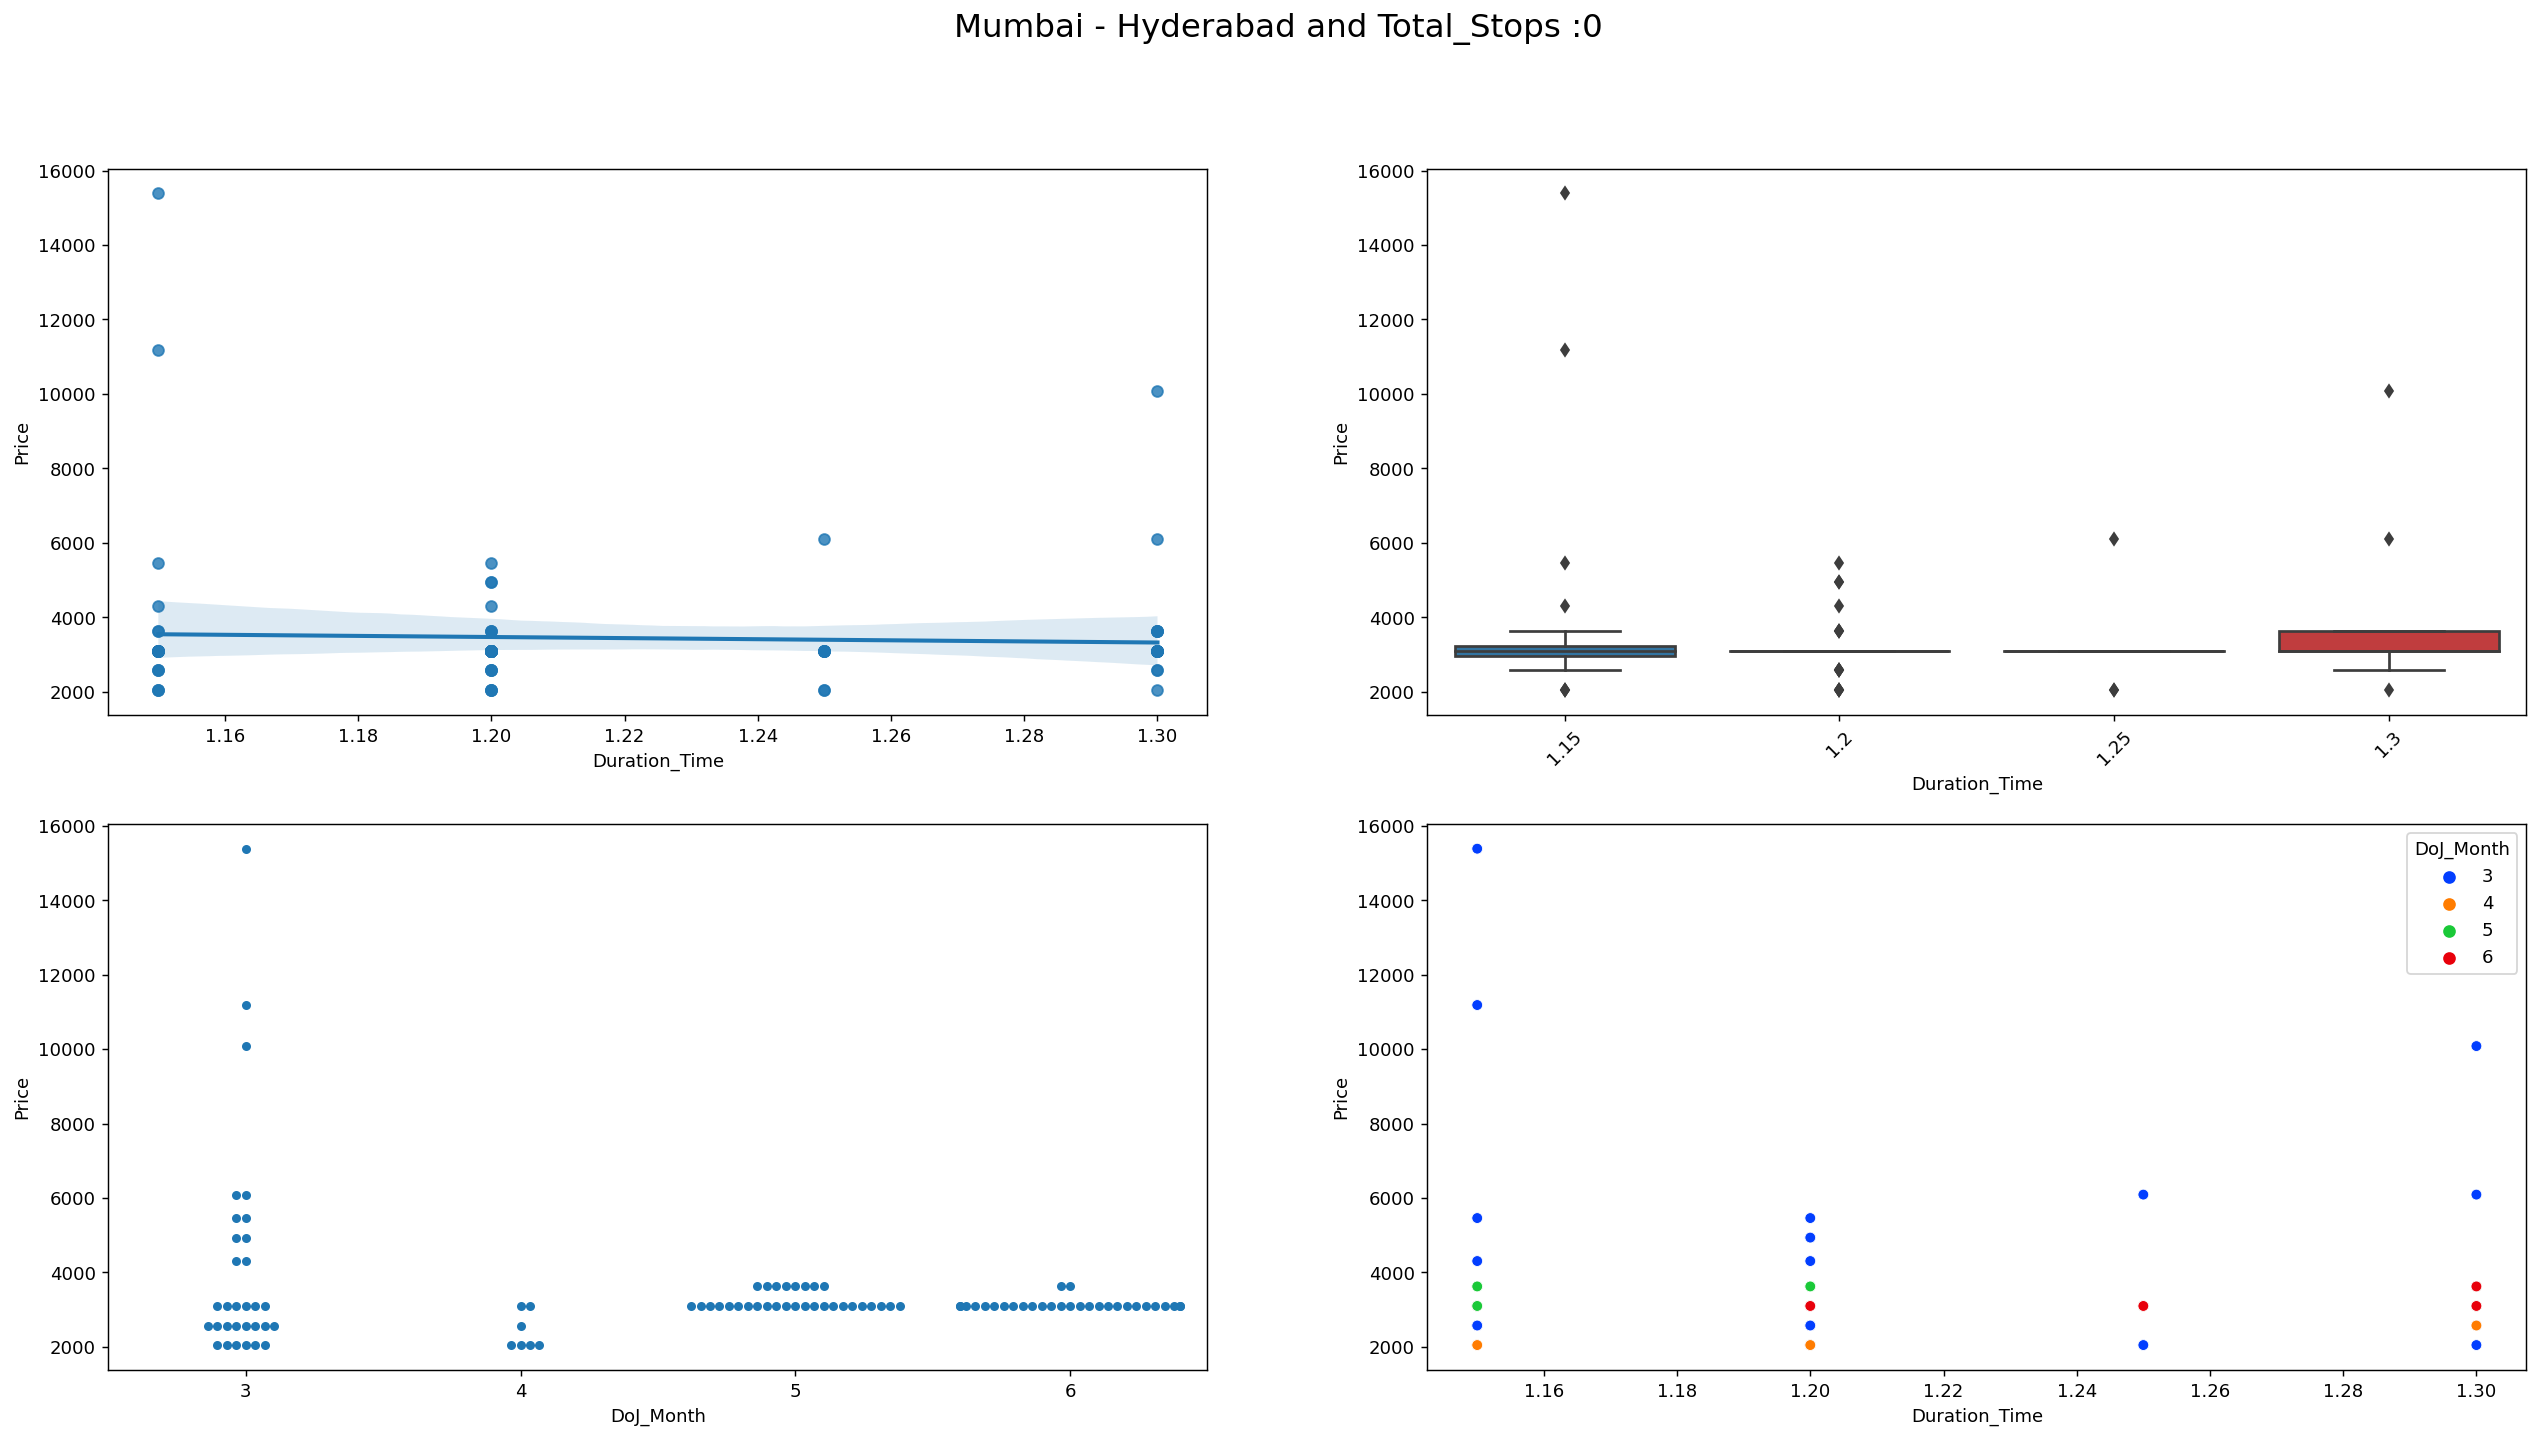

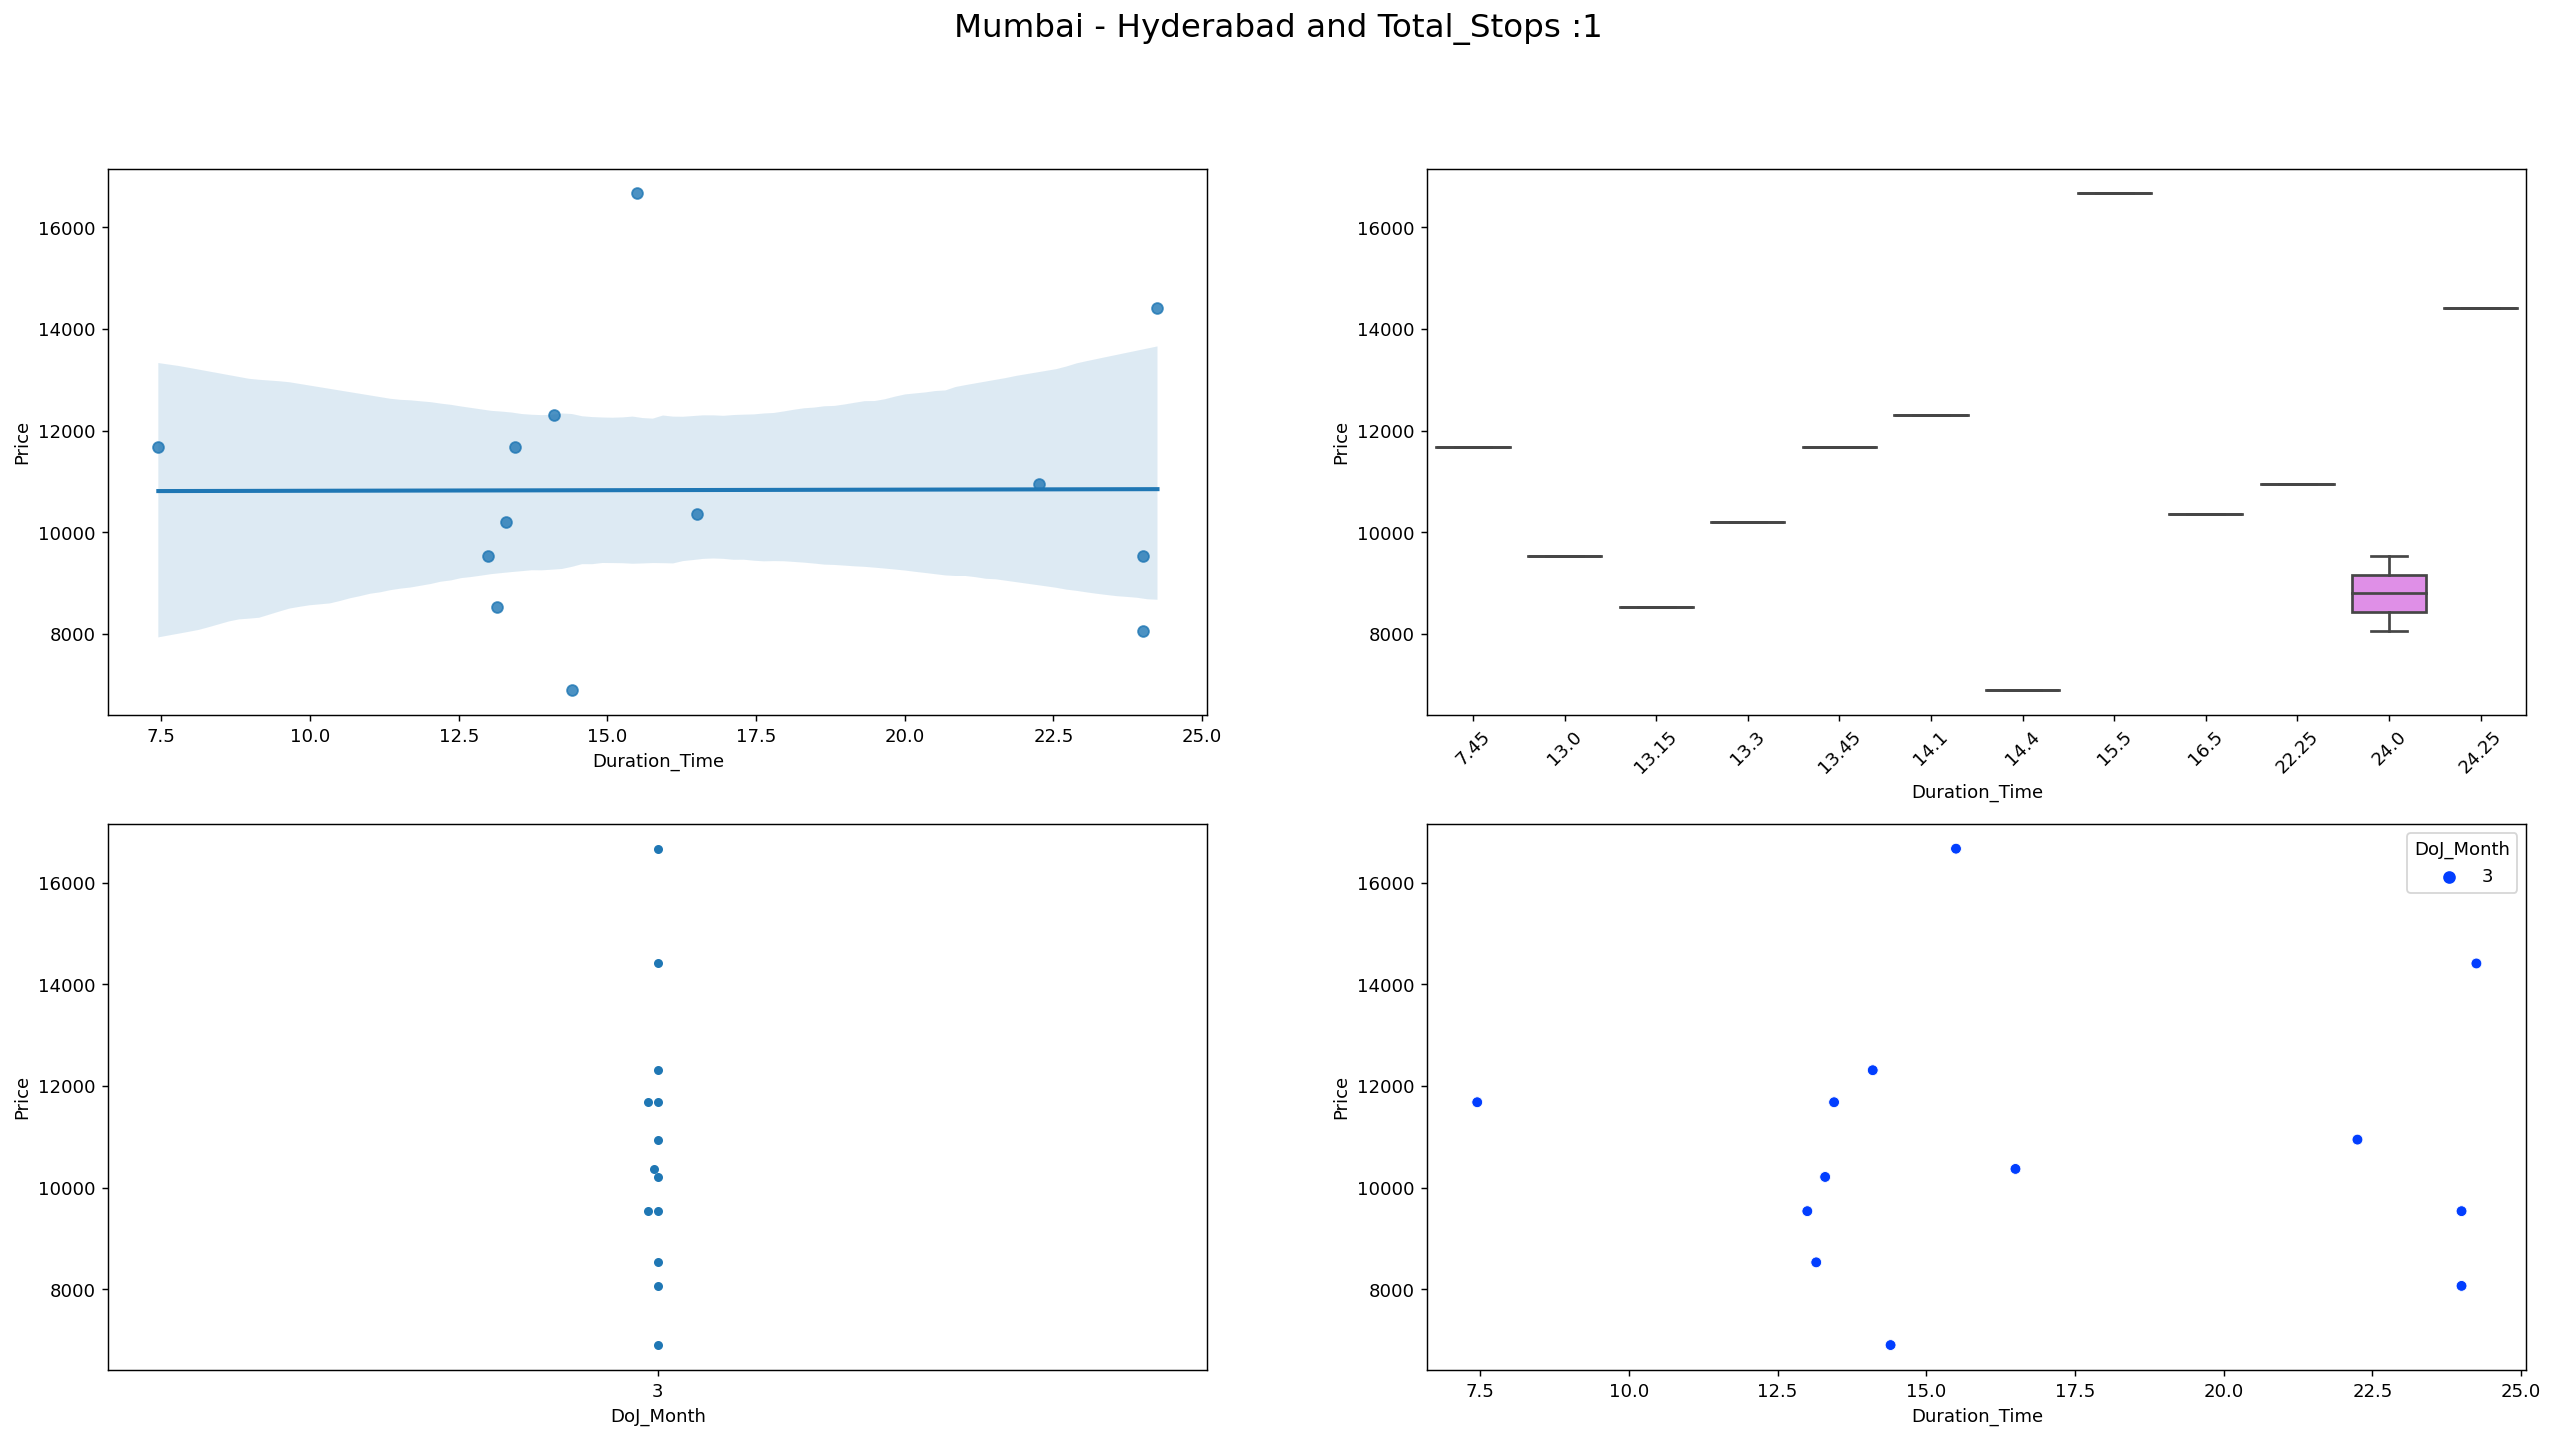

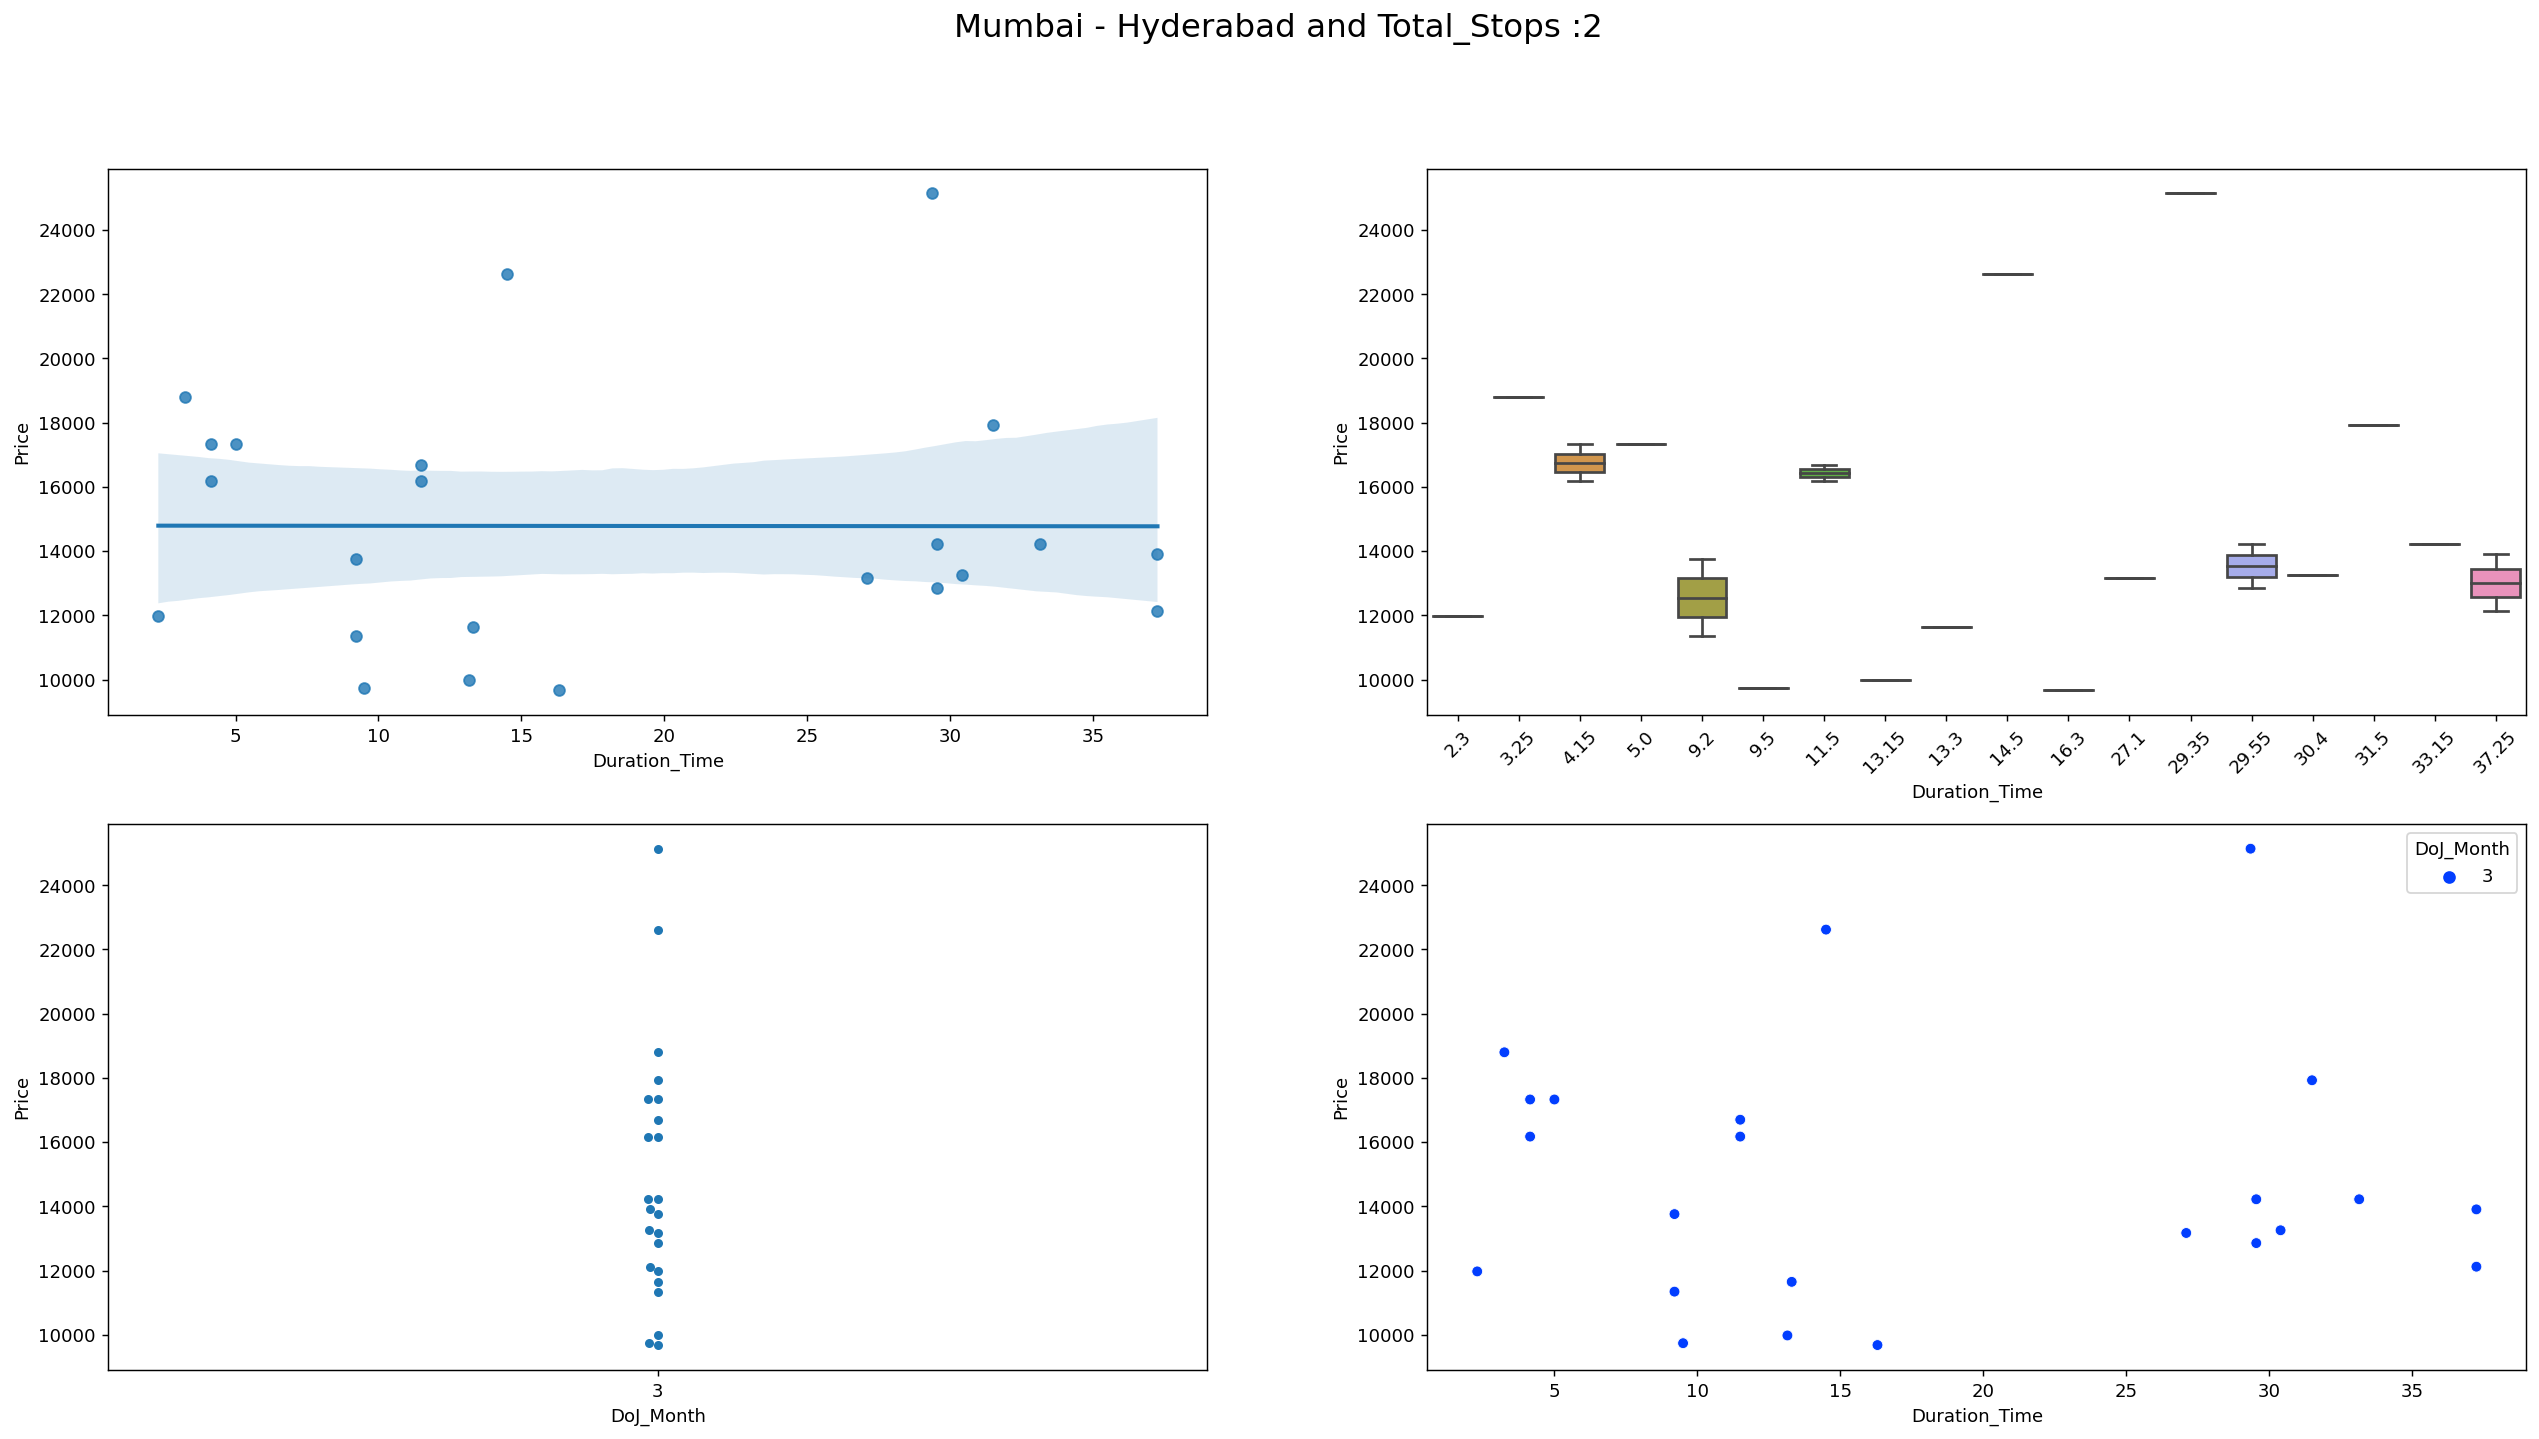

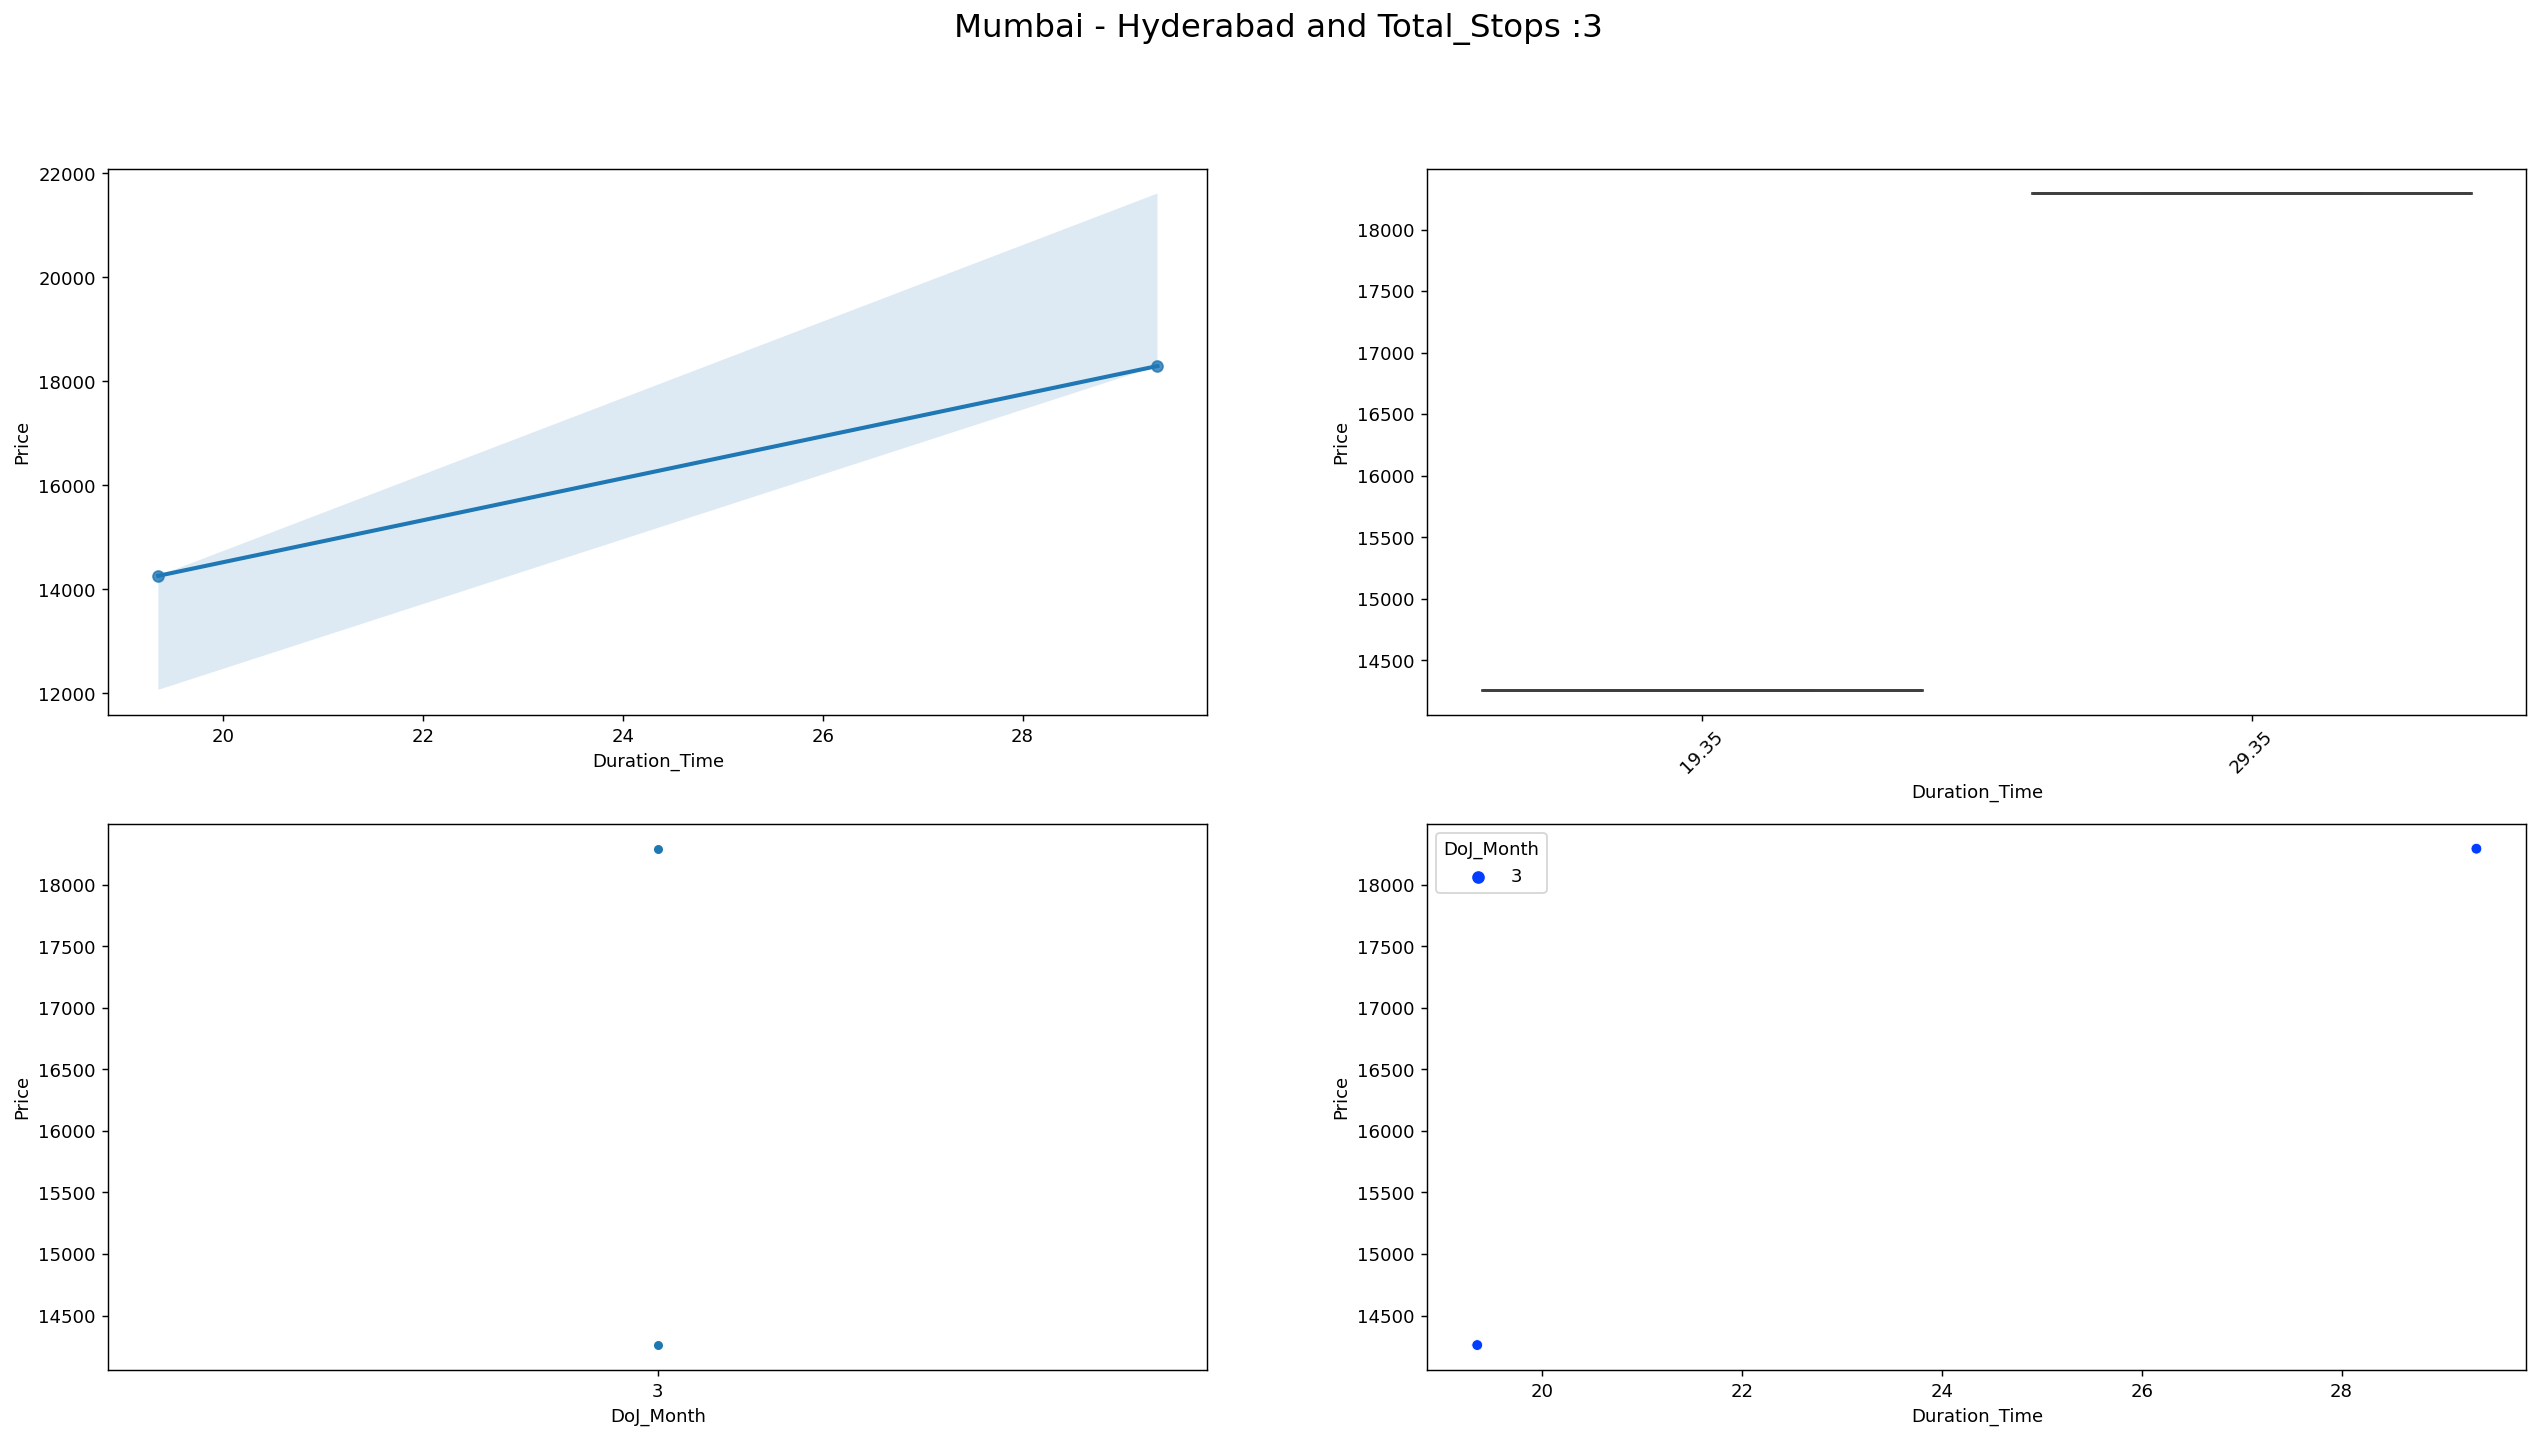

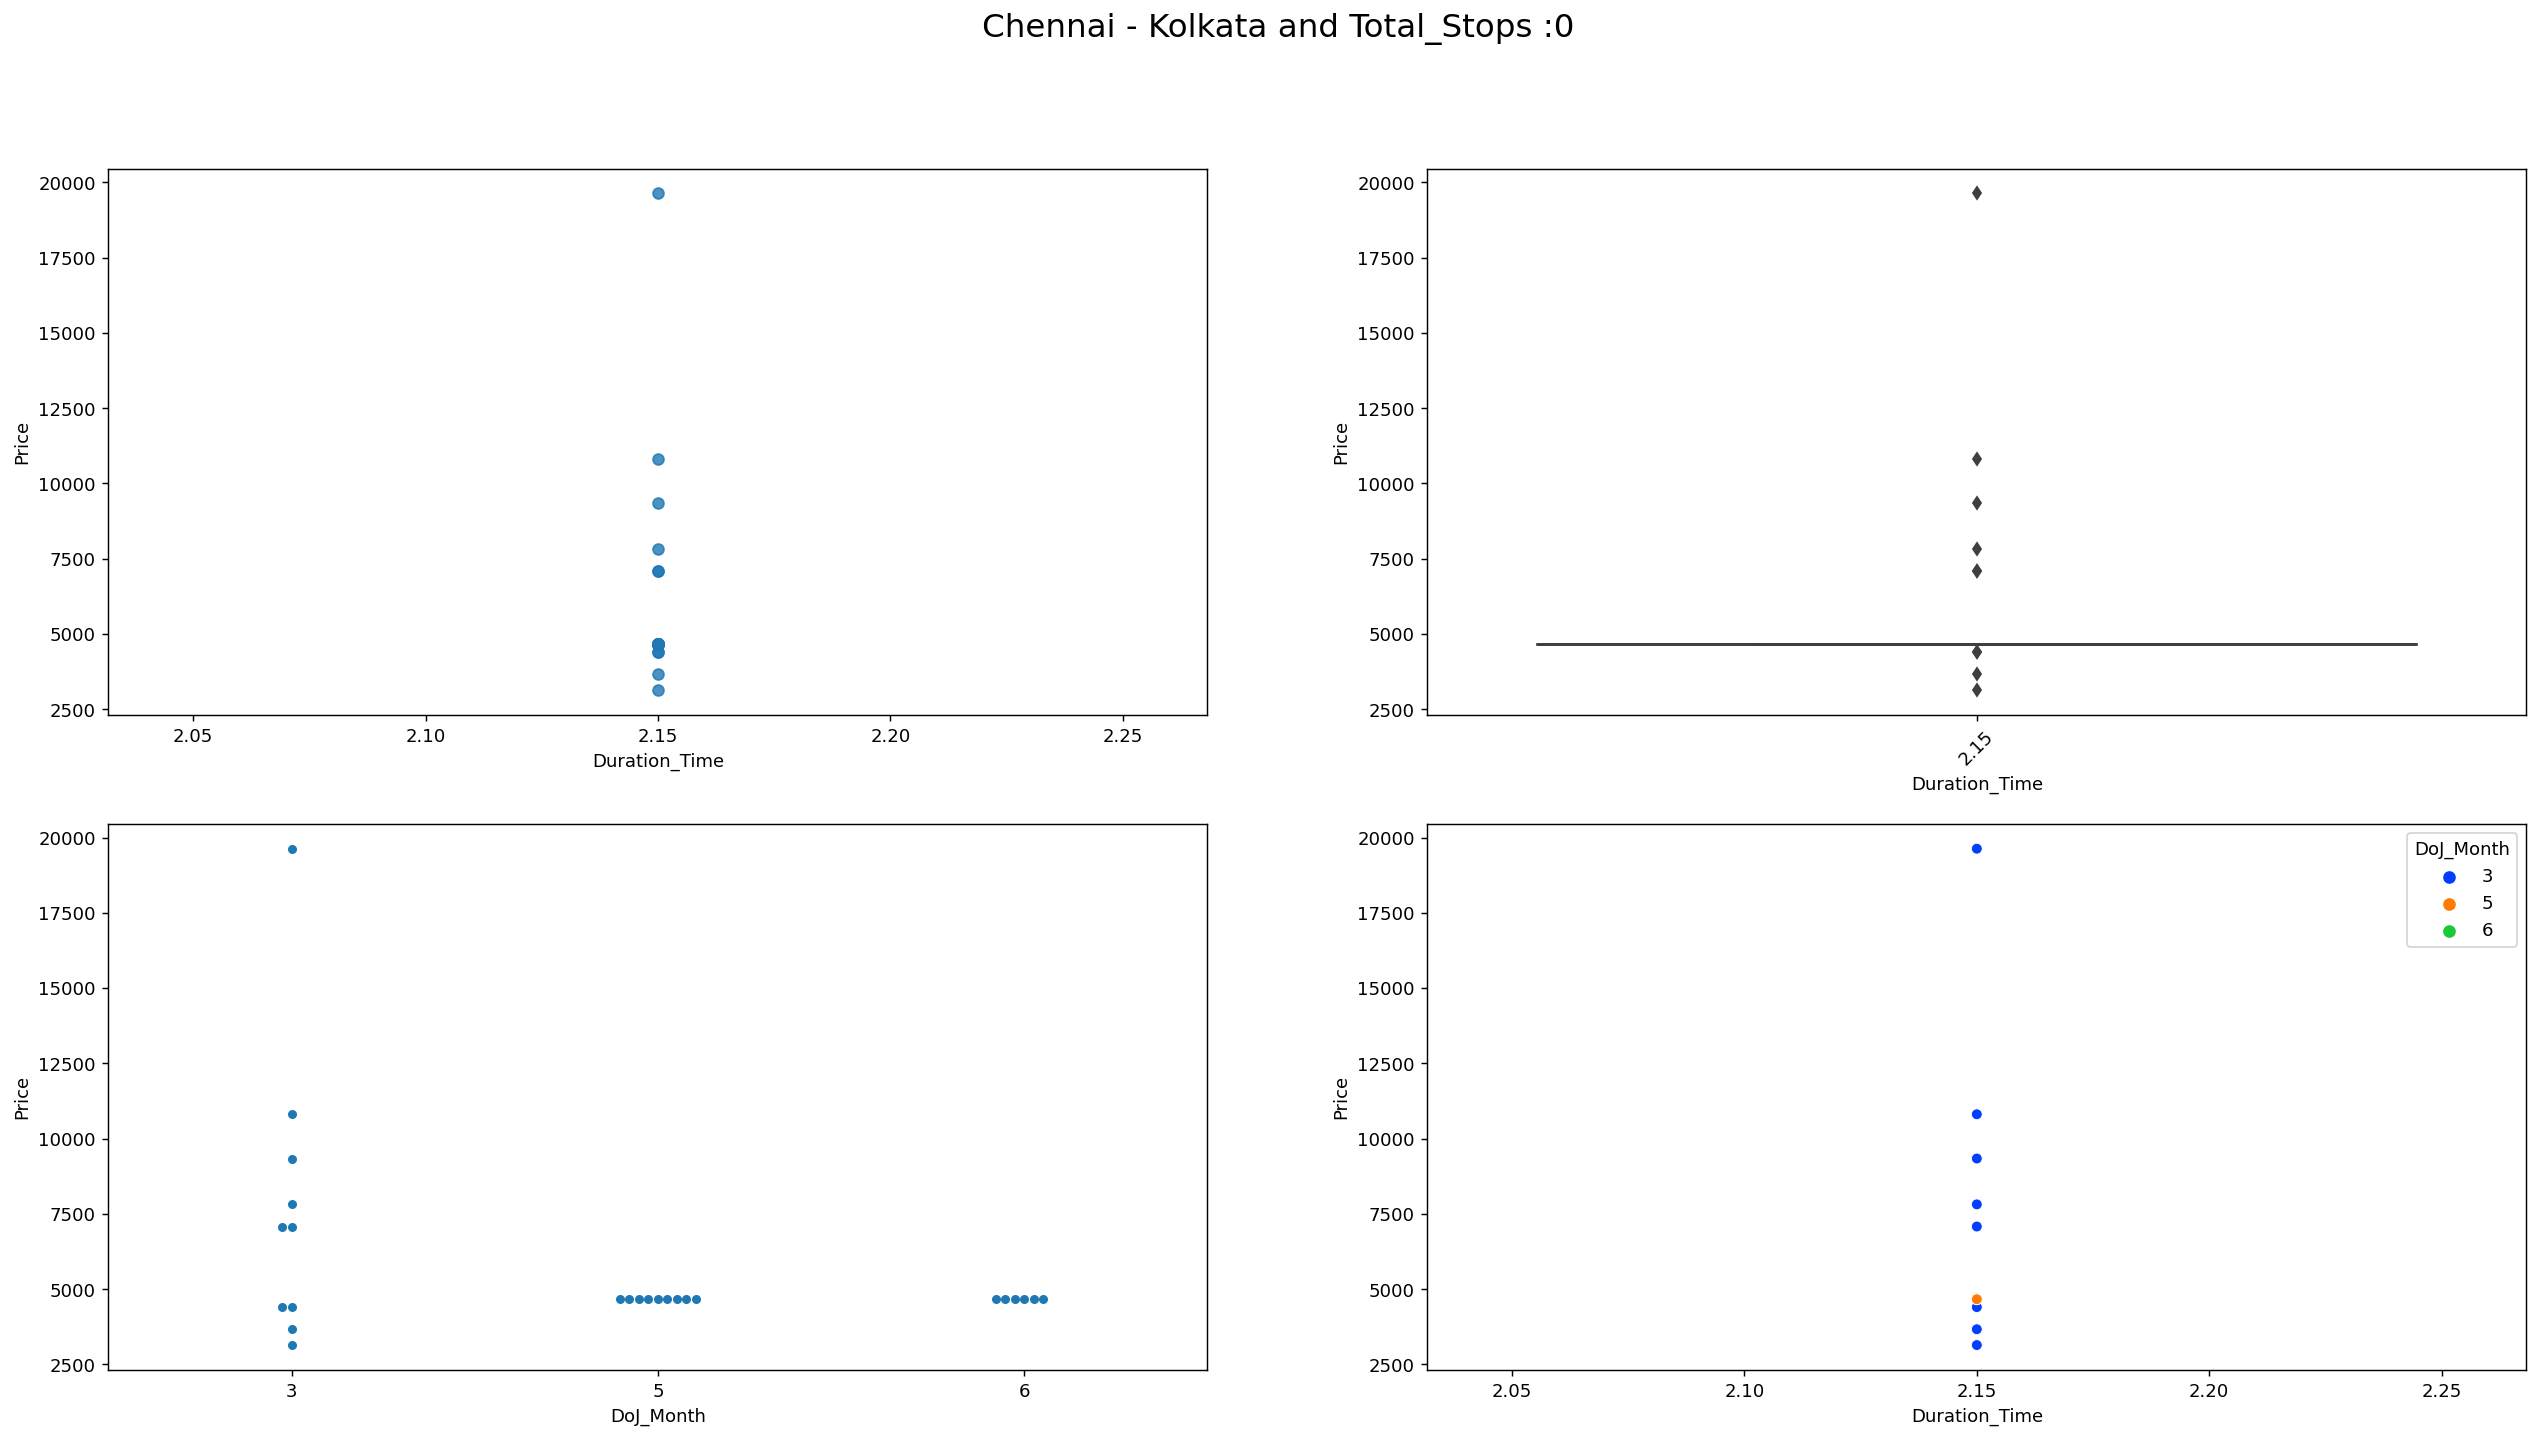

In [224]:
for i in s_d:
    copy = dataset[(dataset['Source'] == i) & (dataset['Destination'] == s_d[i])]
    for j in np.sort(copy['Total_Stops'].unique()):
        k = copy[(copy['Total_Stops'] == j) & (copy['Airline'] == 'Air India')]
        f, a = plt.subplots(2,2, figsize = (24,12), dpi = 130)
        sns.regplot(x = 'Duration_Time', y = 'Price', data = k, ax = a[0,0])
        sns.boxplot(x = 'Duration_Time', y = 'Price', data = k, ax = a[0,1])
        sns.swarmplot(x = 'DoJ_Month', y = 'Price', data = k, ax = a[1,0])
        sns.scatterplot(x = 'Duration_Time', y = 'Price', hue = 'DoJ_Month', data = k, palette = 'bright', ax = a[1,1])
        plt.suptitle(f"{i} - {s_d[i]} and Total_Stops :{j}", fontsize = 18)
        a[0, 1].set_xticklabels(a[0, 1].get_xticklabels(), rotation=45)
        plt.tight_layout
        plt.show()

In [76]:
a = dataset[['Airline', 'Total_Stops']].value_counts()
b = pd.DataFrame(a)
b.reset_index(inplace = True)
b.rename({0:'count'}, axis = 1, inplace = True)

In [77]:
b

Airline  Total_Stops  count
0         Jet Airways            1   2539
1              IndiGo            0   1231
2   Multiple carriers            1   1158
3              IndiGo            1    793
4           Air India            2    702
5            SpiceJet            0    667
6         Jet Airways            0    622
7         Jet Airways            2    545
8           Air India            1    540
9           Air India            0    416
10            Vistara            0    266
11            Vistara            1    215
12           Air Asia            0    181
13           SpiceJet            1    148
14           Air Asia            1    129
15              GoAir            1    102
16              GoAir            0     92
17  Multiple carriers            2     43
18          Air India            3     35
19             IndiGo            2     19
20           Air Asia            2      9
21  Multiple carriers            3      8
22          Air India            4      1
23             Trujet            1      1

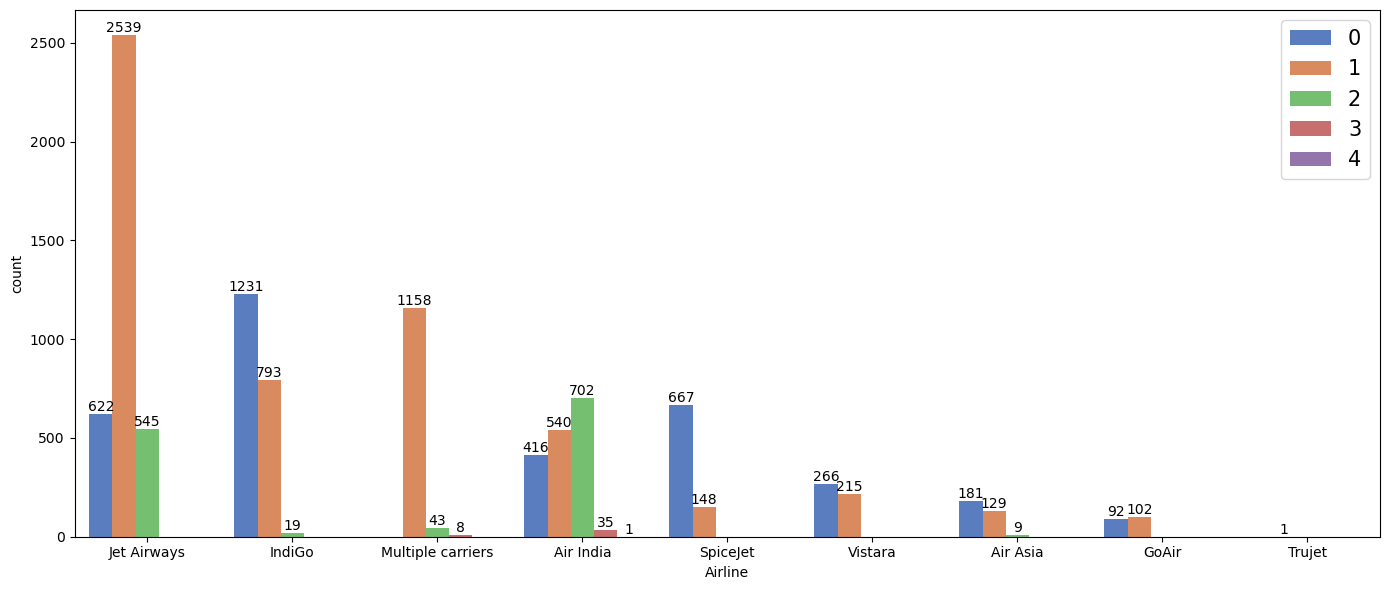

In [78]:
plt.figure(figsize = (14,6))
a = sns.barplot(x = 'Airline', y = 'count', hue = 'Total_Stops', palette = 'muted', data = b)
for i in a.containers:
    a.bar_label(i)
plt.legend(loc = 'upper right', fontsize = 15)
plt.tight_layout()
plt.show()

* The percentage of non-stop flights in IndiGo and SpiceJet are high.
* The percentage of one-stop flights in Jet Airways is notably high.
* In AirInida flights two-stops are high.
* 3-stops are available in lesser number of flights which are in AirIndia, Multi carriers.
* 4-stops are available only in one flight which is AirIndia with only 1trip. 

In [79]:
dataset['DoJ_Year'].unique()

array([2019])

In [80]:
dataset['DoJ_Month'].unique()

array([3, 5, 6, 4])

### This dataset contains the data of trips by different types of flights in 2019 in the months of march, april,may,june across various routes in India.

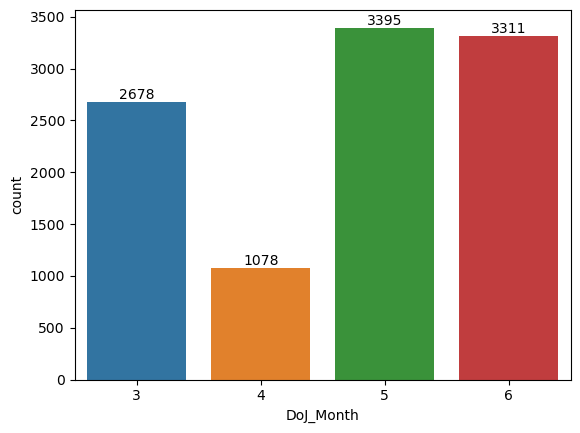

In [81]:
a = sns.countplot(x = dataset['DoJ_Month'])
for i in a.containers:
    a.bar_label(i)
plt.show()

* April month is having the lowest trips.
* Nearly May and June months are having highest trips

In [82]:
a = dataset[['Airline', 'DoJ_Month']].value_counts()
b = pd.DataFrame(a)
b.reset_index(inplace = True)
b.rename({0:'count'}, axis = 1, inplace = True)

In [83]:
b

Airline  DoJ_Month  count
0         Jet Airways          5   1337
1         Jet Airways          6   1214
2         Jet Airways          3    885
3              IndiGo          6    611
4           Air India          5    563
5              IndiGo          5    562
6              IndiGo          3    557
7           Air India          3    516
8   Multiple carriers          6    504
9           Air India          6    468
10  Multiple carriers          5    363
11  Multiple carriers          3    326
12             IndiGo          4    313
13        Jet Airways          4    270
14           SpiceJet          5    247
15           SpiceJet          6    236
16           SpiceJet          3    176
17            Vistara          5    169
18           SpiceJet          4    156
19          Air India          4    147
20            Vistara          6    121
21            Vistara          3    117
22           Air Asia          5    104
23           Air Asia          6     97
24            Vistara          4     74
25              GoAir          6     60
26           Air Asia          3     60
27           Air Asia          4     58
28              GoAir          5     50
29              GoAir          4     44
30              GoAir          3     40
31  Multiple carriers          4     16
32             Trujet          3      1

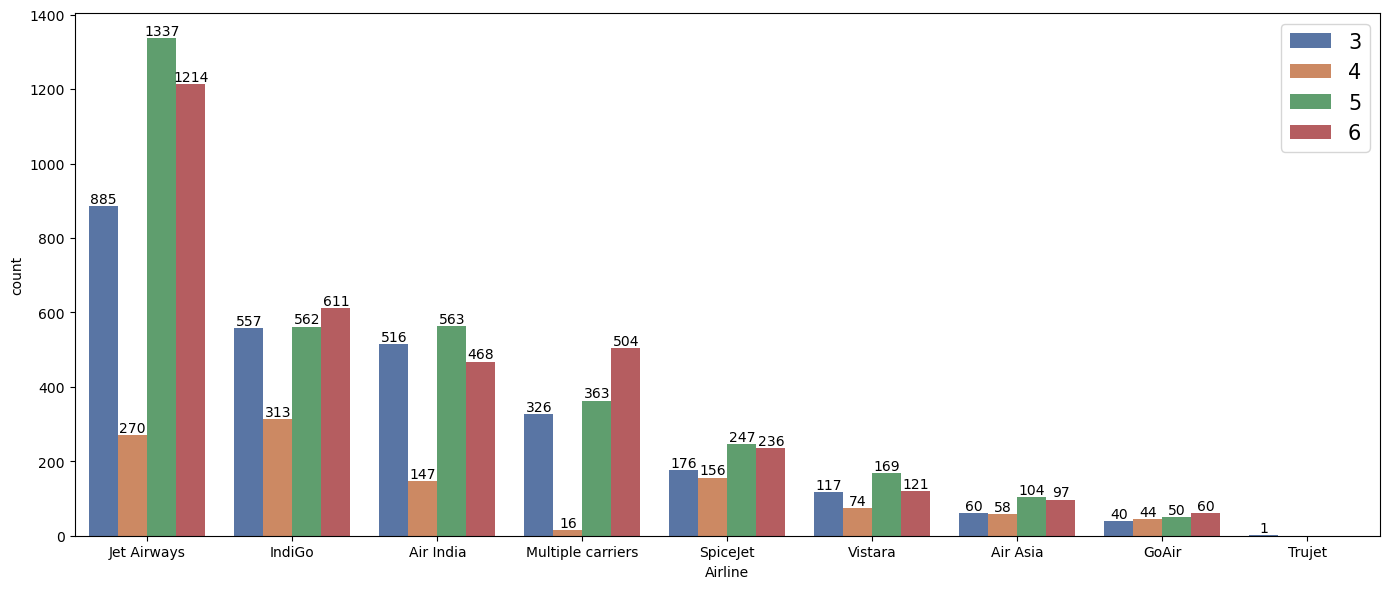

In [84]:
plt.figure(figsize = (14,6))
a = sns.barplot(x = 'Airline', y = 'count', hue = 'DoJ_Month', palette = 'deep', data = b)
for i in a.containers:
    a.bar_label(i)
plt.legend(loc = 'upper right', fontsize = 15)
plt.tight_layout()
plt.show()

In [86]:
dataset['DoJ_Month'].unique()

array([3, 5, 6, 4])

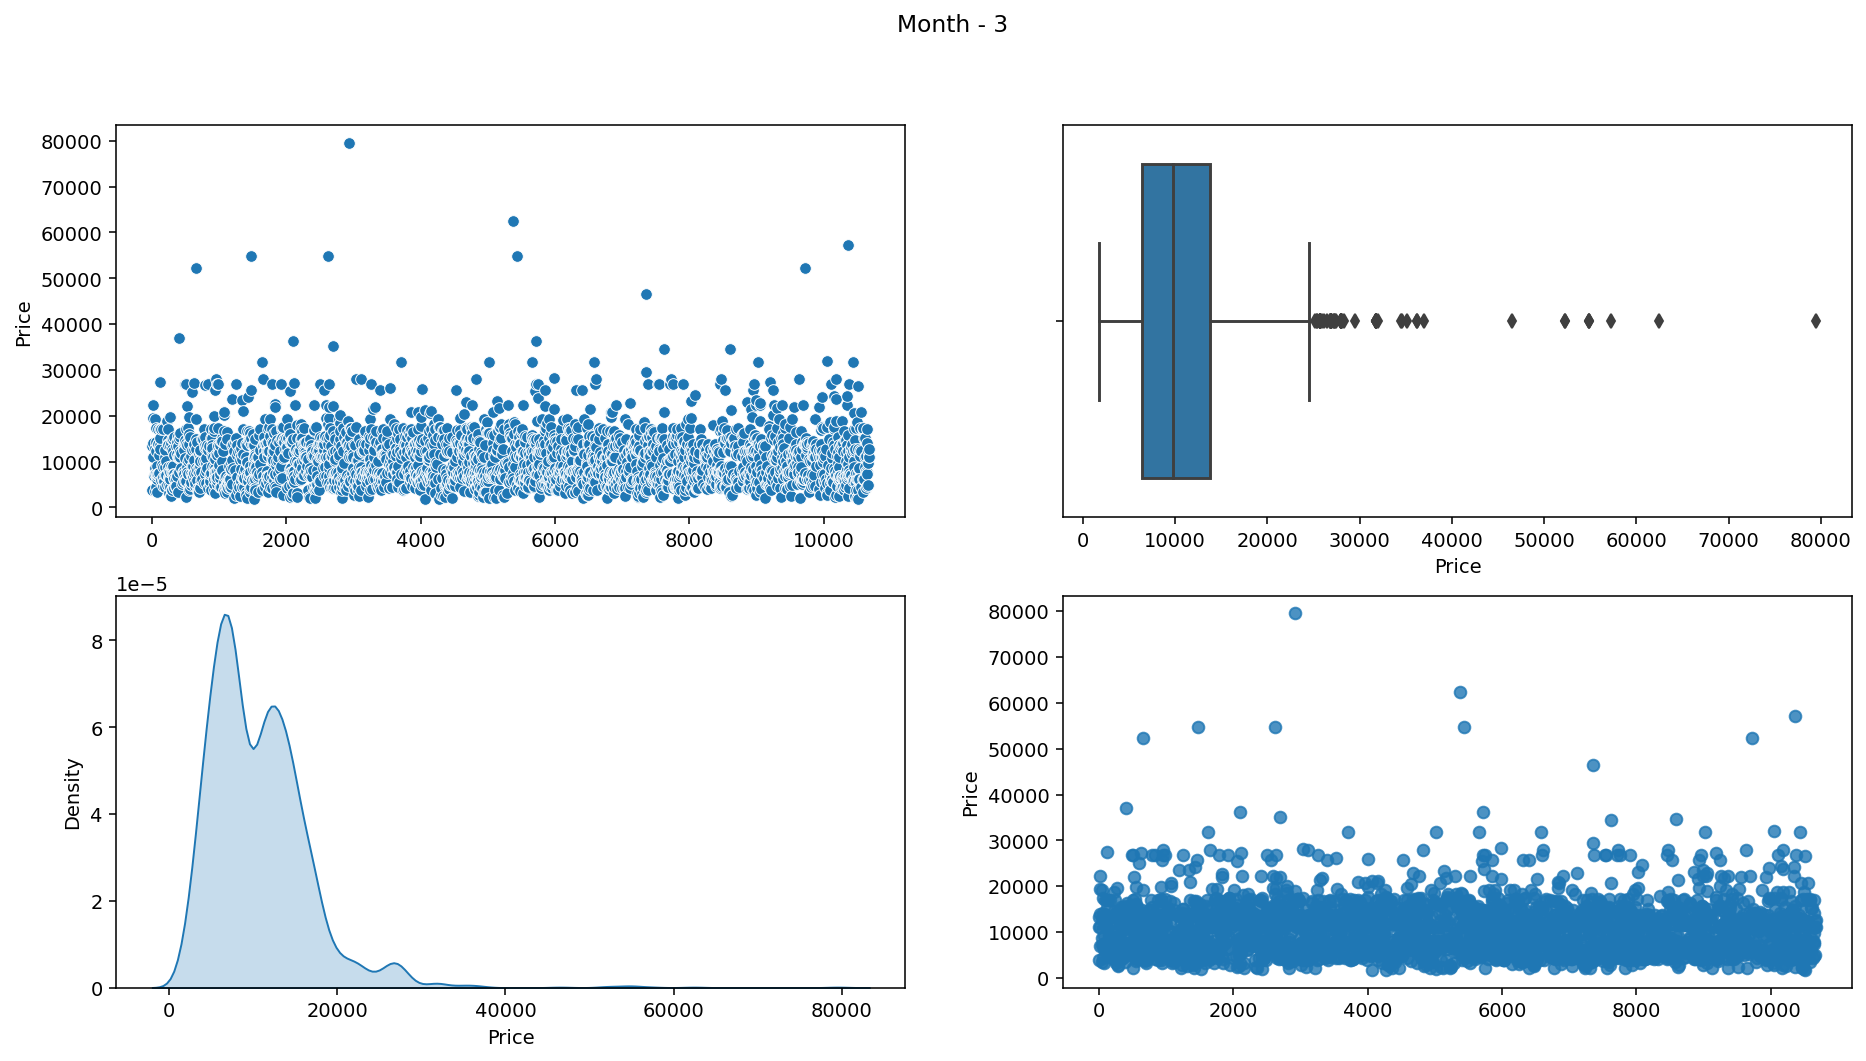

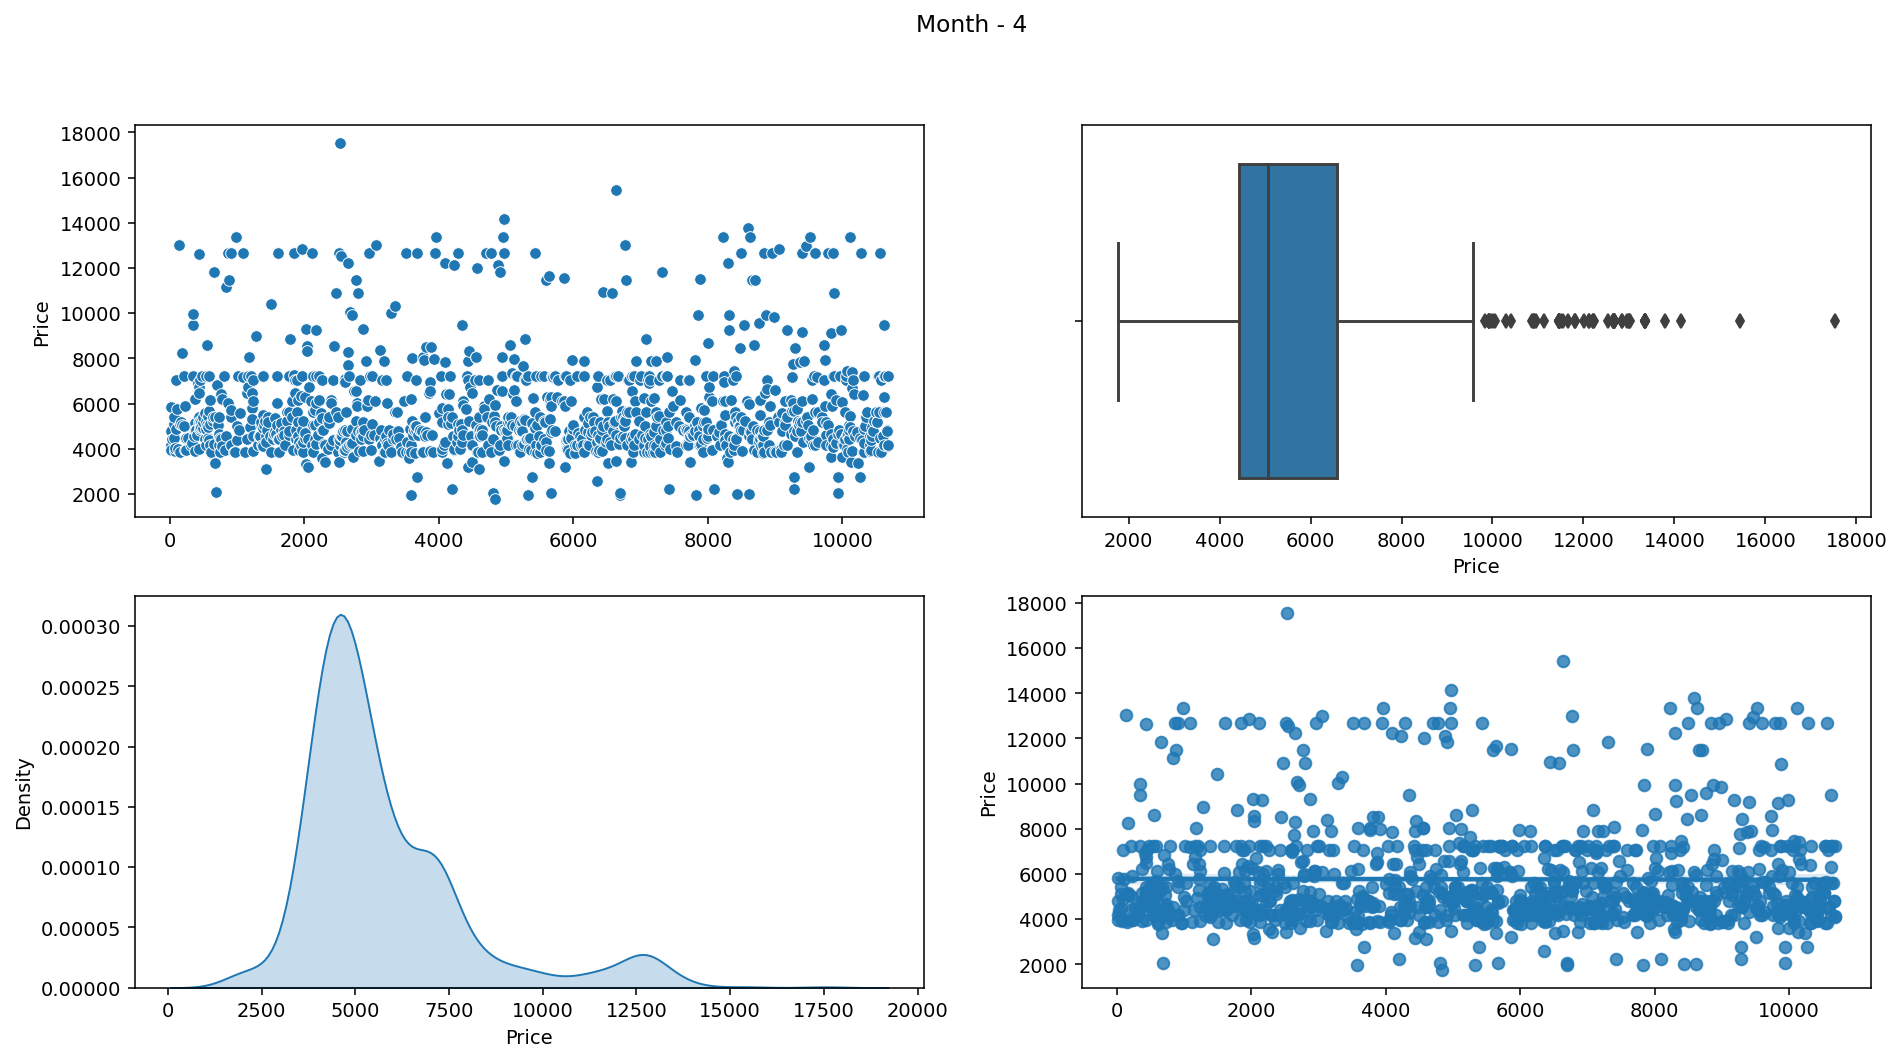

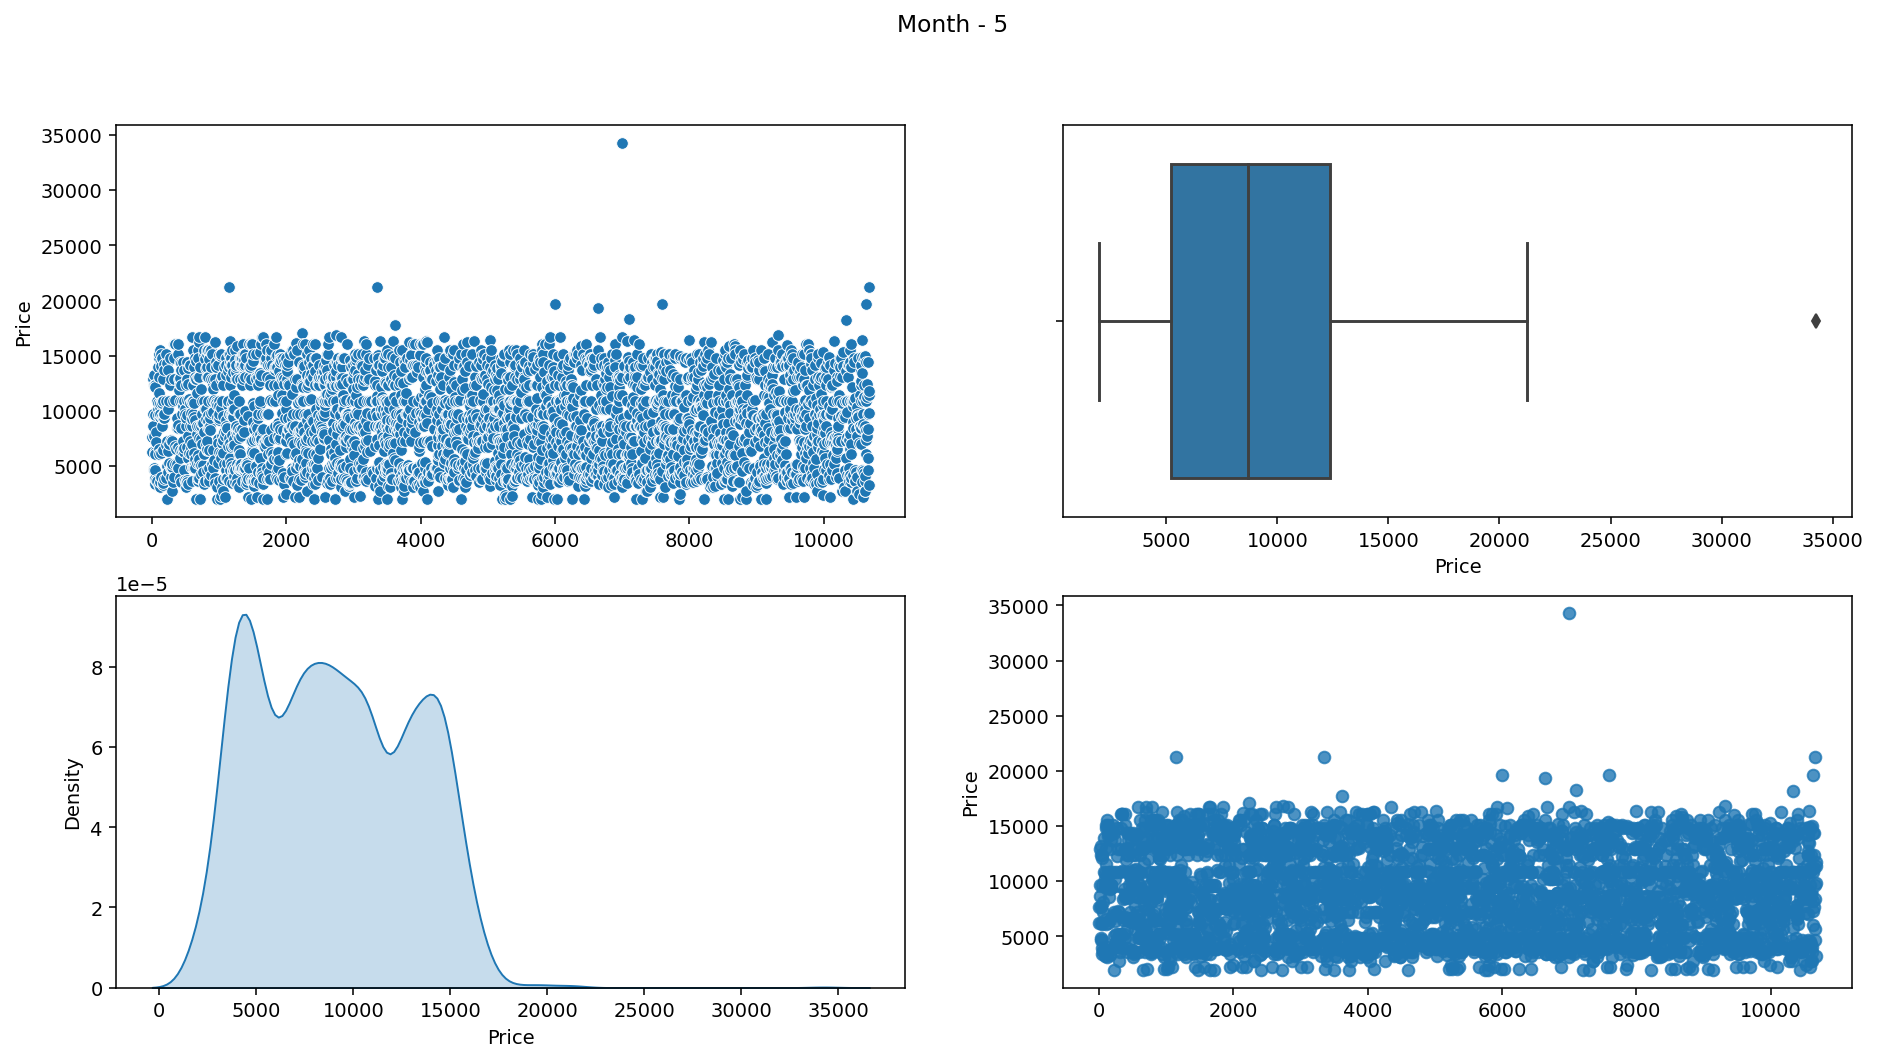

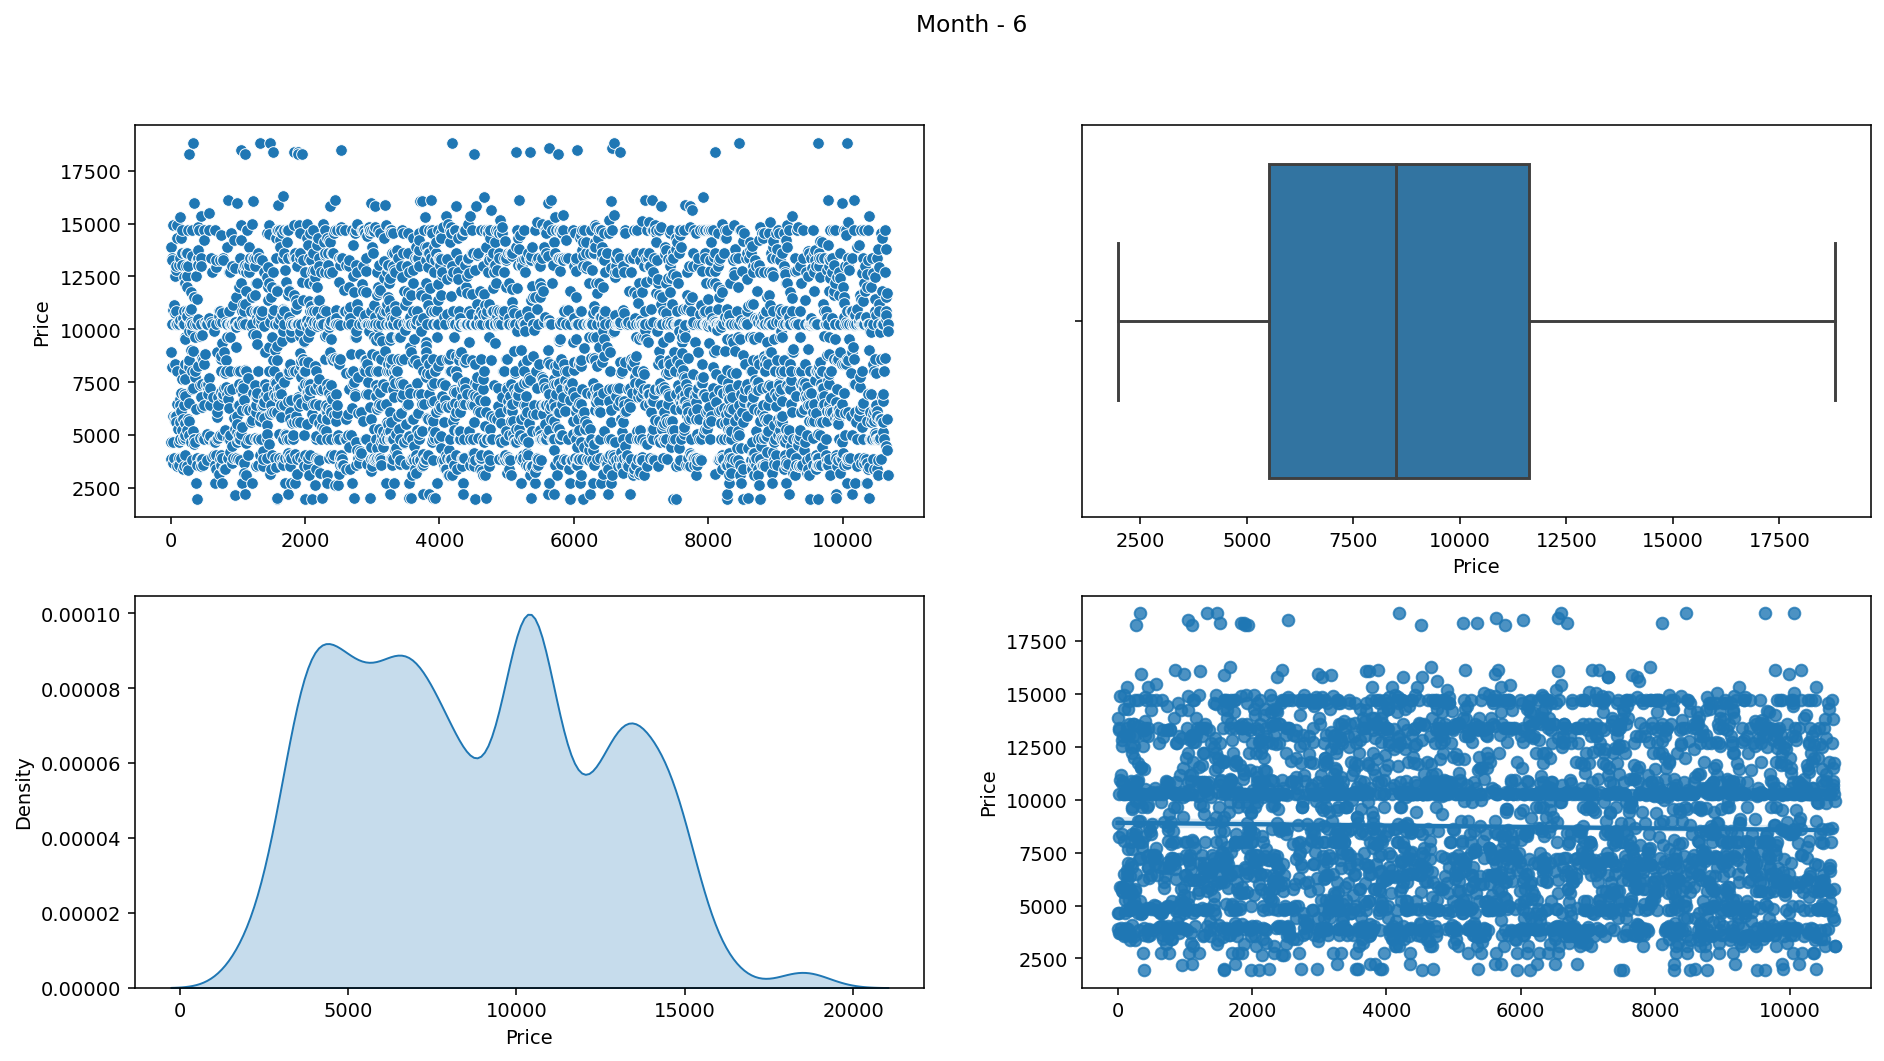

In [87]:
for i in np.sort(dataset['DoJ_Month'].unique()):
    k = dataset[dataset['DoJ_Month'] == i][['Price']]
    f, a = plt.subplots(2,2, figsize = (16,8), dpi = 140)
    sns.scatterplot(k['Price'], ax = a[0,0])
    sns.boxplot(x = k['Price'], ax = a[0,1])
    sns.kdeplot(k['Price'], shade = True, ax = a[1,0])
    sns.regplot(y = k['Price'], x = k['Price'].index,ax = a[1,1])
    plt.suptitle(f"Month - {i} ")
    plt.show()

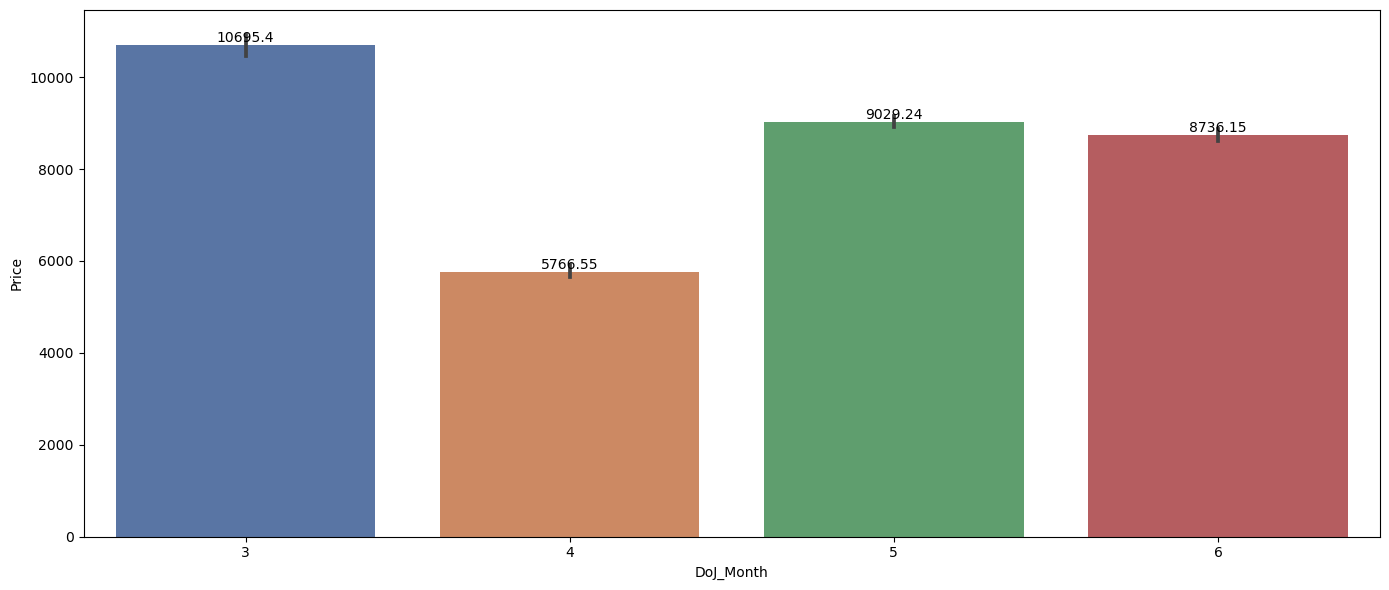

In [88]:
plt.figure(figsize = (14,6))
a = sns.barplot(x = 'DoJ_Month', y ='Price' , palette = 'deep', data = dataset)
for i in a.containers:
    a.bar_label(i)
plt.tight_layout()
plt.show()

In [218]:
a = dataset[['Source', 'Total_Stops']].value_counts()
b = pd.DataFrame(a)
b.reset_index(inplace = True)
b.rename({0:'count'}, axis = 1, inplace = True)

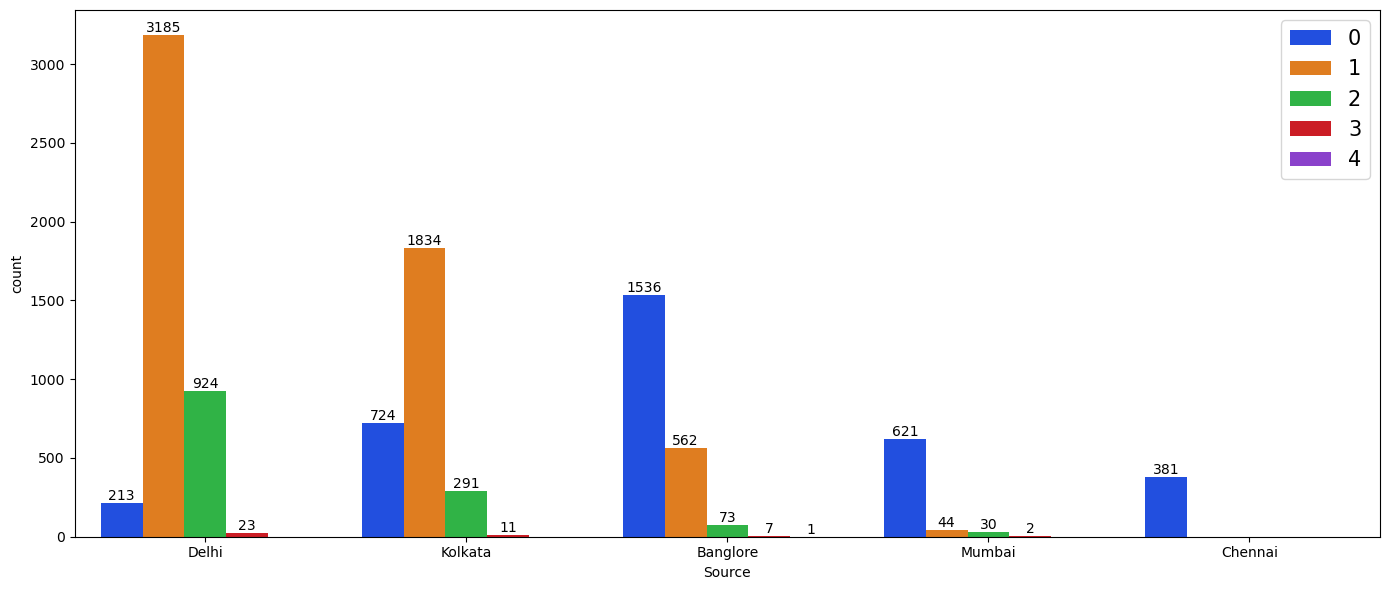

In [222]:
plt.figure(figsize = (14,6))
a = sns.barplot(x = 'Source', y = 'count', hue = 'Total_Stops', palette = 'bright', data = b)
for i in a.containers:
    a.bar_label(i)
plt.legend(loc = 'upper right', fontsize = 15)
plt.tight_layout()
plt.show()

### Analysis for just for knowing the  feature which affects the ticket price

In [291]:
dataset.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore       Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore       Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time  Total_Stops  Price  DoJ_Date  DoJ_Month  DoJ_Year  \
0  01:10 22 Mar            0   3897        24          3      2019   
1         13:15            2   7662         1          5      2019   
2  04:25 10 Jun            2  13882         9          6      2019   
3         23:30            1   6218        12          5      2019   
4         21:35            1  13302         1          3      2019   

   Duration_Hours  Duration_Mins  Duration_Time  
0               2             50           2.50  
1               7             25           7.25  
2              19              0          19.00  
3               5             25           5.25  
4               4             45           4.45

In [300]:
z = dataset[(dataset['Source'] == 'Banglore') & (dataset['Total_Stops'] == 2) & (dataset['Airline'] == 'Air India')]

### Banglore - Delhi total_stops as 2 only for Airplane as Air India and in 3rd month

In [301]:
z

Airline    Source Destination                  Route Dep_Time  \
56     Air India  Banglore       Delhi  BLR → BOM → AMD → DEL    08:50   
289    Air India  Banglore       Delhi  BLR → BOM → JDH → DEL    17:25   
489    Air India  Banglore       Delhi  BLR → CCU → GAU → DEL    11:05   
620    Air India  Banglore       Delhi  BLR → BOM → BHO → DEL    17:25   
785    Air India  Banglore       Delhi  BLR → BOM → BHO → DEL    08:50   
...          ...       ...         ...                    ...      ...   
10121  Air India  Banglore       Delhi  BLR → BOM → UDR → DEL    08:50   
10149  Air India  Banglore       Delhi  BLR → VGA → VTZ → DEL    10:30   
10326  Air India  Banglore       Delhi  BLR → CCU → GAU → DEL    05:50   
10424  Air India  Banglore       Delhi  BLR → BOM → AMD → DEL    17:25   
10511  Air India  Banglore       Delhi  BLR → BOM → BHO → DEL    06:45   

       Arrival_Time  Total_Stops  Price  DoJ_Date  DoJ_Month  DoJ_Year  \
56            23:55            2  17345         1          3      2019   
289    16:20 13 Mar            2  12778        12          3      2019   
489           22:10            2  10846        18          3      2019   
620    23:25 13 Mar            2  12725        12          3      2019   
785           23:25            2  26743         1          3      2019   
...             ...          ...    ...       ...        ...       ...   
10121  16:30 16 Mar            2  10835        18          3      2019   
10149         17:45            2  17461         1          3      2019   
10326  22:10 07 Mar            2  11791         3          3      2019   
10424  08:45 07 Mar            2  11570         3          3      2019   
10511  09:25 02 Mar            2  26480         1          3      2019   

       Duration_Hours  Duration_Mins  Duration_Time  
56                 15              5          15.50  
289                22             55          22.55  
489                11              5          11.50  
620                30              0          30.00  
785                14             35          14.35  
...               ...            ...            ...  
10121              31             40          31.40  
10149               7             15           7.15  
10326              40             20          40.20  
10424              15             20          15.20  
10511              26             40          26.40  

[70 rows x 14 columns]

In [302]:
z['DoJ_Date'].max()

24

In [318]:
z[z['Price'] < 9500]

Airline    Source Destination                  Route Dep_Time  \
1562  Air India  Banglore       Delhi  BLR → CCU → BBI → DEL    05:50   
3212  Air India  Banglore       Delhi  BLR → CCU → BBI → DEL    05:50   
5841  Air India  Banglore       Delhi  BLR → HYD → VGA → DEL    08:15   
6264  Air India  Banglore       Delhi  BLR → HYD → VGA → DEL    08:15   
7399  Air India  Banglore       Delhi  BLR → HYD → VGA → DEL    17:00   
8040  Air India  Banglore       Delhi  BLR → CCU → BBI → DEL    05:50   
8182  Air India  Banglore       Delhi  BLR → HYD → VGA → DEL    17:00   
8502  Air India  Banglore       Delhi  BLR → CCU → BBI → DEL    05:50   
9198  Air India  Banglore       Delhi  BLR → HYD → VGA → DEL    08:15   
9470  Air India  Banglore       Delhi  BLR → VGA → HYD → DEL    10:30   

      Arrival_Time  Total_Stops  Price  DoJ_Date  DoJ_Month  DoJ_Year  \
1562  12:05 16 Mar            2   7664        15          3      2019   
3212         16:20            2   7664        21          3      2019   
5841  11:20 16 Mar            2   8534        15          3      2019   
6264         22:55            2   7904        15          3      2019   
7399  22:55 16 Mar            2   8534        15          3      2019   
8040         16:20            2   7664        15          3      2019   
8182  22:55 19 Mar            2   8114        24          3      2019   
8502         23:45            2   7664        15          3      2019   
9198  11:20 19 Mar            2   7642        21          3      2019   
9470         21:25            2   6593        15          3      2019   

      Duration_Hours  Duration_Mins  Duration_Time  
1562              30             15          30.15  
3212              10             30          10.30  
5841              27              5          27.50  
6264              14             40          14.40  
7399              29             55          29.55  
8040              10             30          10.30  
8182              29             55          29.55  
8502              17             55          17.55  
9198              27              5          27.50  
9470              10             55          10.55

* BLR → CCU → BBI → DEL
* BLR → HYD → VGA → DEL
* BLR → VGA → HYD → DEL
* for all the above routes 7797 as avg price and date_of_journeys are > 15

In [315]:
z[(z['Price'] > 9500) & (z['Route'] == 'BLR → CCU → BBI → DEL')]

Airline    Source Destination                  Route Dep_Time  \
9479  Air India  Banglore       Delhi  BLR → CCU → BBI → DEL    05:50   

     Arrival_Time  Total_Stops  Price  DoJ_Date  DoJ_Month  DoJ_Year  \
9479        16:20            2  15119         1          3      2019   

      Duration_Hours  Duration_Mins  Duration_Time  
9479              10             30           10.3

* BLR → VGA → HYD → DEL as Journey date is from 1-12, avg price is 10600
* BLR → HYD → VGA → DEL as Journey date is from 1-12, avg price is 13400
* BLR → CCU → BBI → DEL price is 15119 as Journey date is 1

In [327]:
k = z[z['Price'] > 9500]

In [347]:
k[(k['DoJ_Date'] > 12) & (k['Route']!='BLR → VGA → HYD → DEL') & (k['Route'] != 'BLR → HYD → VGA → DEL') & (k['Route'] != 'BLR → CCU → BBI → DEL')]['Price'].mean()

11453.4

* ['BLR → CCU → GAU → DEL'
* 'BLR → BOM → IDR → DEL'
* 'BLR → BOM → UDR → DEL'
* 'BLR → BOM → NAG → DEL'
*  'BLR → VGA → VTZ → DEL'
* 'BLR → BOM → BHO → DEL'
* 'BLR → BOM → JDH → DEL' 
* mean avg price ticket 11453 if Date of Journey > 12th

In [351]:
k[(k['DoJ_Date'] < 12) & (k['Route'] =='BLR → BOM → IDR → DEL')]

Airline    Source Destination                  Route Dep_Time  \
1353  Air India  Banglore       Delhi  BLR → BOM → IDR → DEL    06:45   
3161  Air India  Banglore       Delhi  BLR → BOM → IDR → DEL    06:45   
3545  Air India  Banglore       Delhi  BLR → BOM → IDR → DEL    08:50   
8709  Air India  Banglore       Delhi  BLR → BOM → IDR → DEL    08:50   

      Arrival_Time  Total_Stops  Price  DoJ_Date  DoJ_Month  DoJ_Year  \
1353  11:10 02 Mar            2  20999         1          3      2019   
3161  11:10 07 Mar            2  12599         3          3      2019   
3545  11:10 02 Mar            2  19372         1          3      2019   
8709  11:10 07 Mar            2  12599         3          3      2019   

      Duration_Hours  Duration_Mins  Duration_Time  
1353              28             25          28.25  
3161              28             25          28.25  
3545              26             20          26.20  
8709              26             20          26.20

* 'BLR → BOM → IDR → DEL'  if date of Journey is 1st then avg ticket price = 20000
*                         for date 3rd 13000 is the avg price

In [353]:
k[(k['DoJ_Date'] < 12) & (k['Route'] =='BLR → BOM → BHO → DEL')]['Price'].mean()

26020.75

* BLR → BOM → BHO → DEL  for all Journeys on 1st ticket price is 26020.75

In [283]:
k[k['DoJ_Date'] == 1]

Airline    Source Destination                  Route Dep_Time  \
56     Air India  Banglore       Delhi  BLR → BOM → AMD → DEL    08:50   
785    Air India  Banglore       Delhi  BLR → BOM → BHO → DEL    08:50   
1353   Air India  Banglore       Delhi  BLR → BOM → IDR → DEL    06:45   
1629   Air India  Banglore       Delhi  BLR → BOM → NAG → DEL    08:50   
1712   Air India  Banglore       Delhi  BLR → CCU → GAU → DEL    05:50   
1956   Air India  Banglore       Delhi  BLR → HYD → VGA → DEL    17:00   
2055   Air India  Banglore       Delhi  BLR → BOM → BHO → DEL    08:50   
2543   Air India  Banglore       Delhi  BLR → VGA → HYD → DEL    10:30   
3545   Air India  Banglore       Delhi  BLR → BOM → IDR → DEL    08:50   
3787   Air India  Banglore       Delhi  BLR → CCU → GAU → DEL    05:50   
5701   Air India  Banglore       Delhi  BLR → BOM → BHO → DEL    08:50   
6321   Air India  Banglore       Delhi  BLR → BOM → AMD → DEL    08:50   
8897   Air India  Banglore       Delhi  BLR → CCU → GAU → DEL    11:05   
9479   Air India  Banglore       Delhi  BLR → CCU → BBI → DEL    05:50   
10149  Air India  Banglore       Delhi  BLR → VGA → VTZ → DEL    10:30   
10511  Air India  Banglore       Delhi  BLR → BOM → BHO → DEL    06:45   

       Arrival_Time  Total_Stops  Price  DoJ_Date  DoJ_Month  DoJ_Year  \
56            23:55            2  17345         1          3      2019   
785           23:25            2  26743         1          3      2019   
1353   11:10 02 Mar            2  20999         1          3      2019   
1629   10:35 02 Mar            2  31783         1          3      2019   
1712          22:10            2  13366         1          3      2019   
1956   22:55 02 Mar            2  14887         1          3      2019   
2055   09:25 02 Mar            2  25430         1          3      2019   
2543          21:25            2  11213         1          3      2019   
3545   11:10 02 Mar            2  19372         1          3      2019   
3787          22:10            2  13576         1          3      2019   
5701   23:25 02 Mar            2  25430         1          3      2019   
6321   23:55 02 Mar            2  17135         1          3      2019   
8897          22:10            2  13576         1          3      2019   
9479          16:20            2  15119         1          3      2019   
10149         17:45            2  17461         1          3      2019   
10511  09:25 02 Mar            2  26480         1          3      2019   

       Duration_Hours  Duration_Mins  Duration_Time  
56                 15              5          15.50  
785                14             35          14.35  
1353               28             25          28.25  
1629               25             45          25.45  
1712               16             20          16.20  
1956               29             55          29.55  
2055               24             35          24.35  
2543               10             55          10.55  
3545               26             20          26.20  
3787               16             20          16.20  
5701               38             35          38.35  
6321               39              5          39.50  
8897               11              5          11.50  
9479               10             30          10.30  
10149               7             15           7.15  
10511              26             40          26.40

## Airplane Ticket Prices are afftected by below parameters

* If we compare by all the planes
* 1. AirPlane Types
* 2. Route
* 3. Total_Stops

* If we compare within the planes means same Airplane Type, same no:of Stops, same Route
* 1. Date of Journey Month
* 2. Date of Journey Date (if it is month starting, prices are High than usual)